# **Library imports**
Vaex is imported because this is the library used for the data analysis. It need to be installed if the notebook is run for the first time.




In [0]:
#!pip install vaex
import vaex


# **Load file**
The file which is analysed is loaded as a data frame. A link to the file needs to be provided. Due to the size of the file I recommend a Google Drive to be used for hosting.




In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# example link could be /content/drive/MyDrive/
df=vaex.open('/link-to-file/LDT-1Hz-01-January.csv')

Print the data frame once its loaded

In [0]:
df

#          TimeStamp                IsTrigger    ReactivePower_kVAr    Power_kW    WindSpeed_mps       BrakeState    CrewPresent    ErrorCode    GenState    RunState    YawState    Current3_Arms    Current2_Arms    Current1_Arms    Volts3_Vrms    Volts2_Vrms    Volts1_Vrms    GeneratorTemperature_DegC    GearBoxTemperature_DegC    Pitch_Deg          RotorSpeed_rpm    NacelleOrientation_Deg    SetPoint_kW    TurbineOperatingPoint_kW    AmbTemp_DegC    Frequency_Hz    TotalExport_kVArh    TotalImport_kVArh    TotalExport_kWh    TotalImport_kWh    SecsOnlineLowSpeed    SecsIdling    SecsOnline    SoftwareVersionIDHigh    SoftwareVersionIDLow    SecsReleasedToRun    NumOfSpeedChanges    NumOfCableUnwinds    NumOfBrakeApplications    NumOfYawOperations    NumOfStopsFault    NumOfStopsGrid    NumOfStopsEnv    NumOfStopsCmd    NumOfStarts    SecsCrewAtTurb    SecsOnlineGrdOutOfLim    SecsAtRedOpSetpoint    TShortVibNacSideSideAcc    AmbTemp    RotorSpeedFromPos    RotorSpeedAve           MaxTimeForTimesliceOne    CtrlrActualCallPeriodMovAve    MinCtrlrActualCallPeriod    MaxCtrlrActualCallPeriod    MaxTimeForWriteSviInterface    MaxTimeForReadSviInterface    MaxActualWTCCycleTime    MaxCtrlrTimeUsage    TurbineStateActual    YawRate                OriginatingAlmIdea    ChannelsVersionNumber    NoOfActiveAlarms    ActiveAlarm1    ActiveAlarm2    ActiveAlarm3    ActiveAlarm4    ActiveAlarm5    ActiveAlarm6    ActiveAlarm7    ActiveAlarm8    ActiveAlarm9    ActiveAlarm10    ActiveAlarm11    ActiveAlarm12    ActiveAlarm13    ActiveAlarm14    ActiveAlarm15    YawStateCounter    YawState_1    CtrlrStateCounter    CtrlrState    HighestActiveAlmId    HighestActiveAlm    AverageMeasuredPtchRate3    AverageMeasuredPtchRate2    AverageMeasuredPtchRate1    AverageMeasuredPtchAngle3    AverageMeasuredPtchAngle2    AverageMeasuredPtchAngle1    TMedVibNacForeAftAcc    TMedVibNacSideSideAcc    TShortVibGBoxAcc       TShortVibNacForeAftAcc    NacPosition1    ActiveAlarm16    ActiveAlarm17    ActiveAlarm18    ActiveAlarm19    ActiveAlarm20    ActiveAlarm21    ActiveAlarm22    ActiveAlarm23    ActiveAlarm24    ActiveAlarm25    ActiveAlarm26    ActiveAlarm27    ActiveAlarm28    ActiveAlarm29    ActiveAlarm30    ManualPtchStateCounter    ManualPtchState    SubPtchPrivStateCounter    SubPtchPrivState    SubPcsPrivStateCounter    SubPcsPrivState    YawBrake2StateCounter    YawBrake2State    YawBrake1StateCounter    YawBrake1State    YawDrive2StateCounter    YawDrive2State    YawDrive1StateCounter    YawDrive1State    YawDriveStateCounter    YawDriveState    TwrInsidetemp       MvtrCHSystemtemp    MvtrCHLinePres    AuxConsumptionApparentPwr    AuxConsumptionReactivePwr    AuxConsumptionActivePwr    MeasuredYawError       YawError3              YawError2             YawError1            WindSpeed3          WindSpeed2           WindSpeed1    RotorPosition    GenPosition         NacPosition2        VibVmsShock    CtrlrWatchdogOk    SsYawCableTwistCcwLimit    SsYawCableTwistCwLimit    PcsEOffSignal    AlmCatReqStopCount    AlmCatNormalCount    AlmCatPtchFatalErrorCount    AlmCatPtchManualResetCount    AlmCatPtchCriticalErrorCount    AlmCatInfoCount    AlmCatFaultCount    VsprStateCounter    VsprState    RotorLockStateCounter    RotorLockState    GenSupportPres1    BearingDeflectionSensor4    BearingDeflectionSensor3    BearingDeflectionSensor2    BearingDeflectionSensor1    MvtrOutputAirTemp2    MvtrOutputAirTemp1    MvtrInputAirTemp    TwrBoxControlSectiontemp    TwrBoxPwrSectiontemp    AuxTranstemp3       AuxTranstemp2       AuxTranstemp1    MvtrWindingtemp3    MvtrWindingtemp2    MvtrWindingtemp1    SubPcsPrivCabinetClosed    SubPcsPrivEStop2discrete    SubPcsPrivEStop1discrete    SubPcsPrivEStop3discrete    TurbineLevelChainActivation    SsPwrOnReset    SsTurbineLevelOk    SsPlcTripped    SsYawLevelOk    SsCableTwistBypass    SsPrsnlLevelOk    SsRemoteEStop    SsResetSafetySystemPressed    PcsShortCircuit    SwchGearOverPwr    RotorOverSpeed    NacInsidetem

# **Data Analysis and Manipulation**

In this section we try to interpreted and clean the data.

The first column to be dropped is the TimeStamp column. Even though it could be useful for a model training, it contains a non-numerical value that at this point does not need to be analysed.



In [0]:
df = df.drop(df.TimeStamp)

Get all of the column names which are used in other commands.

In [0]:
column_names_df = df.get_column_names()

**THIS COMMAND HAS NOT BEEN EXECUTED!** 

This command can be used for dropping all of the non-assigned values. It could be very useful for cleaning the data before suppyling it to a model. However, during this project it was not run because the command is very memory expensive and requires a lot of computational power for a dataset of this size. If there is not enough memory it leads to a memory error as was our situation.

In [0]:
df = df.dropna(column_names = column_names_df)


**Initial graphs for all of the columns**

This step allowed us to see how each of the features developed over the provided time of the dataset. This is a very useful step for understanding the features. This is especially true if there is no easily available expert knowledge which can be used to identify the important columns. Moreover, it allowed us to see which columns could be dropped based on two conditions: they contain constant values for the whole period of time or incorrectly formatted data which leads to an empty graph. Ideally, the incorrect data can be modified or corrected if expert knowledge is provided instead of being dropped. We do not have the graphs due to their amount but if the command below is run they can be seen.

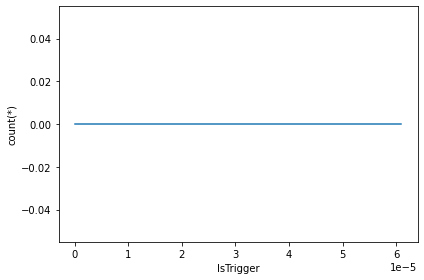

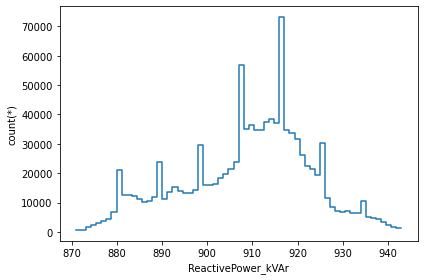

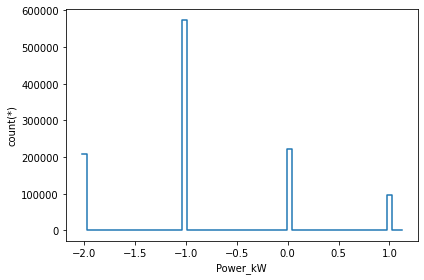

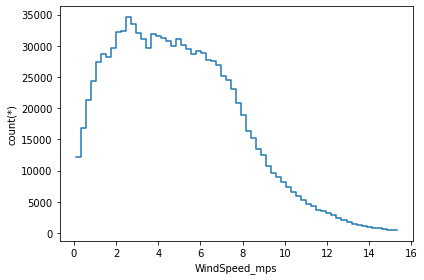

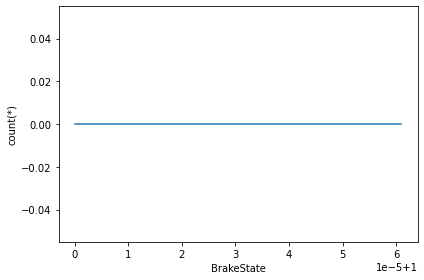

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


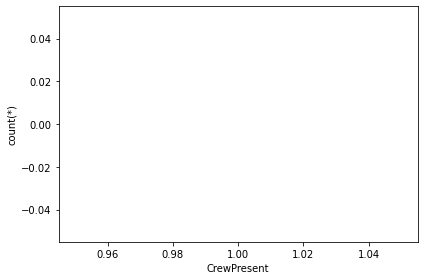

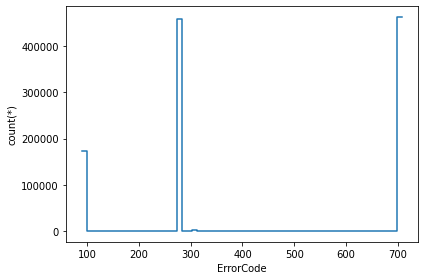

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


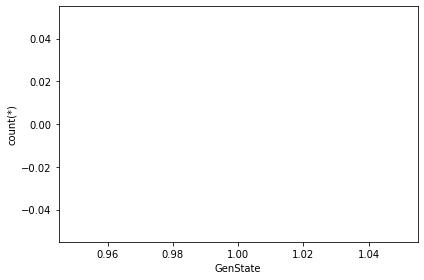

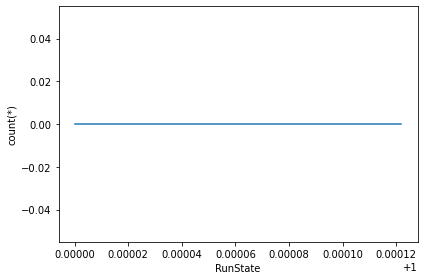

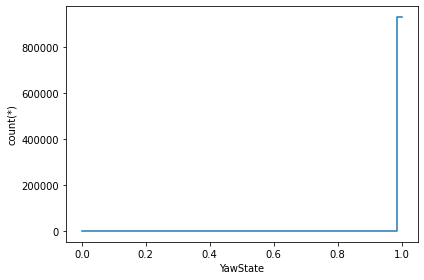

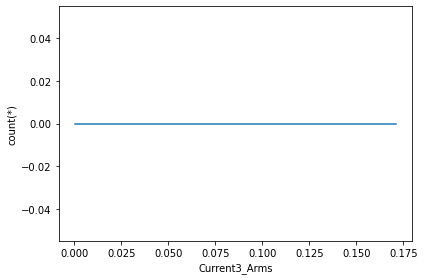

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


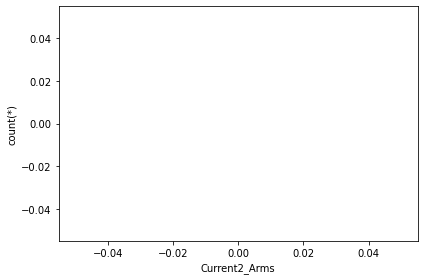

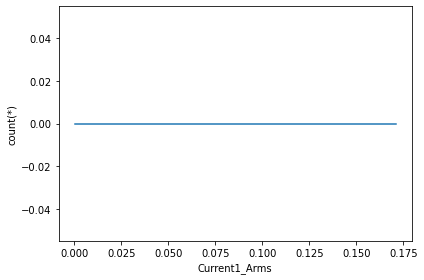

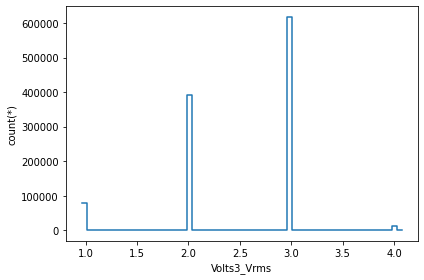

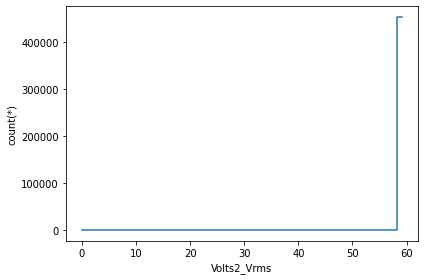

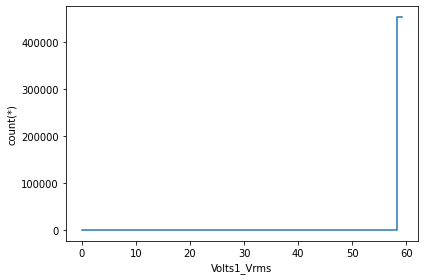

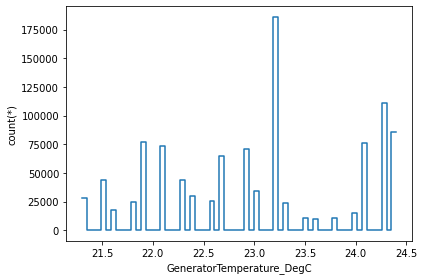

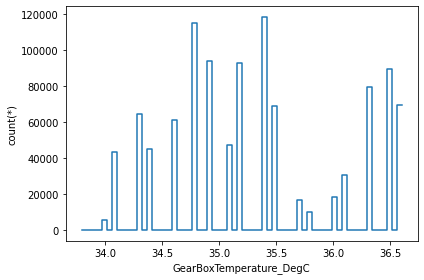

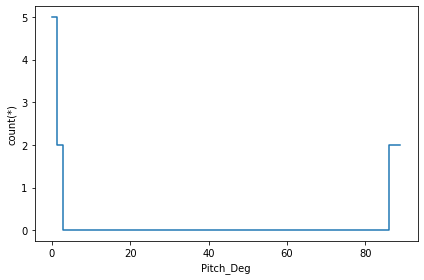

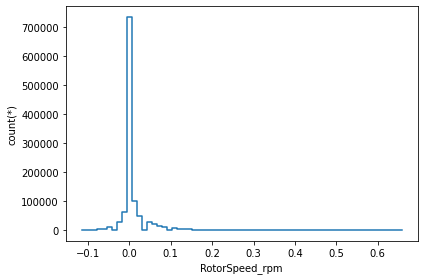

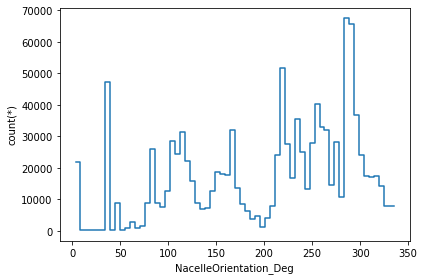

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


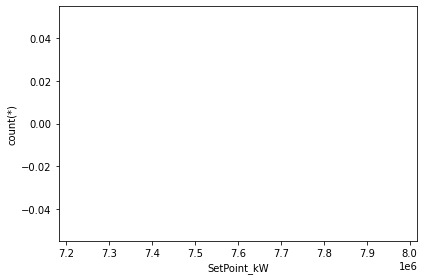

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


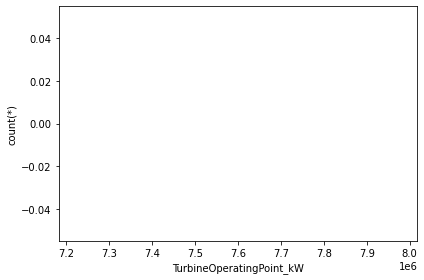

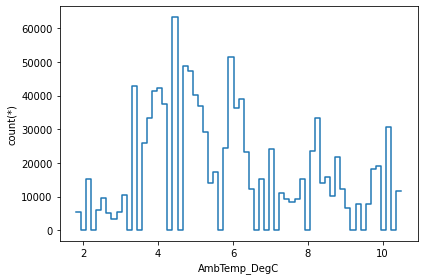

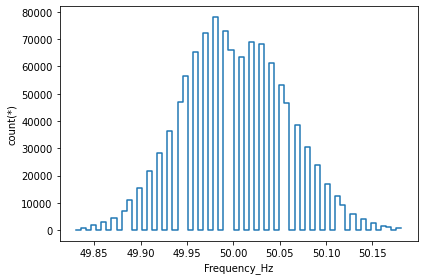

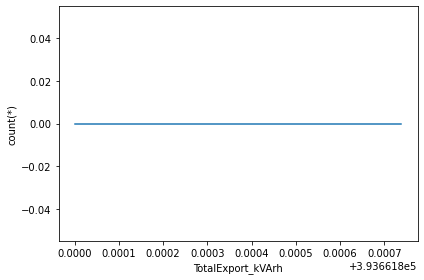

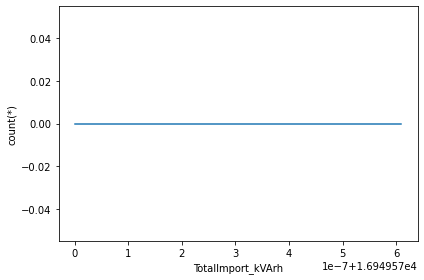

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


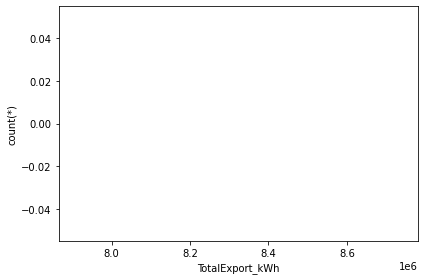

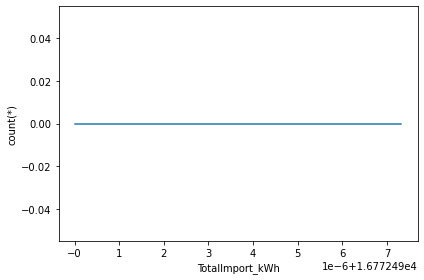

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


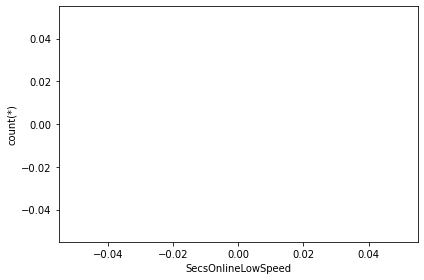

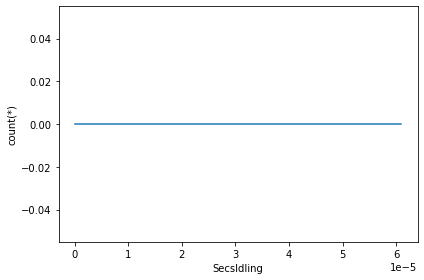

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


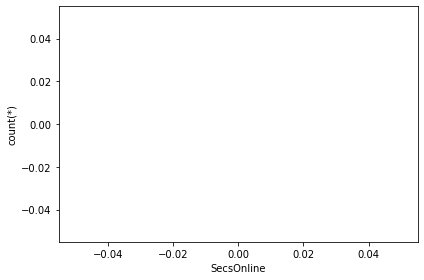

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start


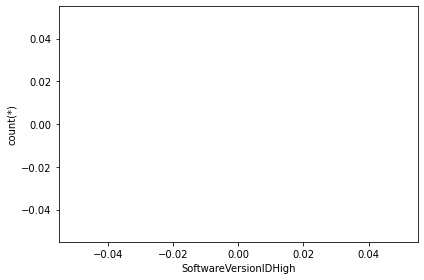

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


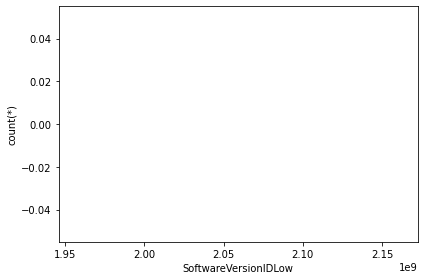

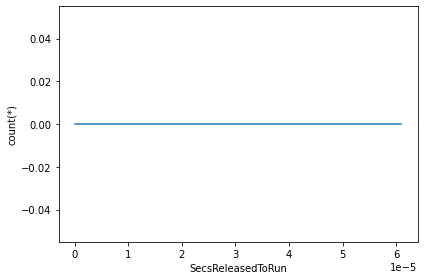

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


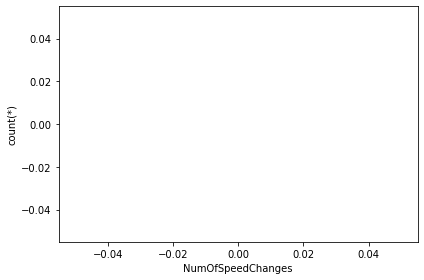

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


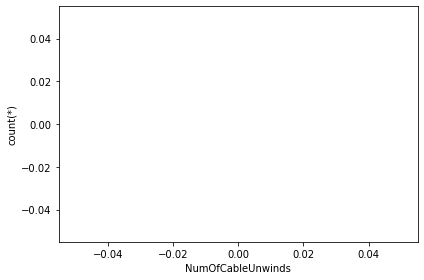

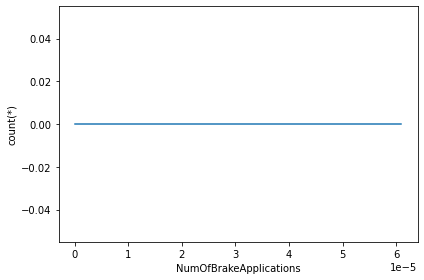

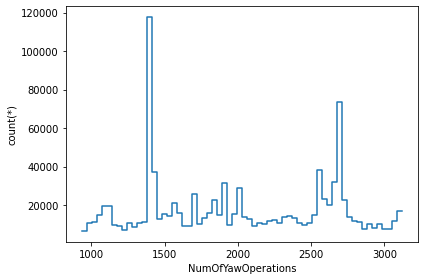

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


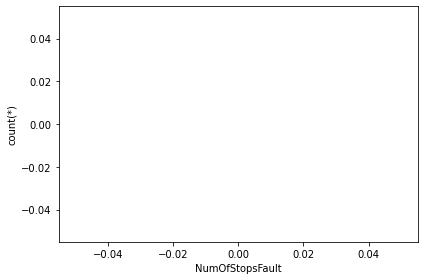

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


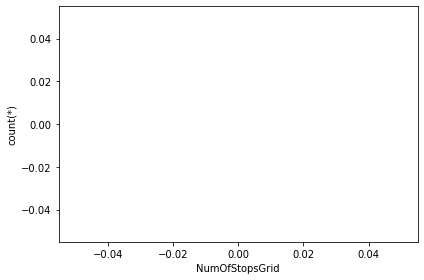

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


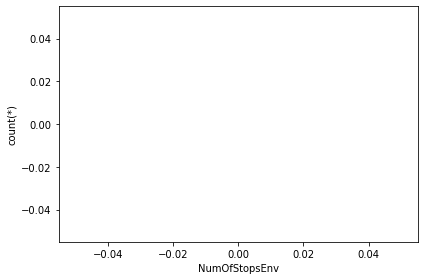

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


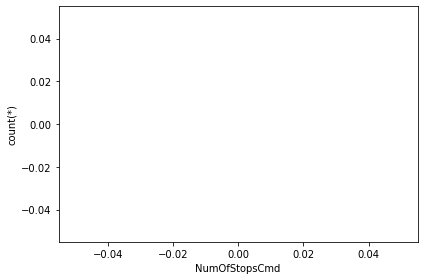

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


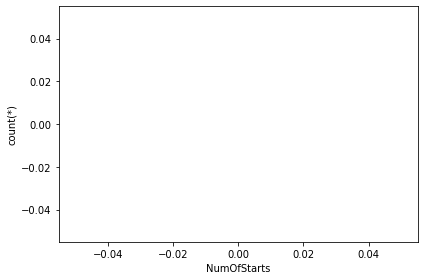

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


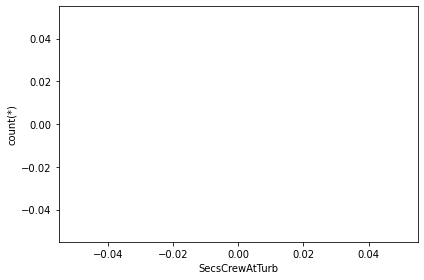

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


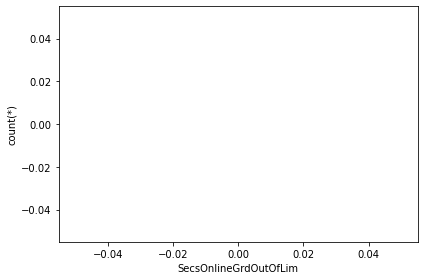

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


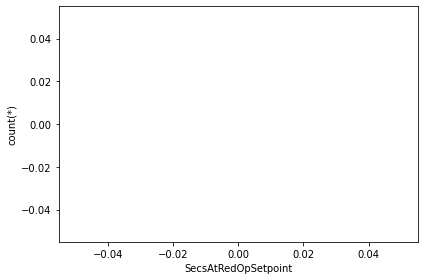

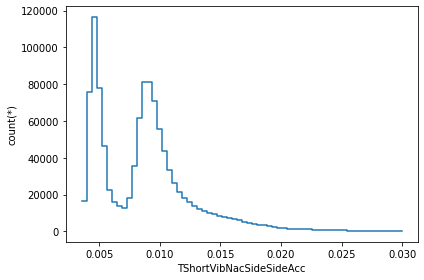

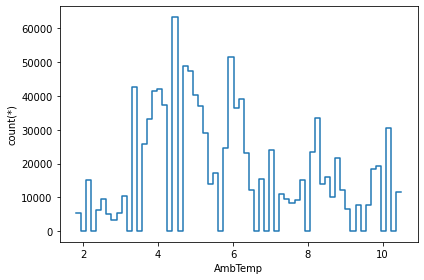

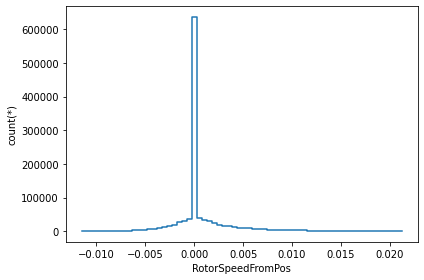

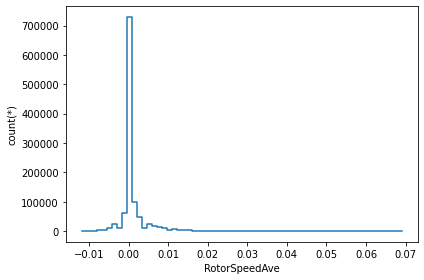

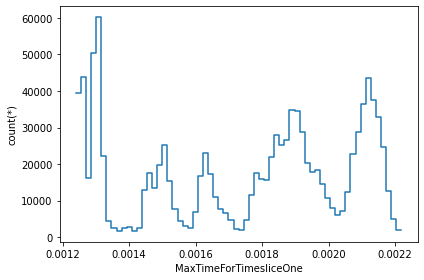

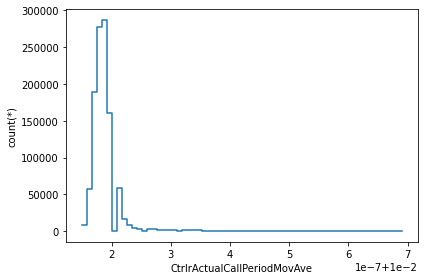

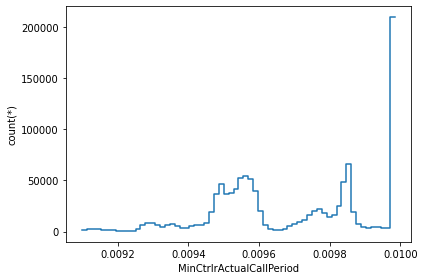

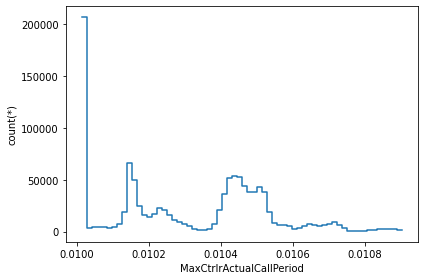

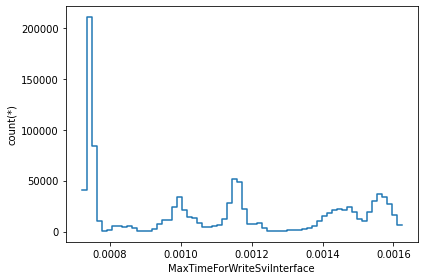

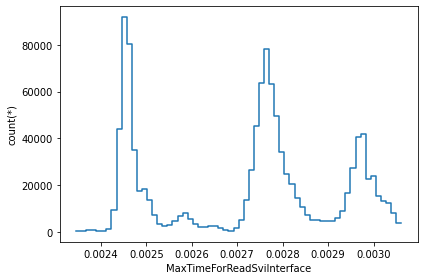

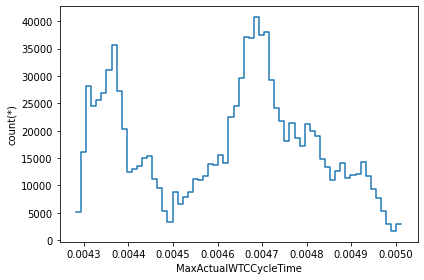

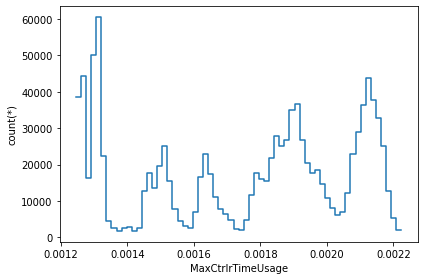

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


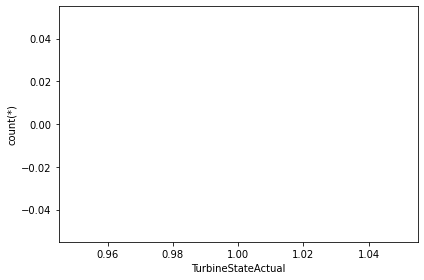

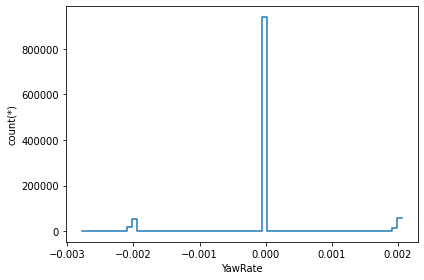

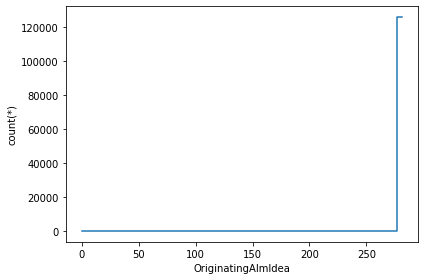

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


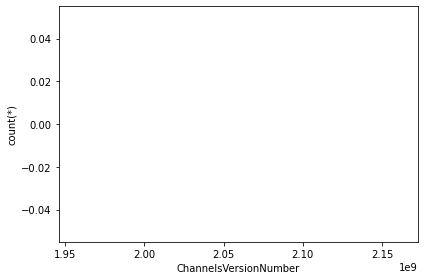

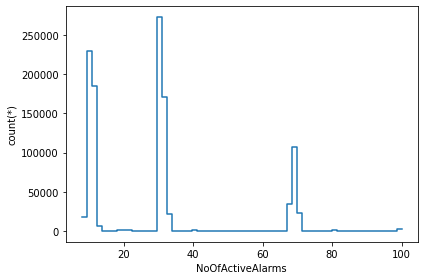

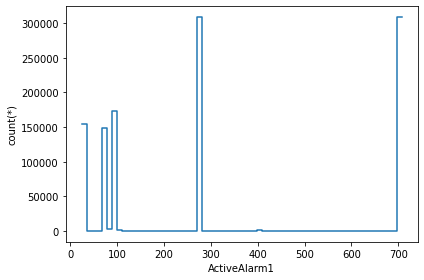

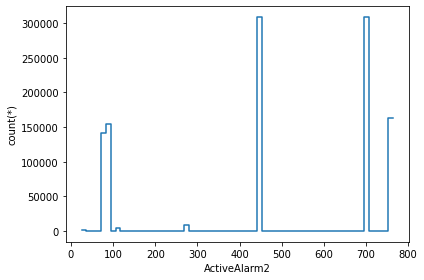

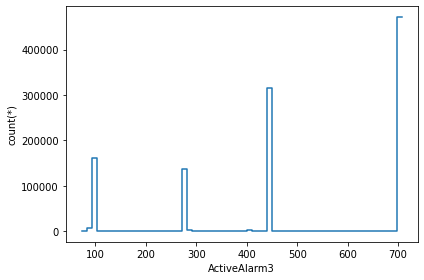

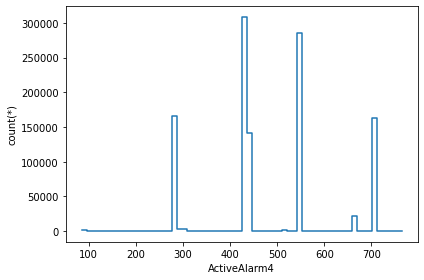

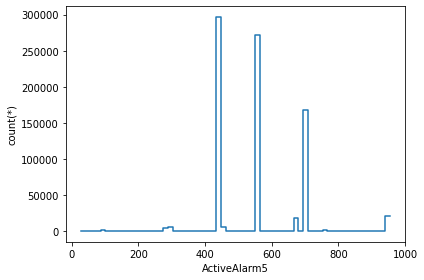

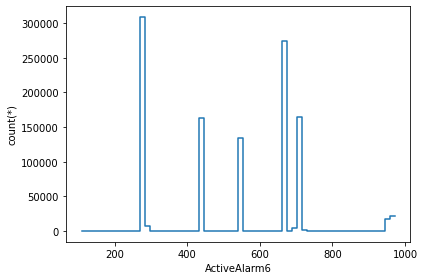

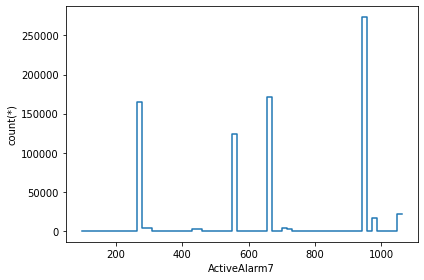

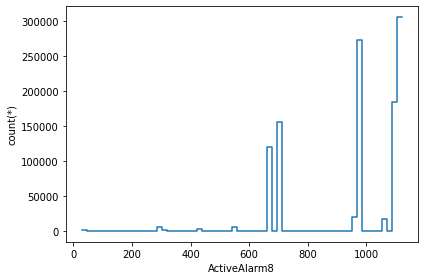

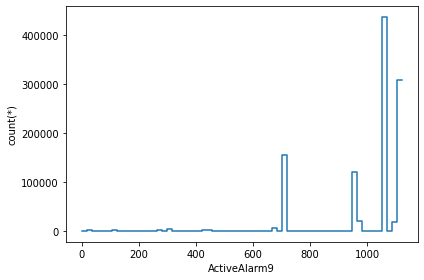

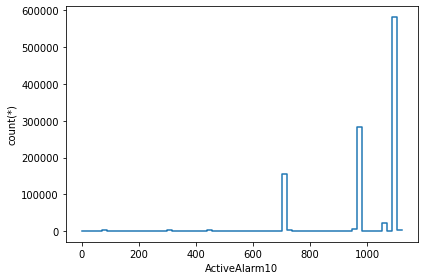

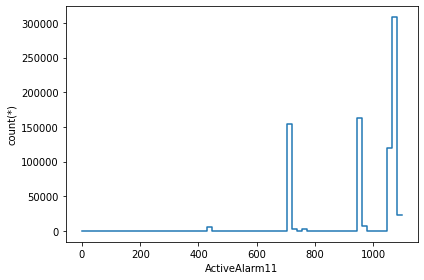

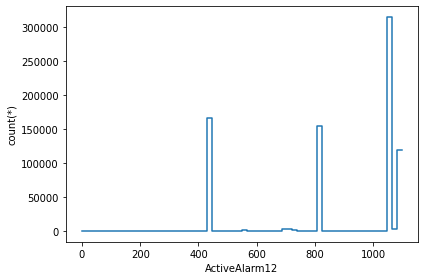

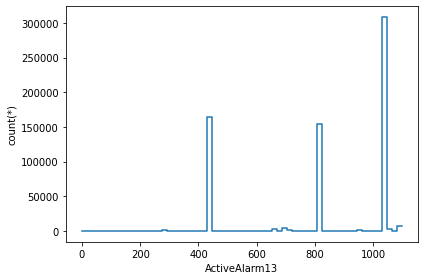

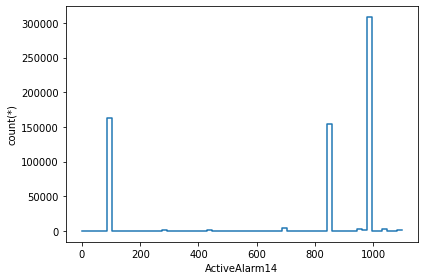

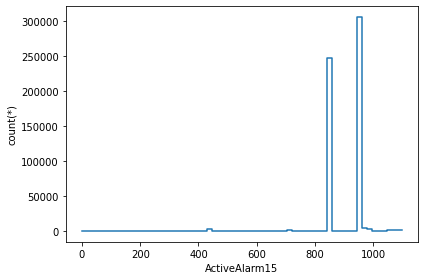

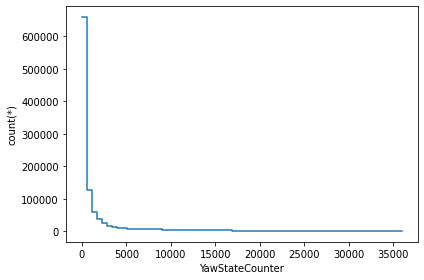

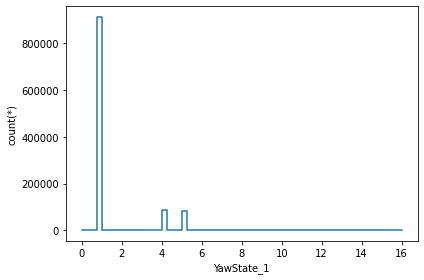

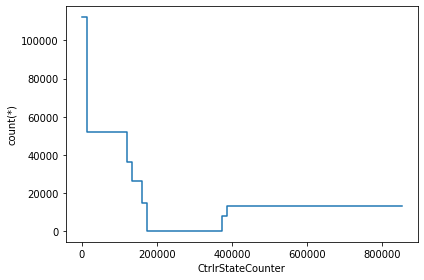

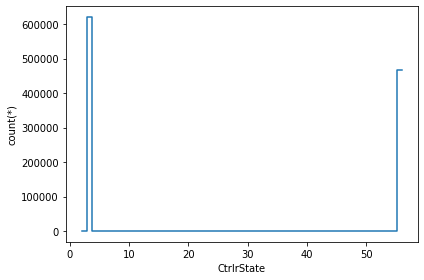

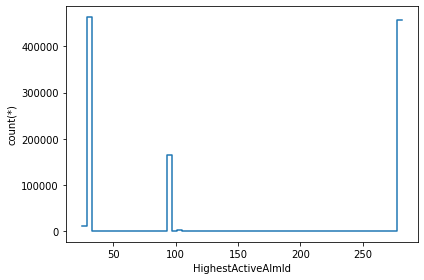

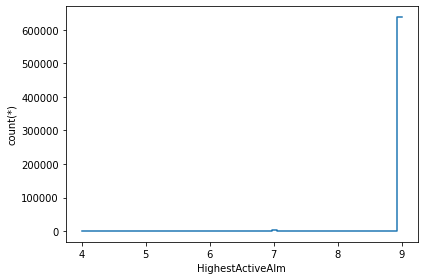

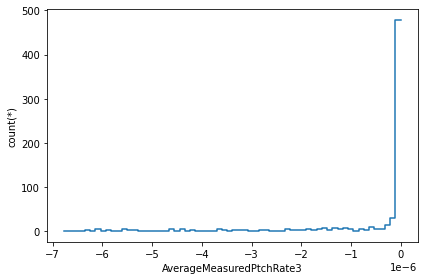

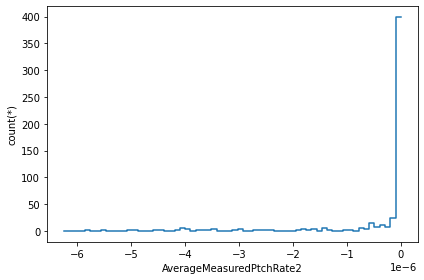

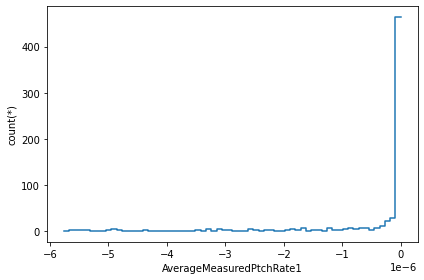

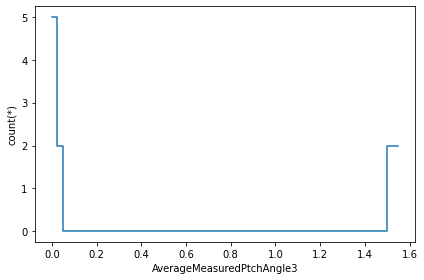

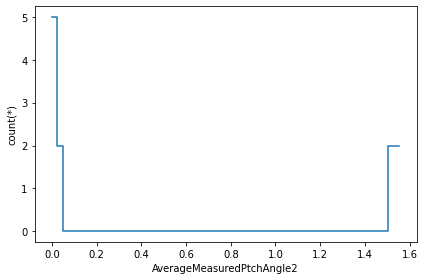

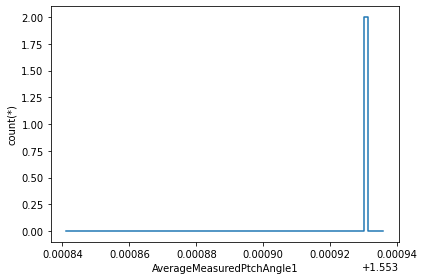

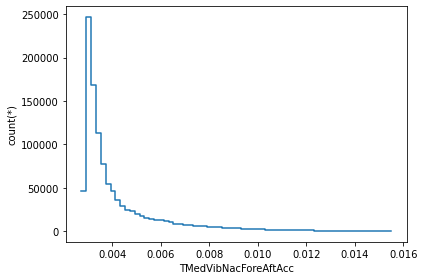

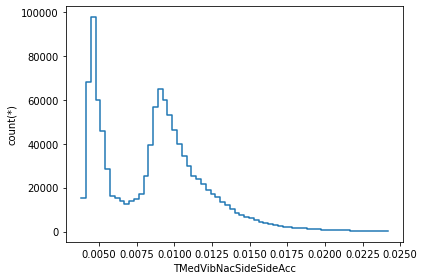

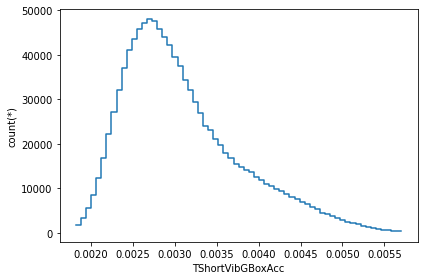

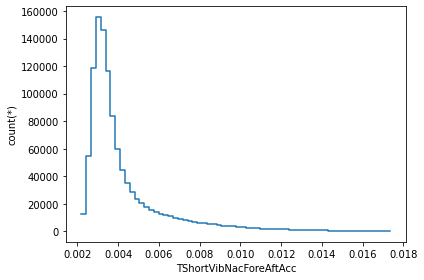

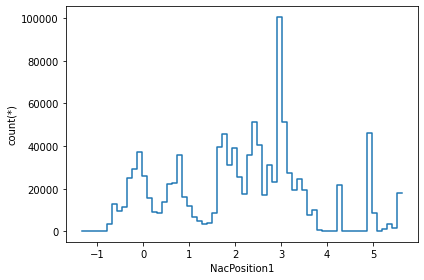

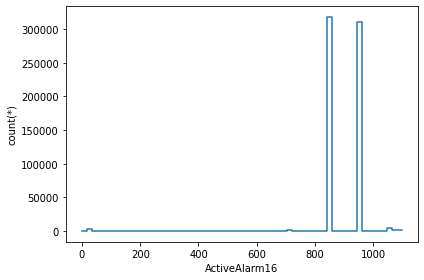

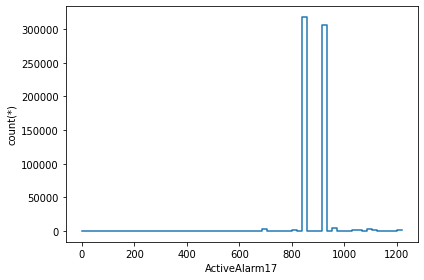

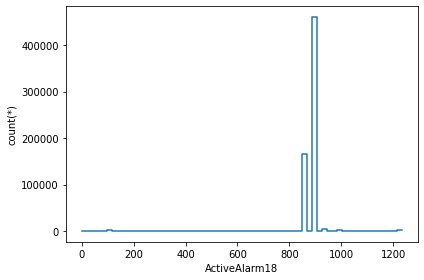

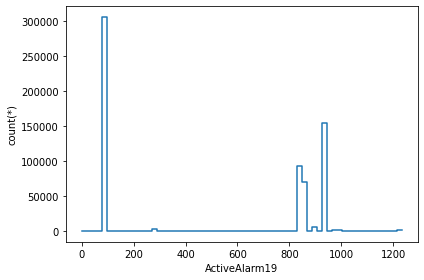

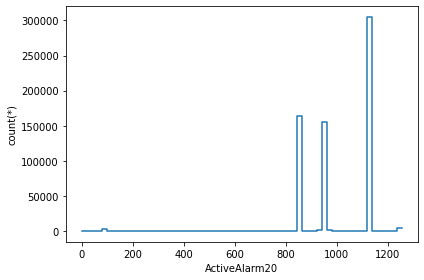

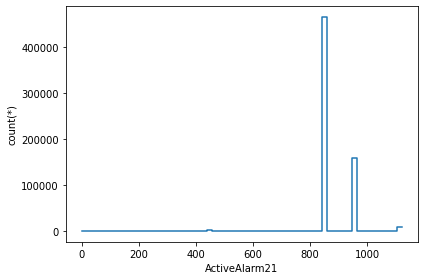

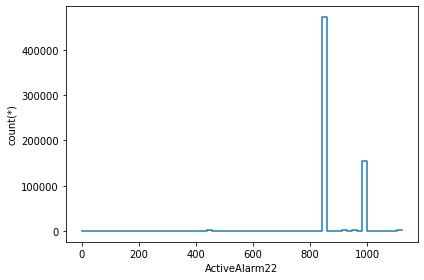

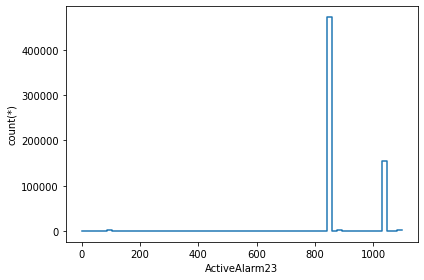

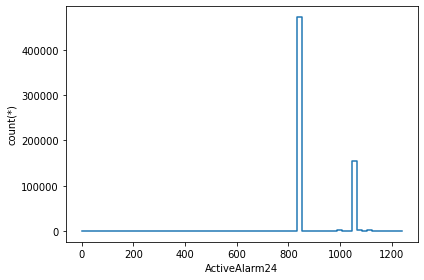

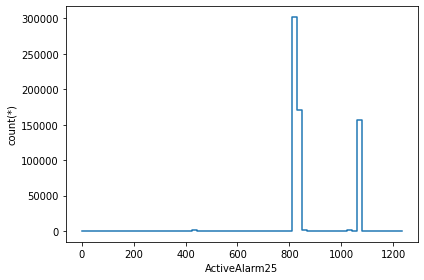

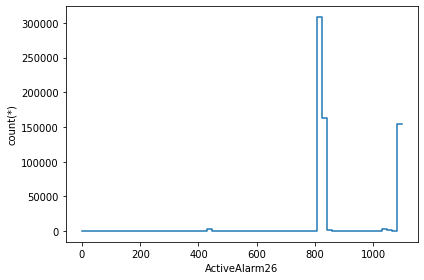

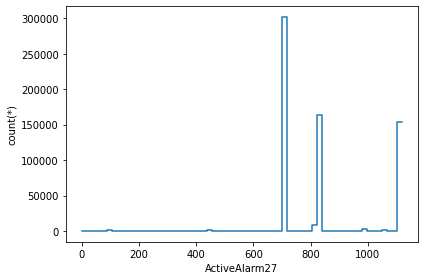

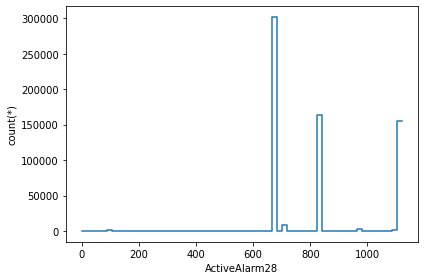

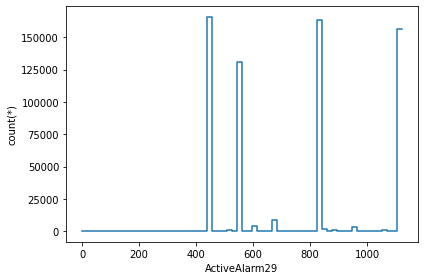

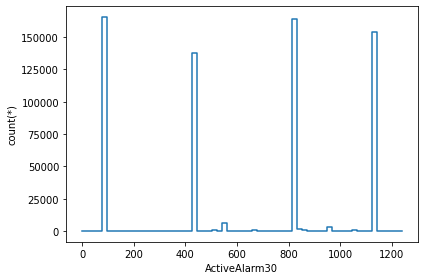

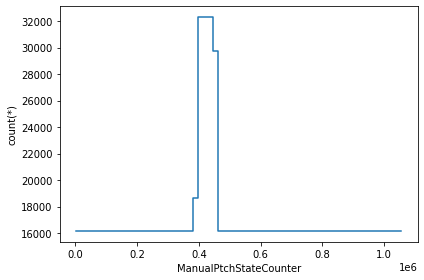

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


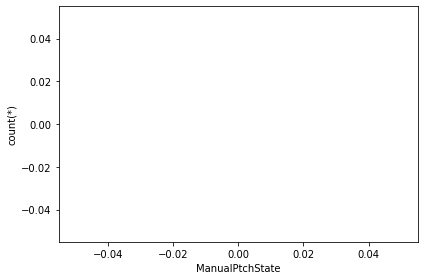

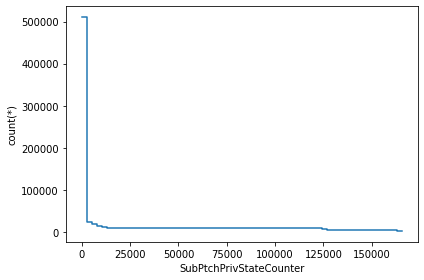

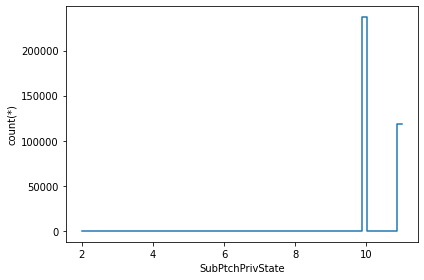

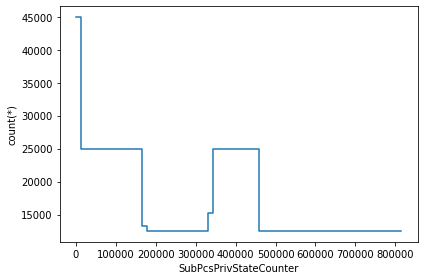

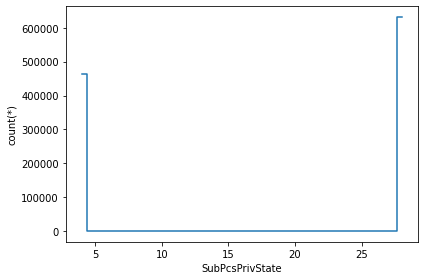

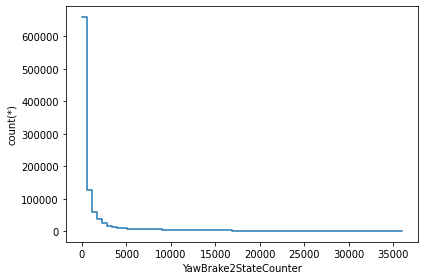

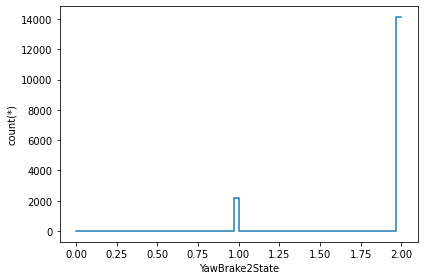

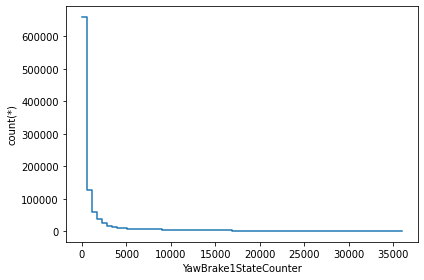

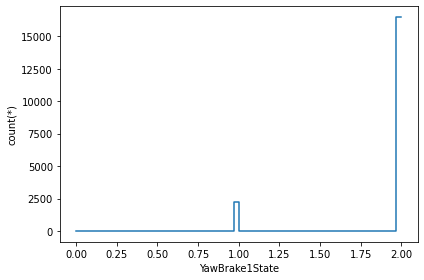

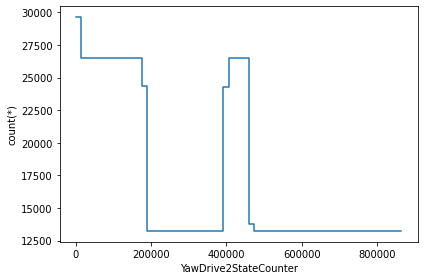

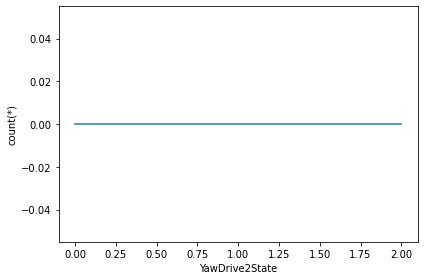

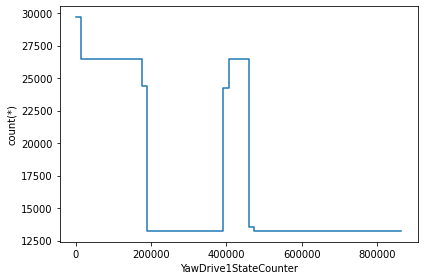

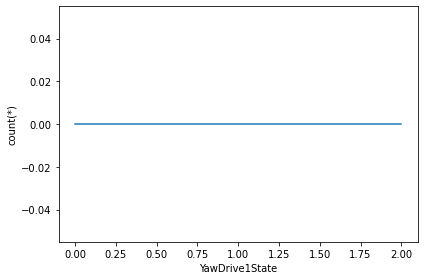

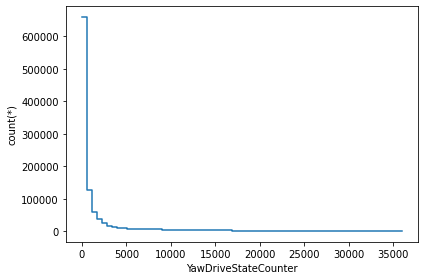

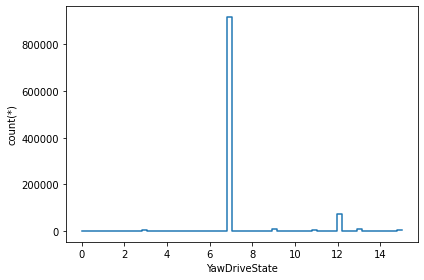

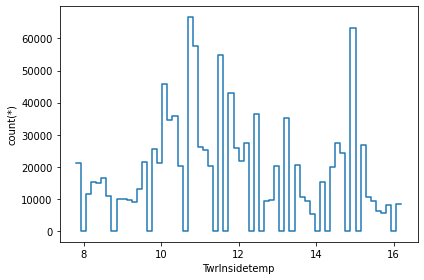

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


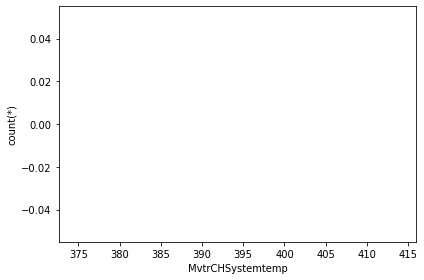

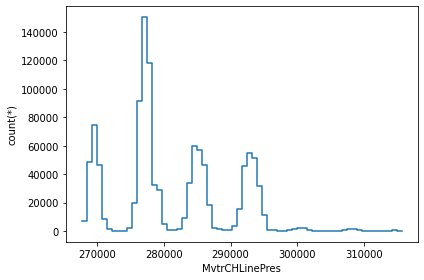

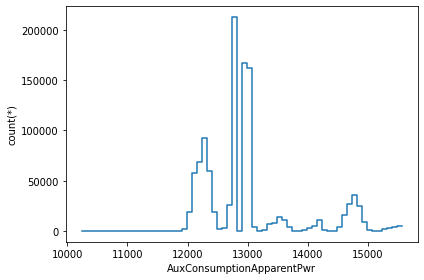

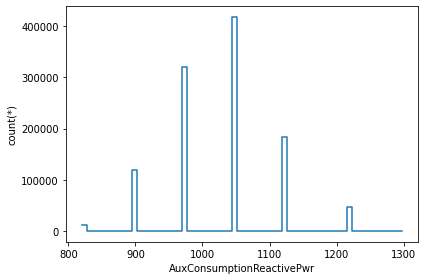

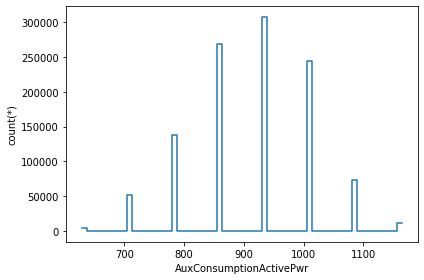

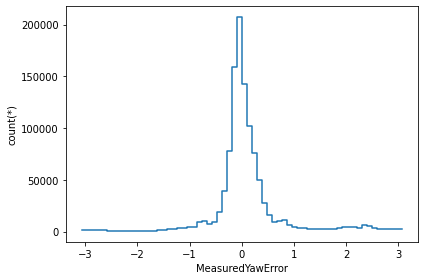

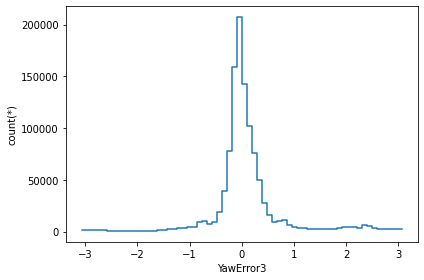

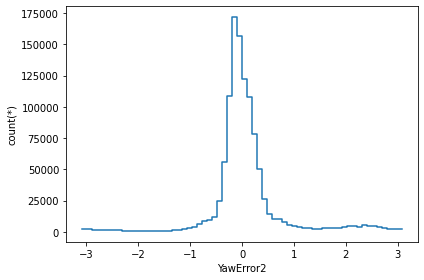

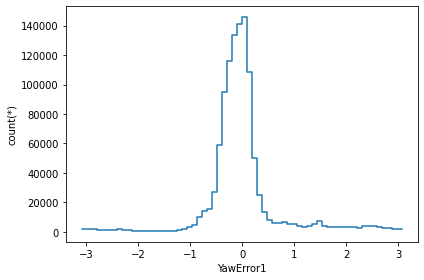

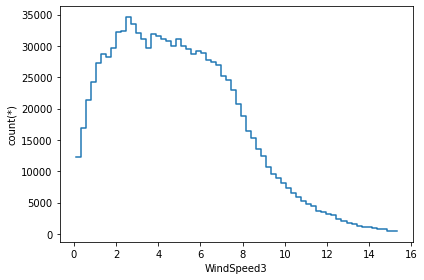

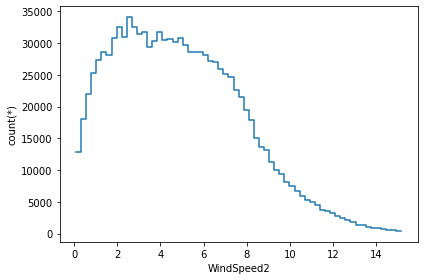

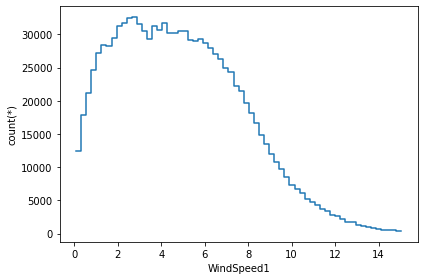

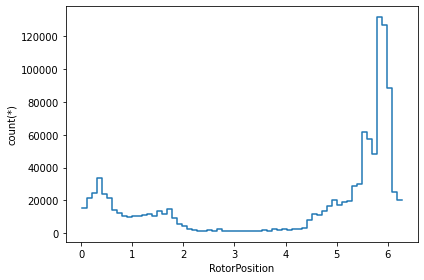

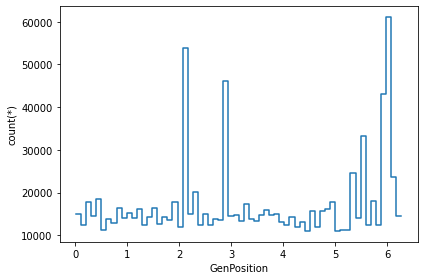

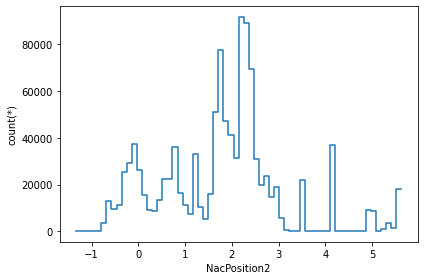

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


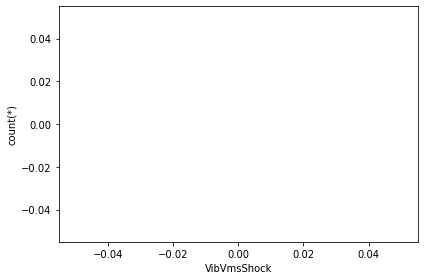

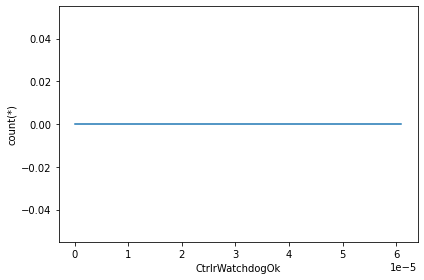

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


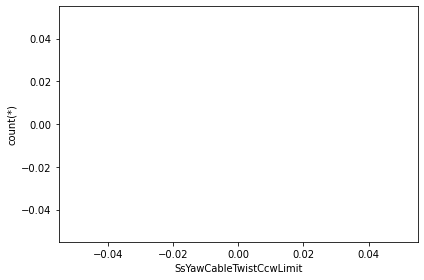

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


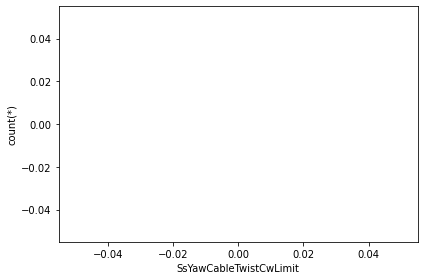

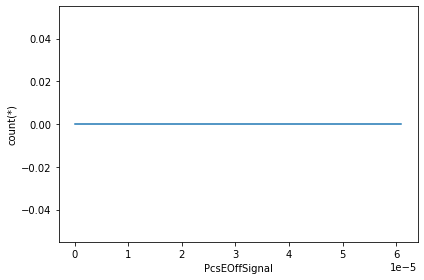

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


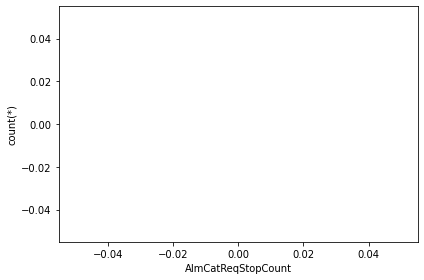

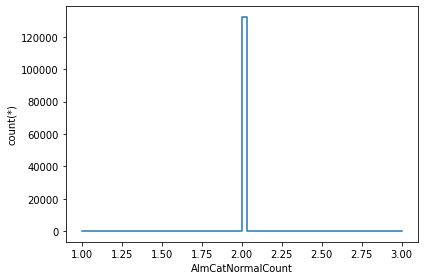

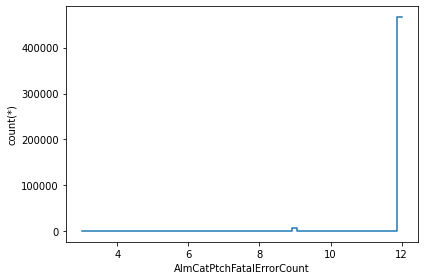

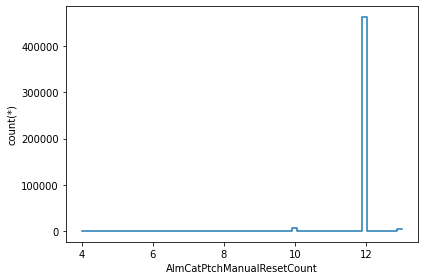

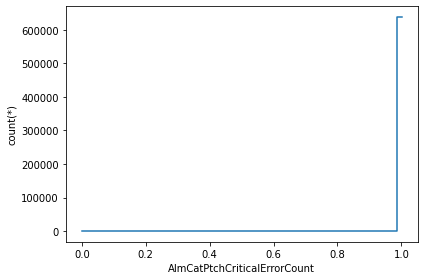

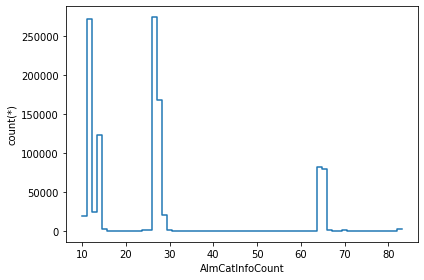

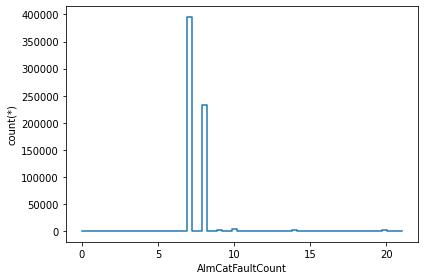

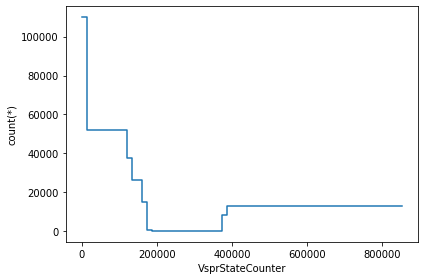

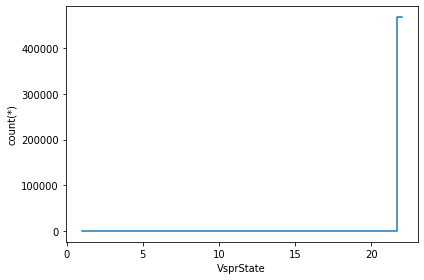

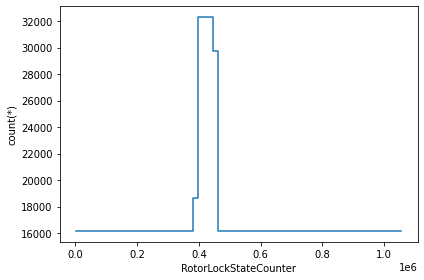

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


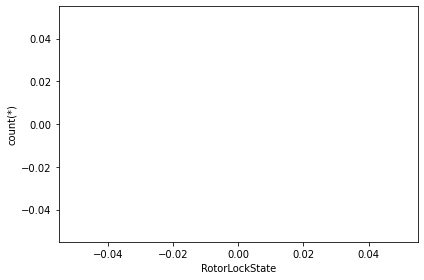

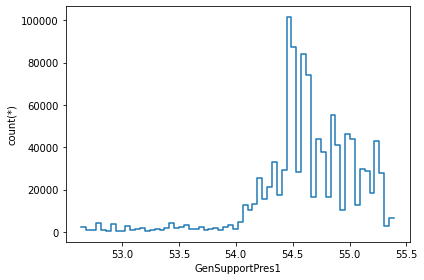

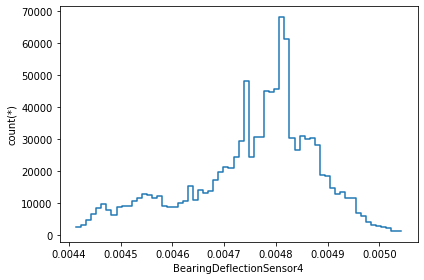

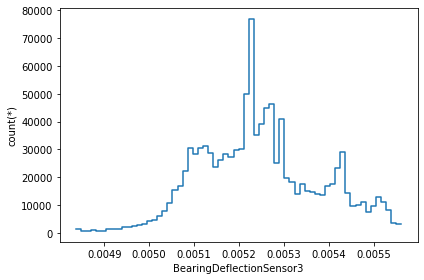

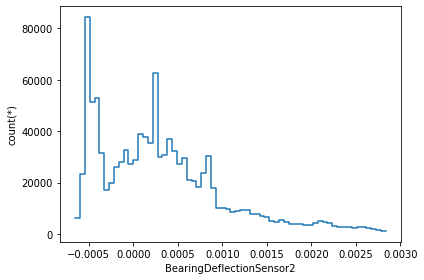

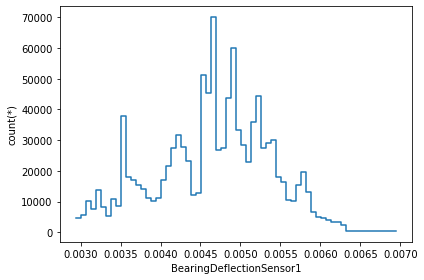

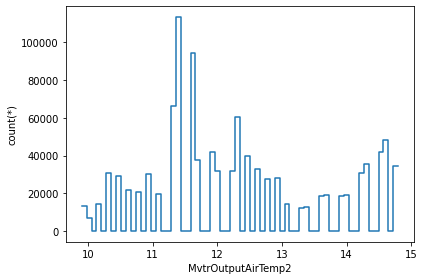

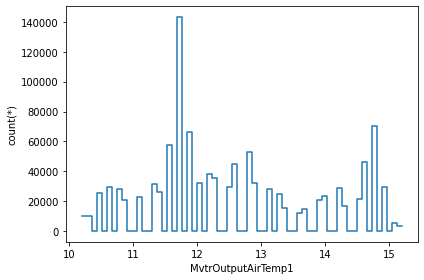

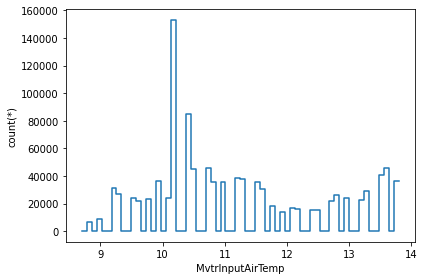

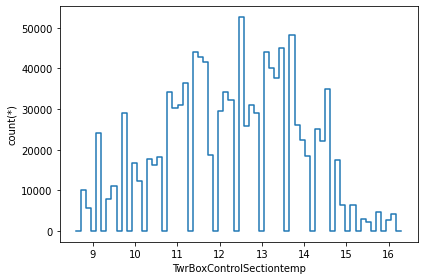

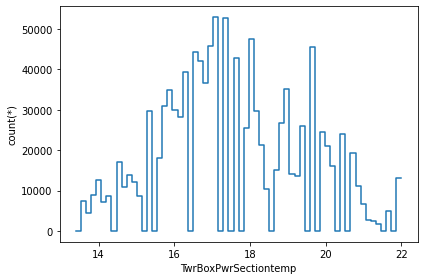

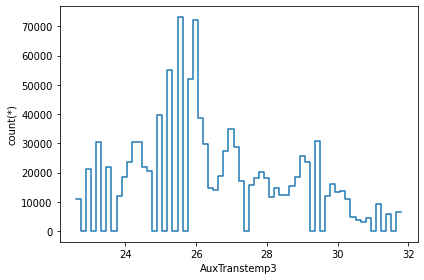

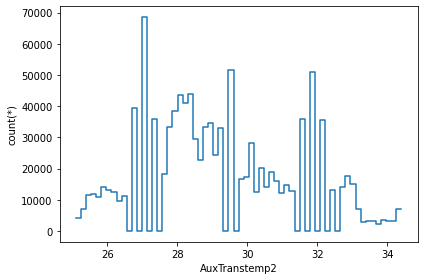

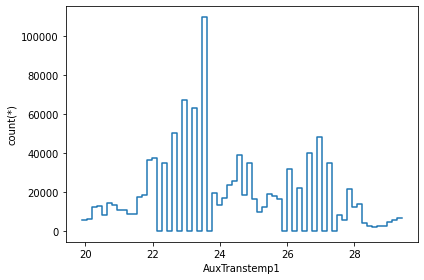

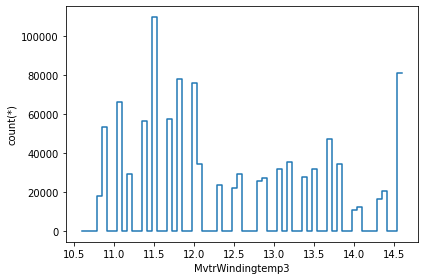

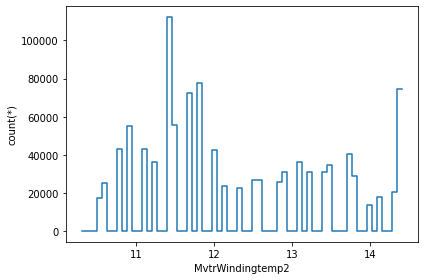

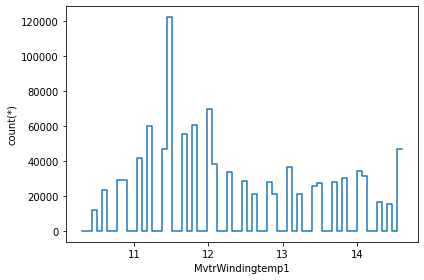

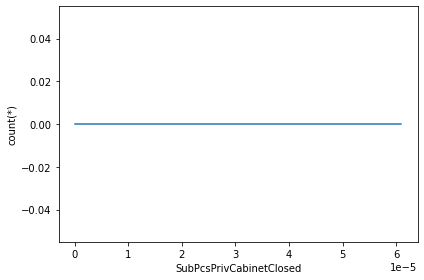

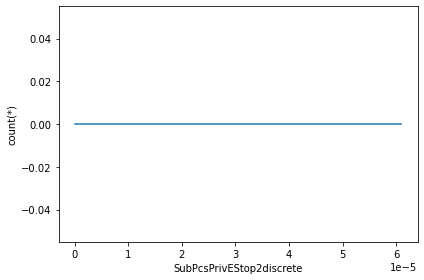

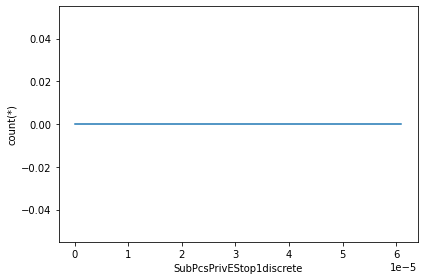

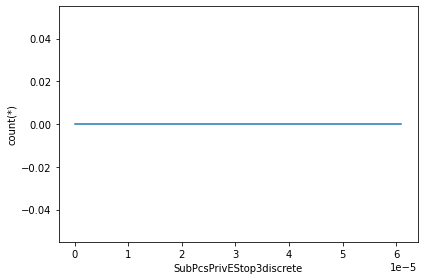

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


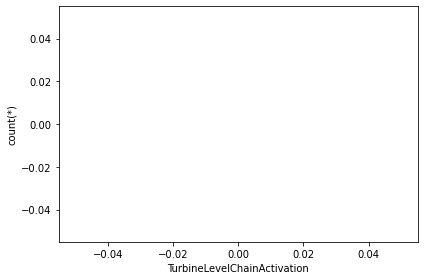

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


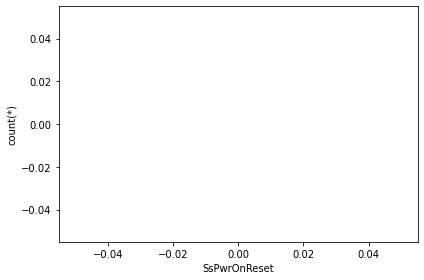

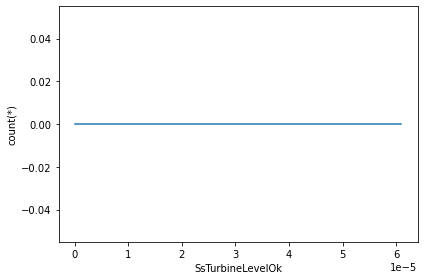

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


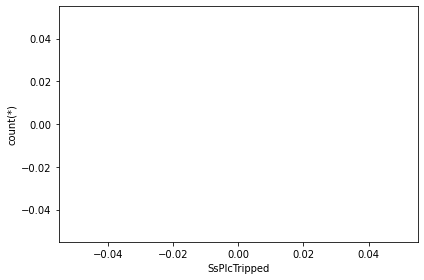

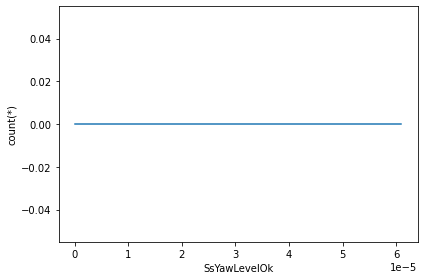

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


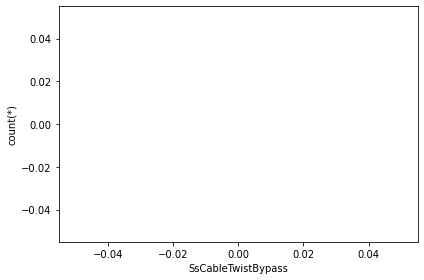

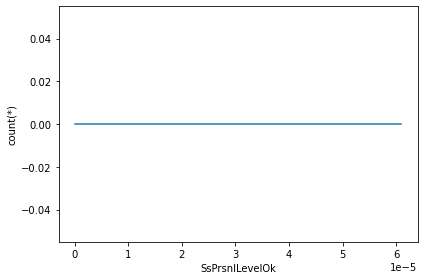

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


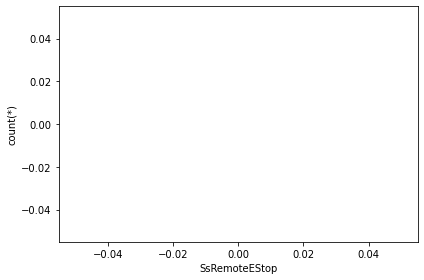

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


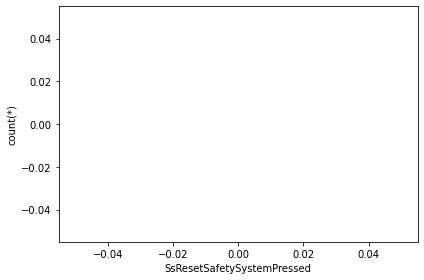

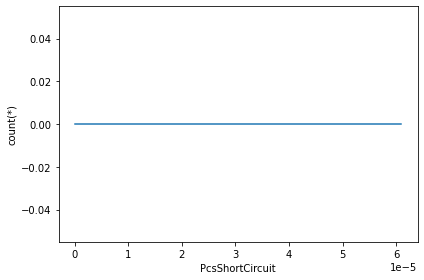

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


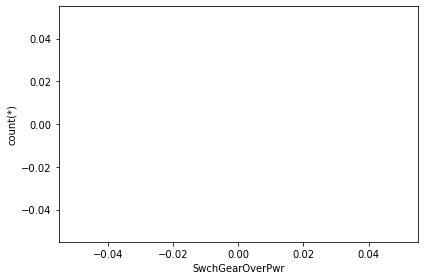

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


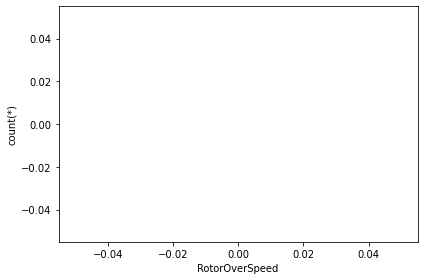

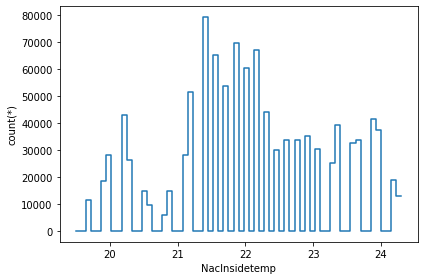

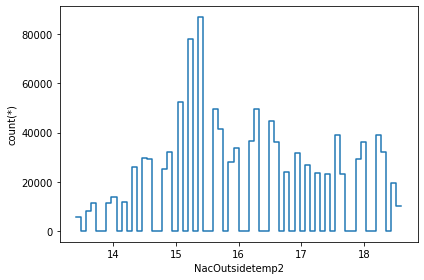

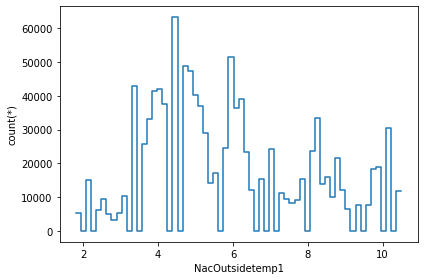

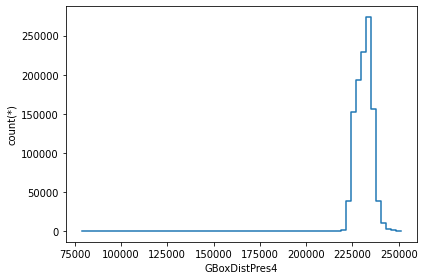

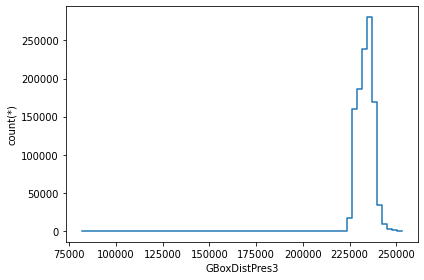

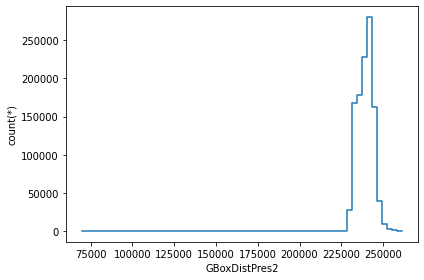

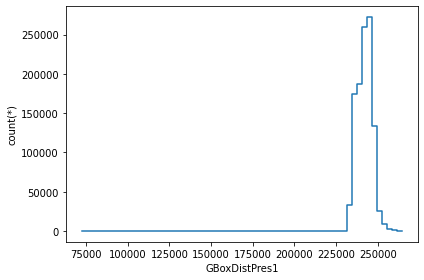

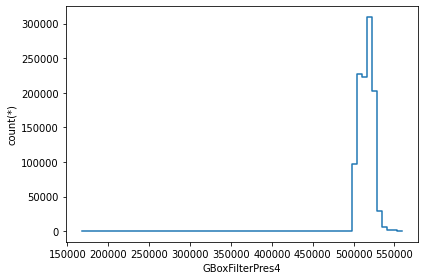

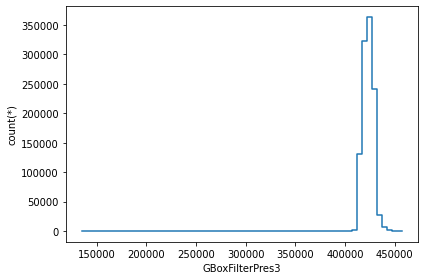

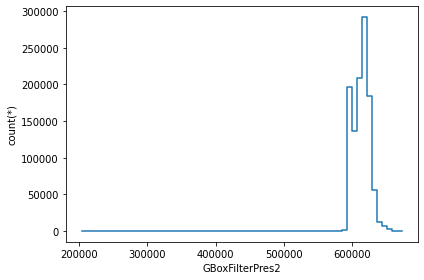

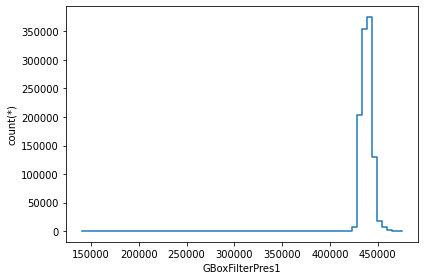

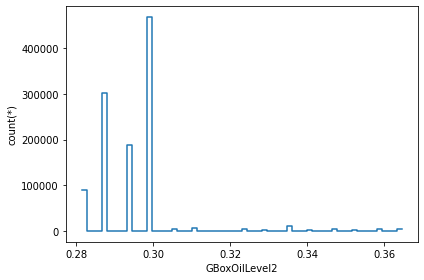

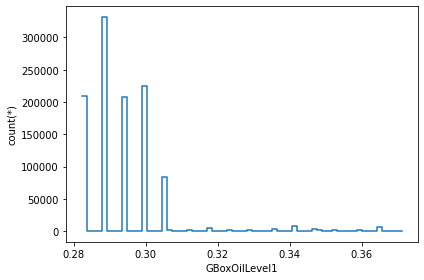

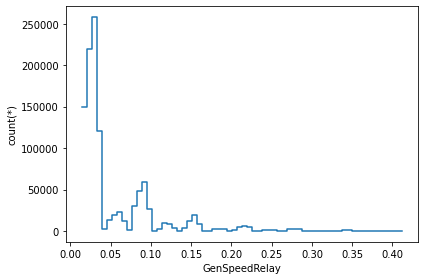

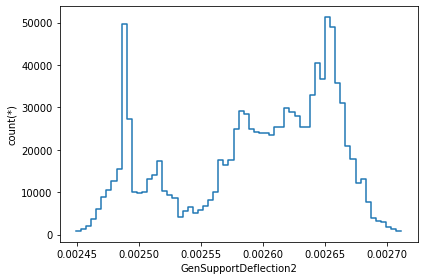

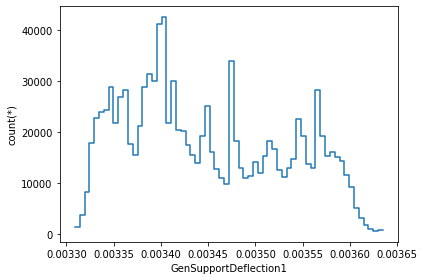

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


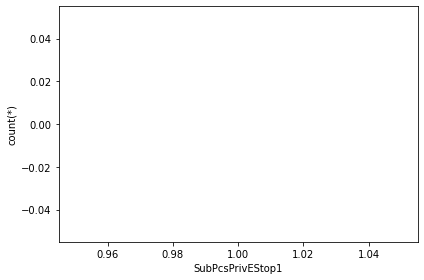

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


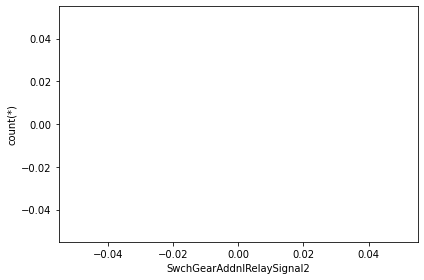

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


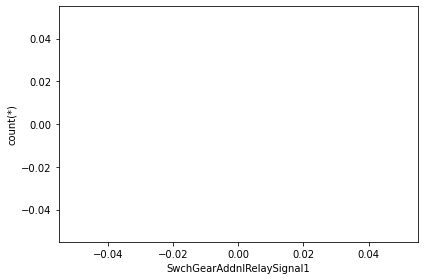

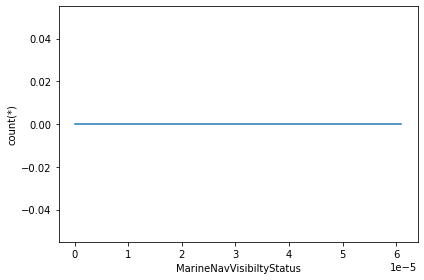

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


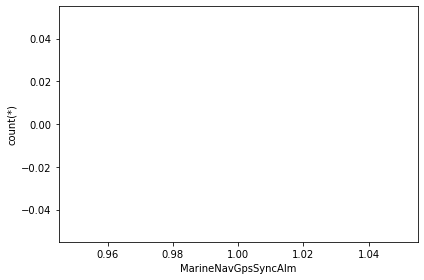

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


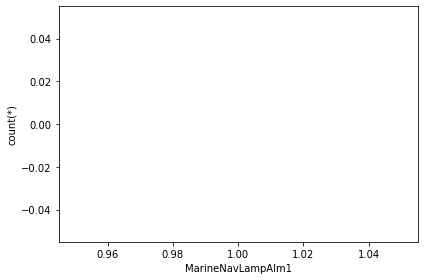

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


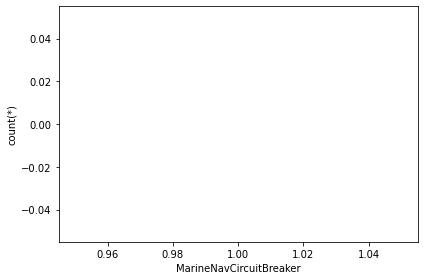

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


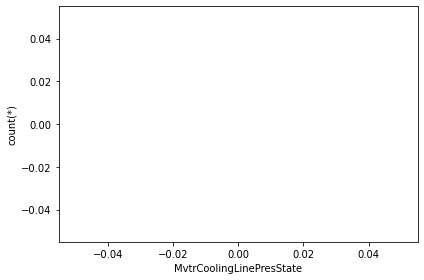

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


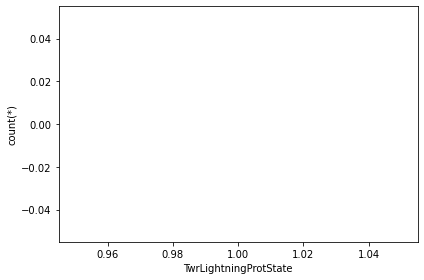

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


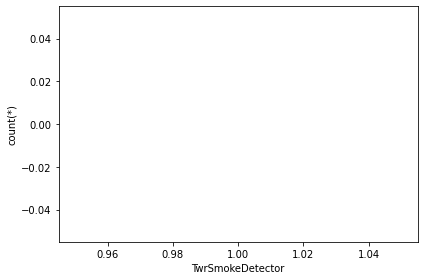

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


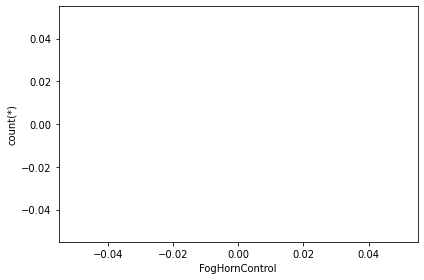

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


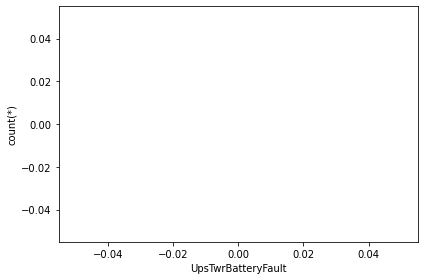

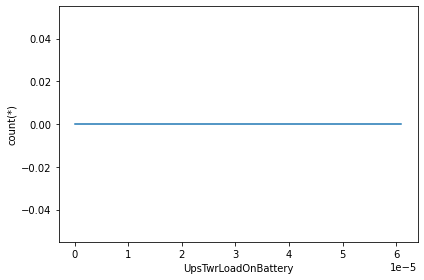

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


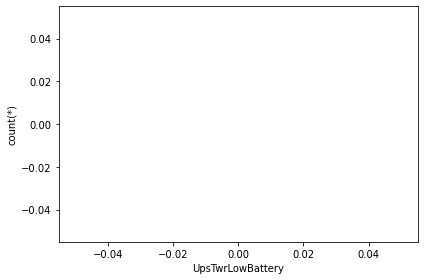

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


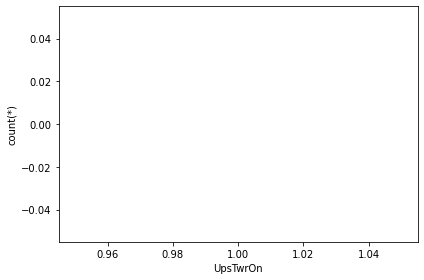

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


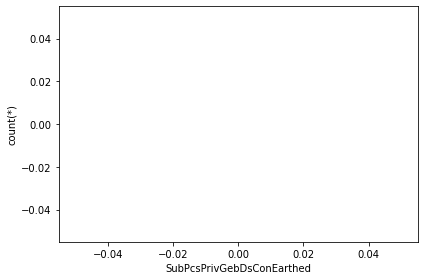

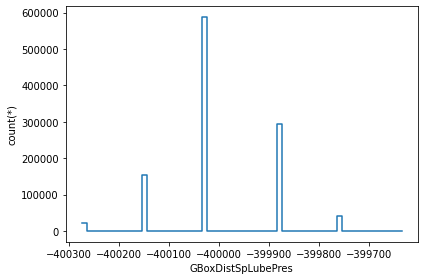

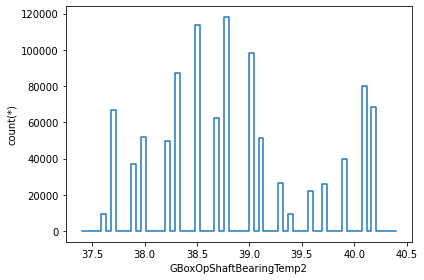

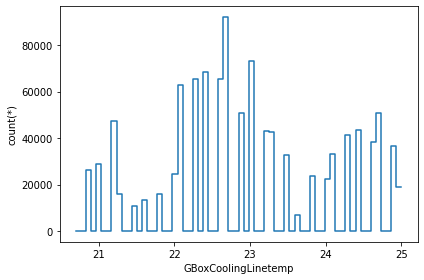

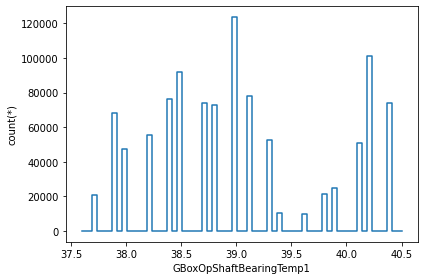

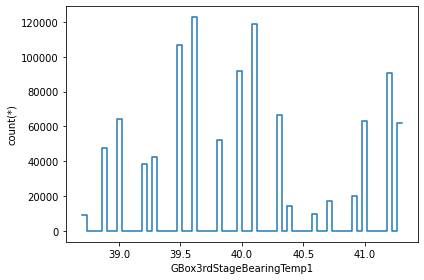

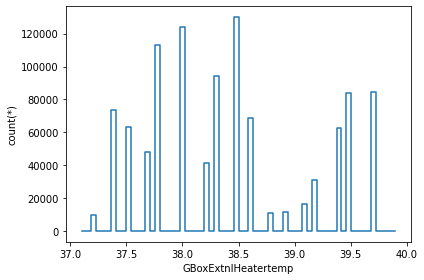

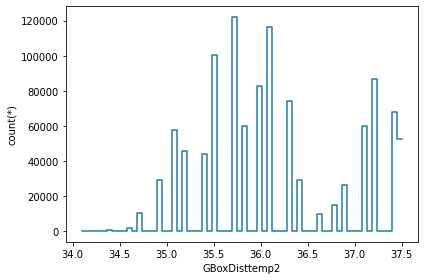

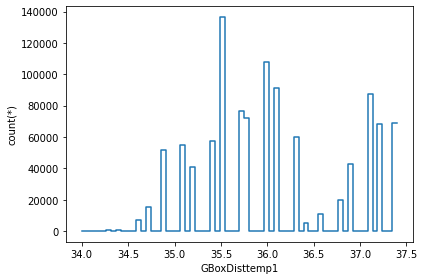

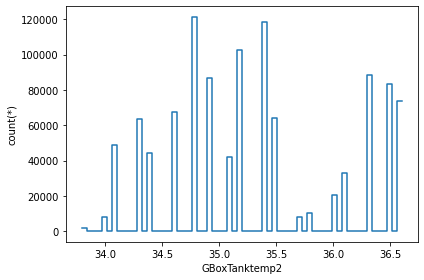

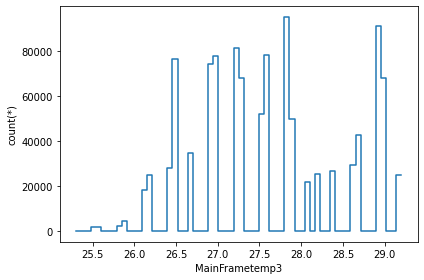

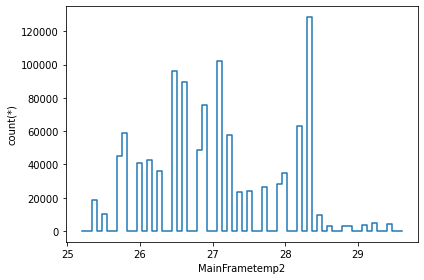

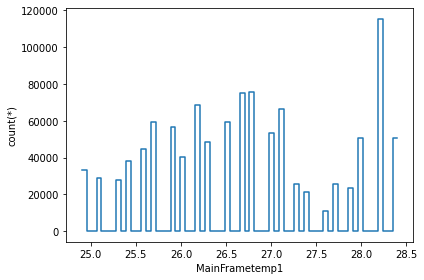

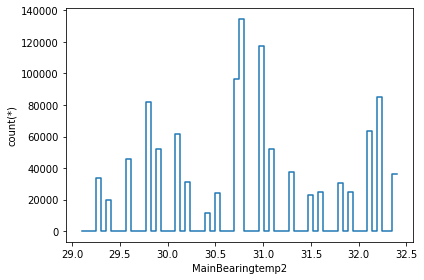

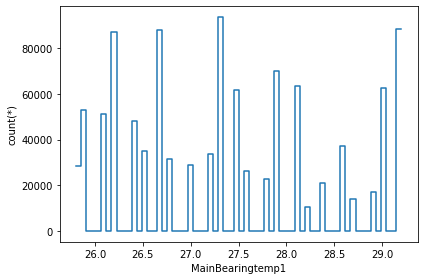

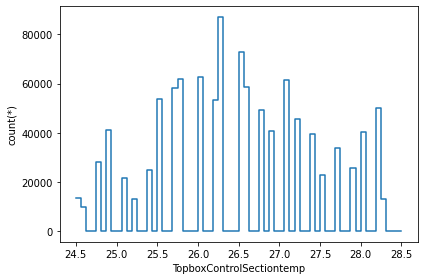

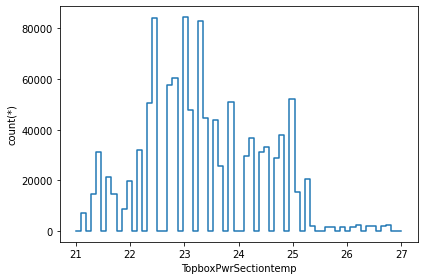

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


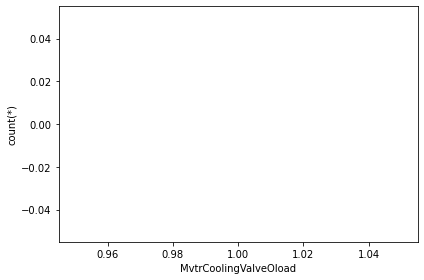

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


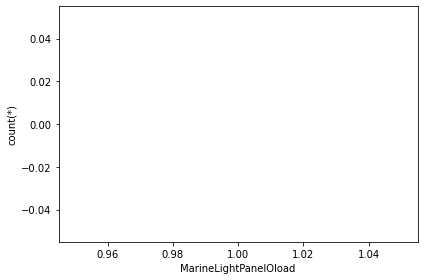

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


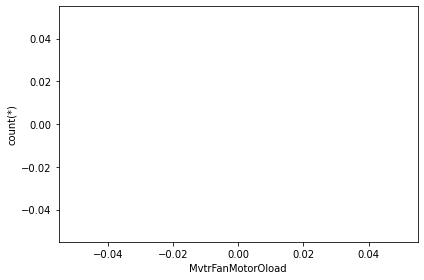

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


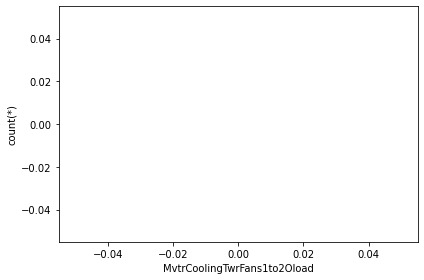

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


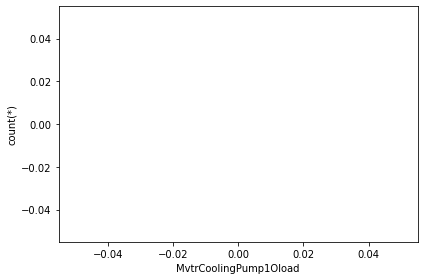

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


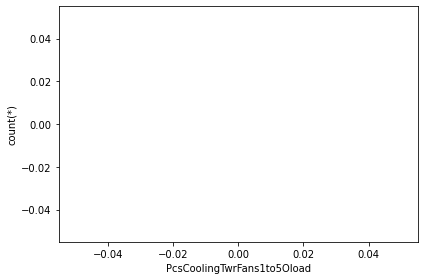

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


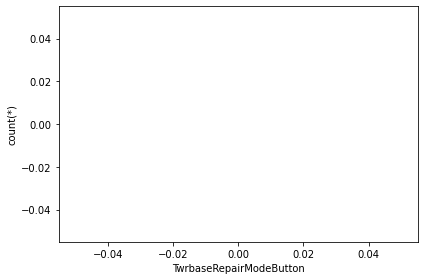

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


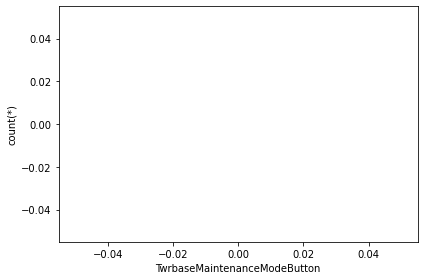

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


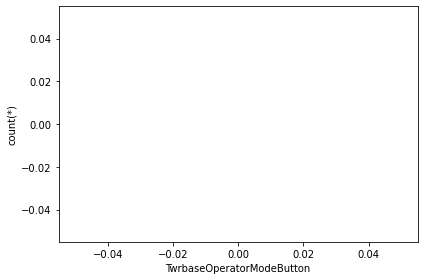

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


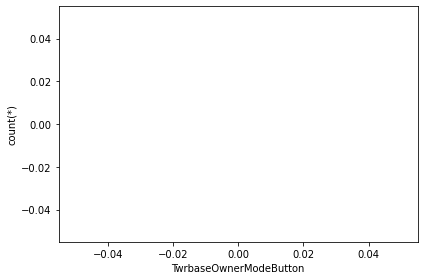

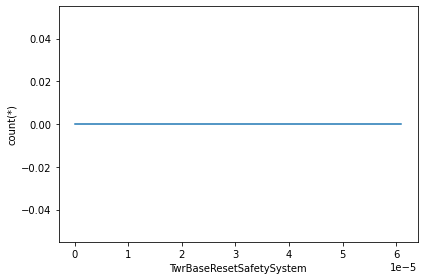

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


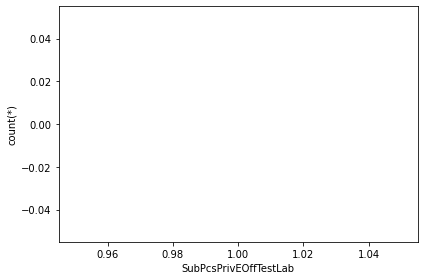

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


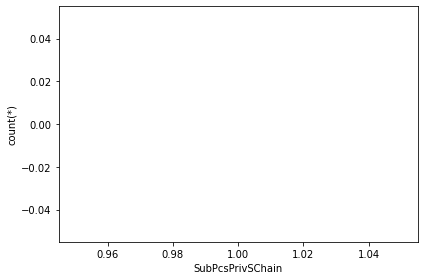

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


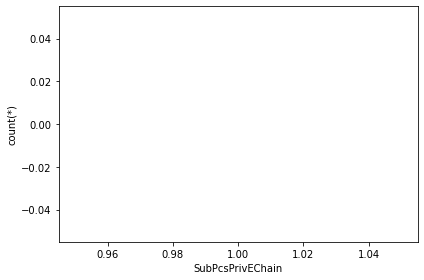

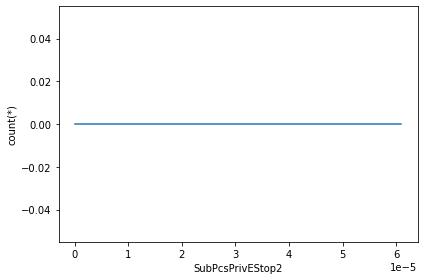

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


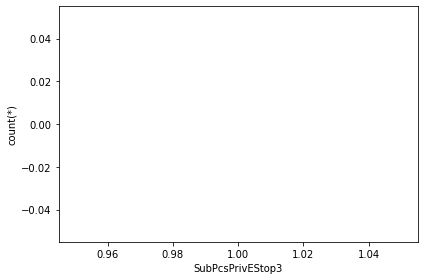

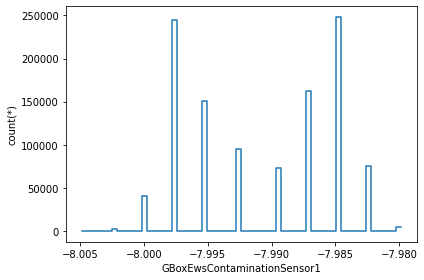

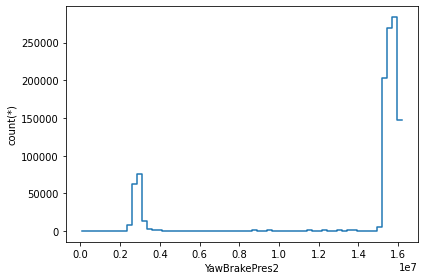

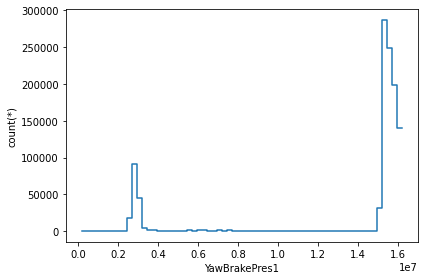

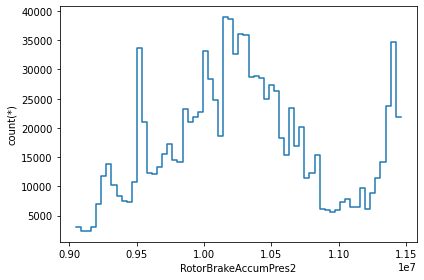

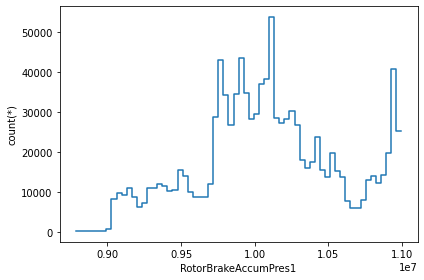

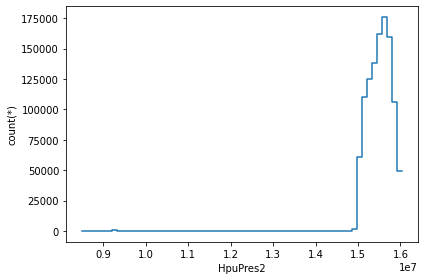

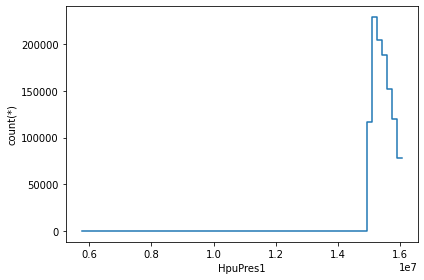

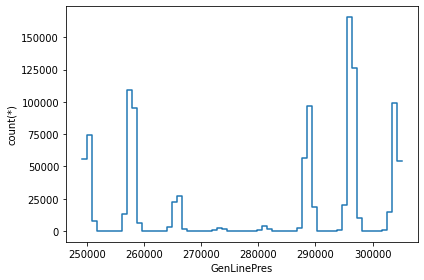

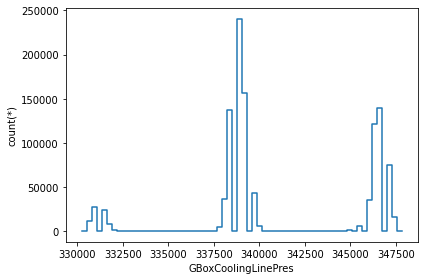

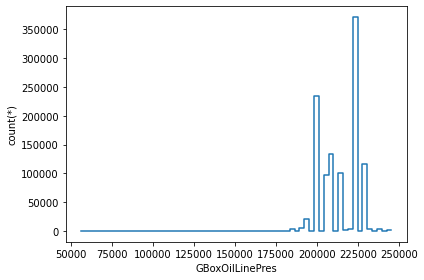

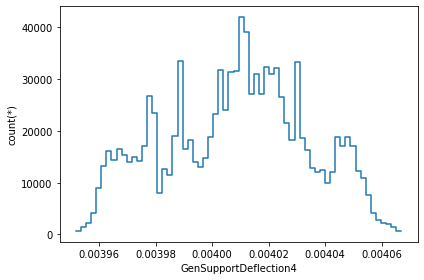

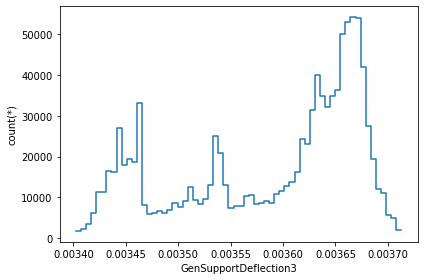

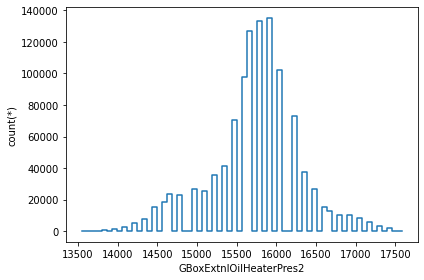

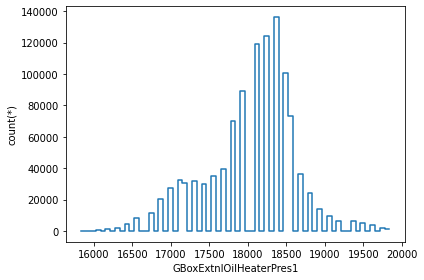

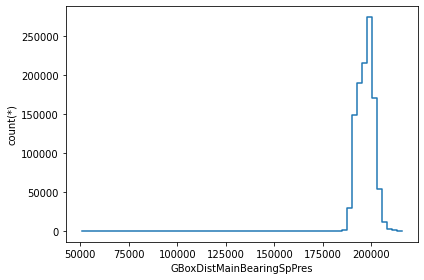

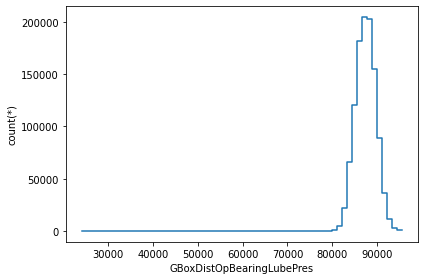

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


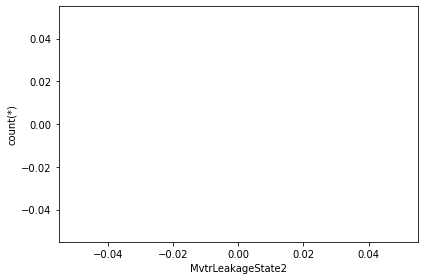

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


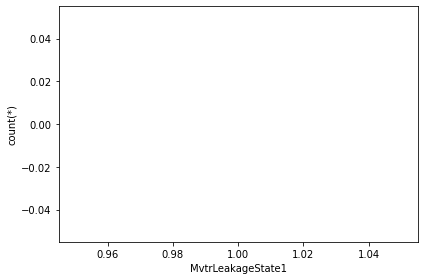

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


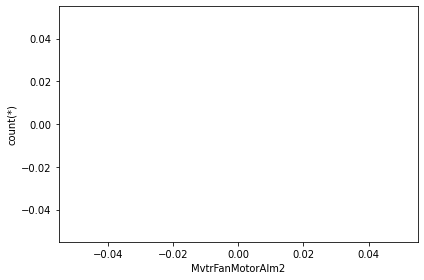

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


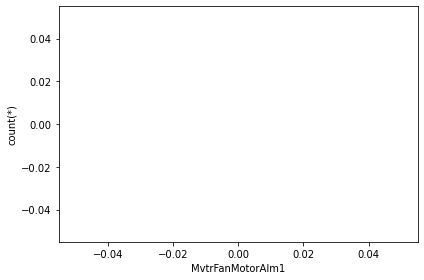

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


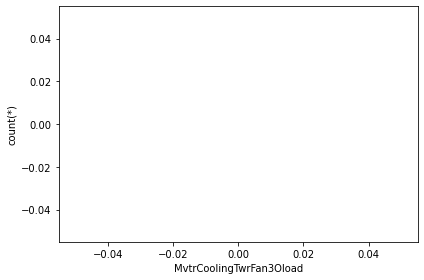

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


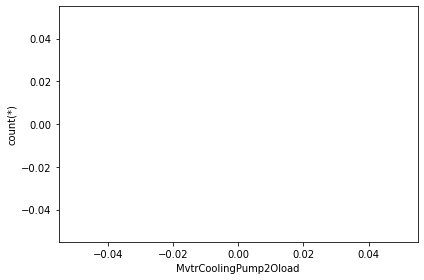

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


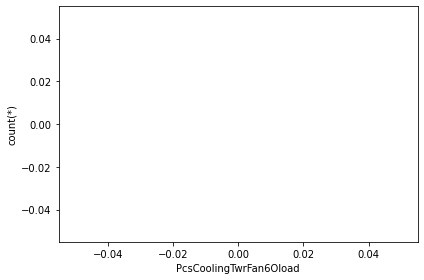

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


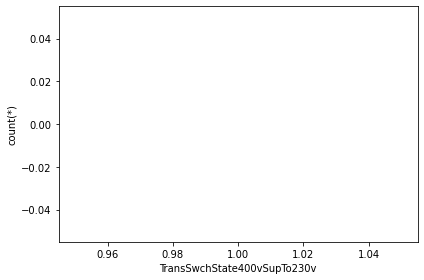

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


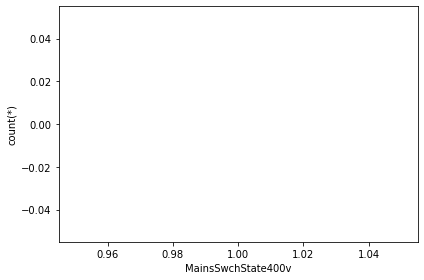

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


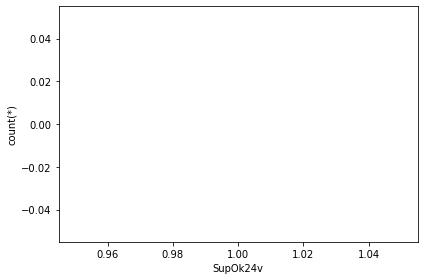

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


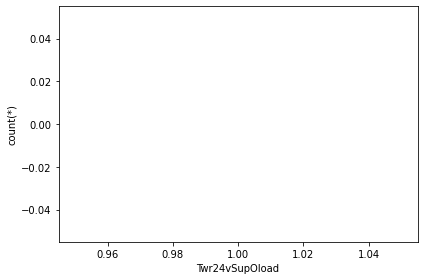

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


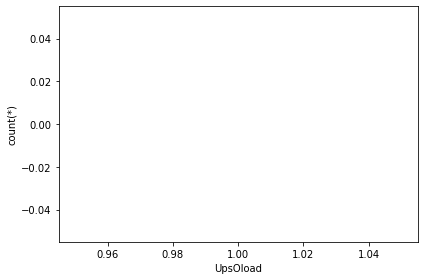

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


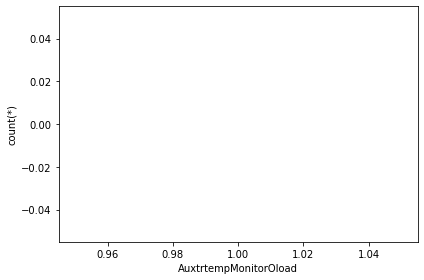

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


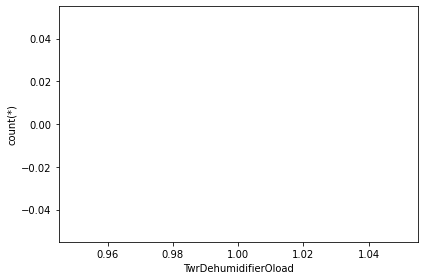

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


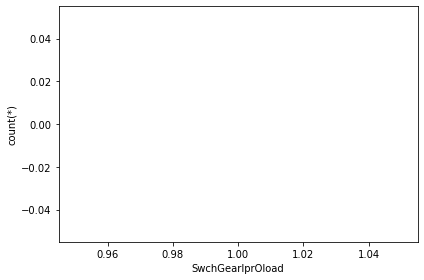

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


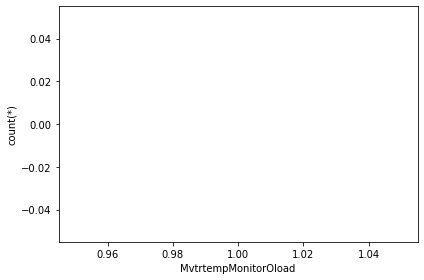

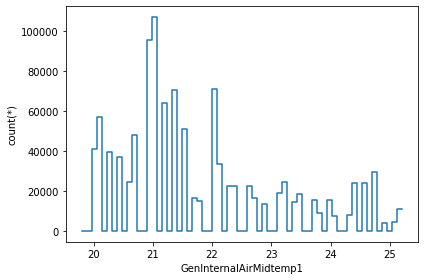

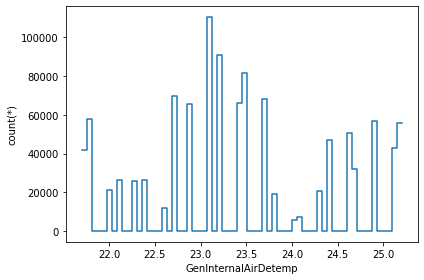

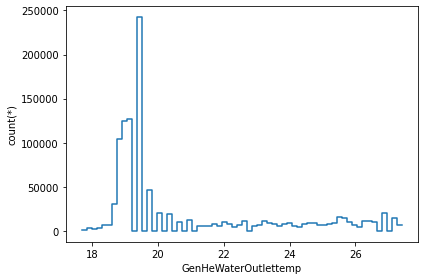

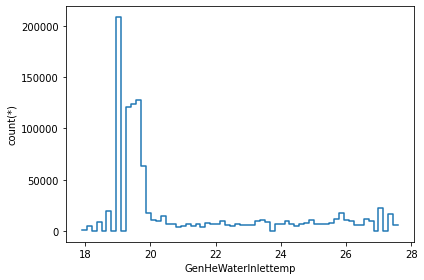

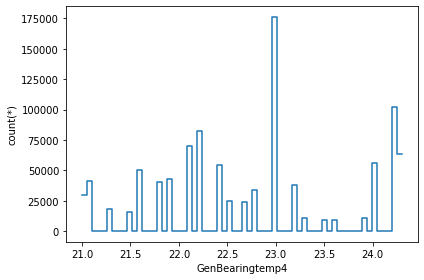

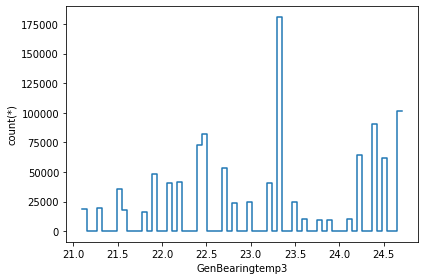

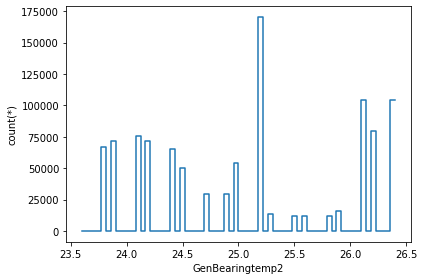

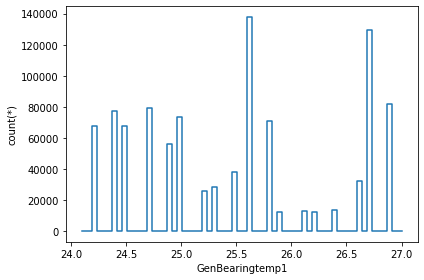

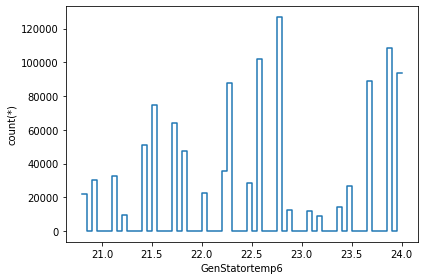

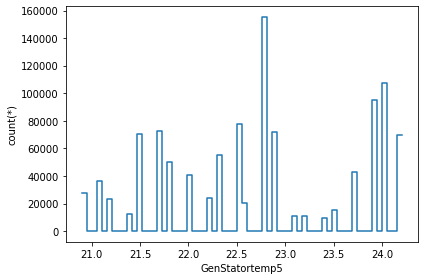

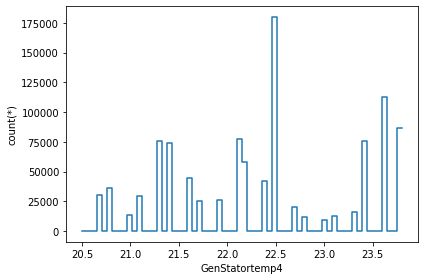

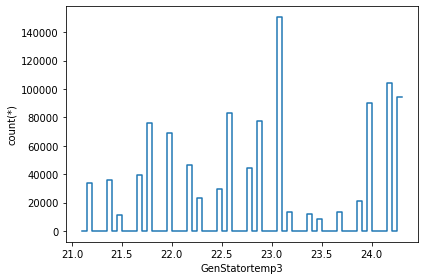

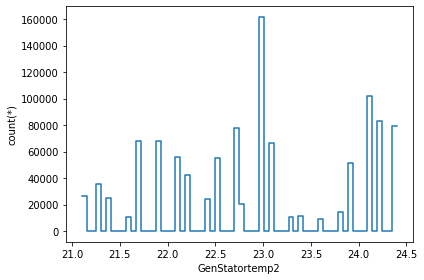

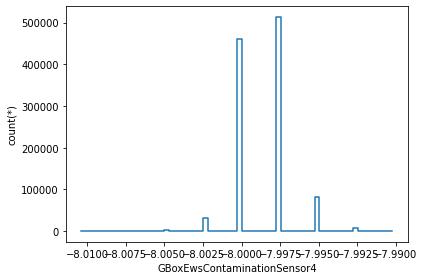

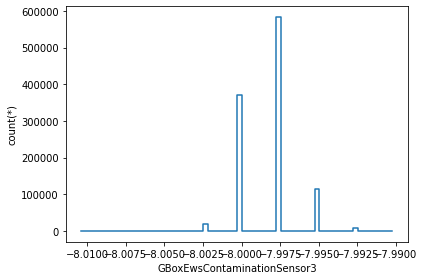

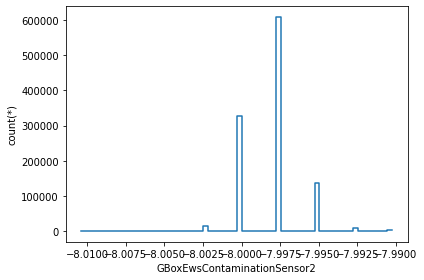

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


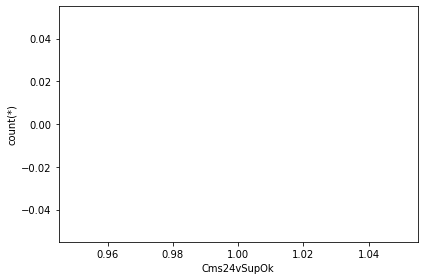

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


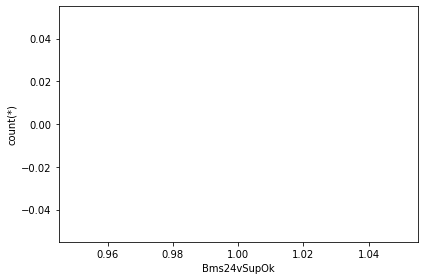

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


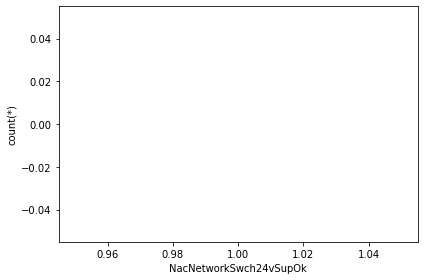

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


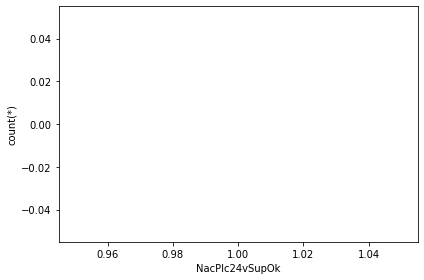

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


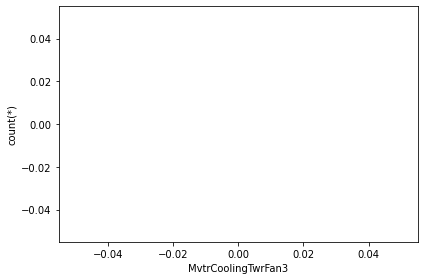

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


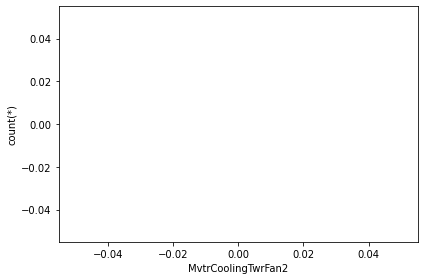

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


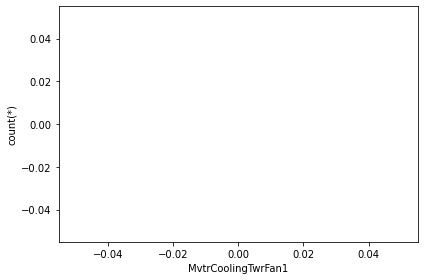

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


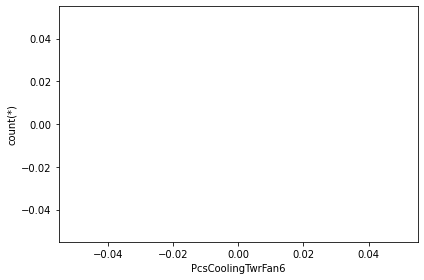

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


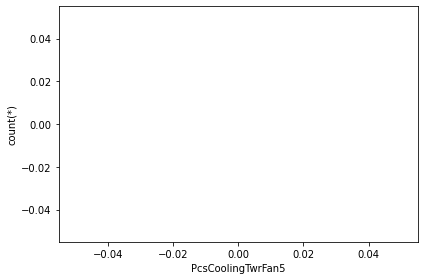

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


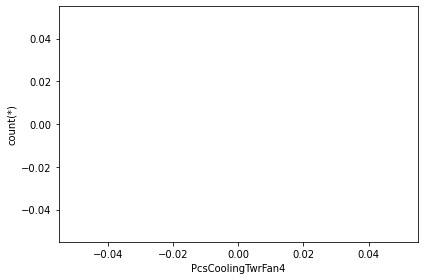

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


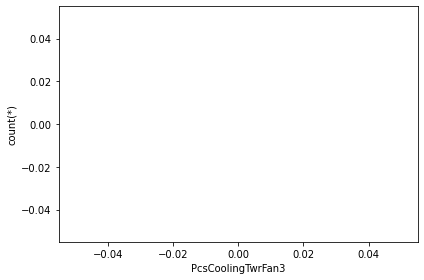

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


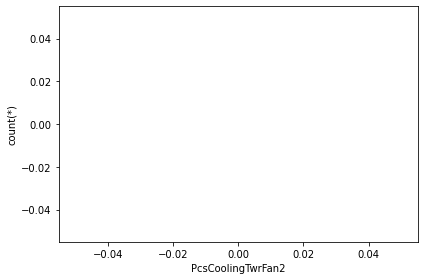

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


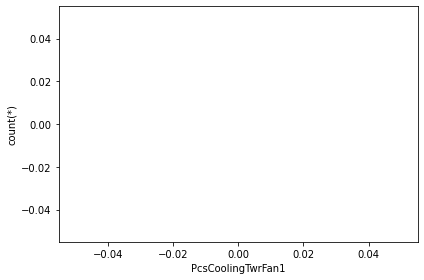

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


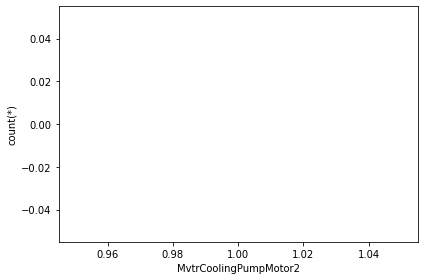

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


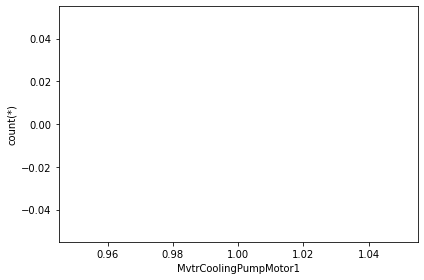

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


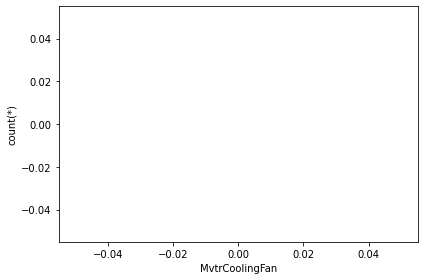

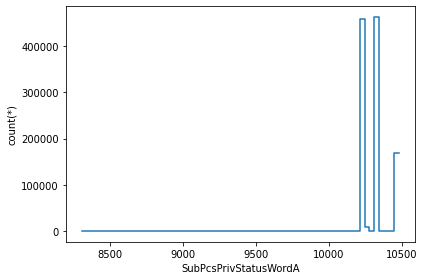

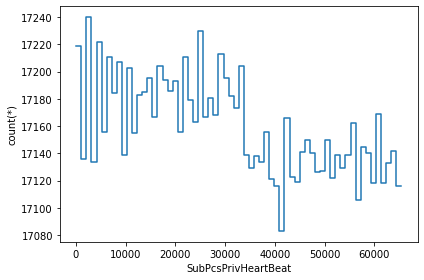

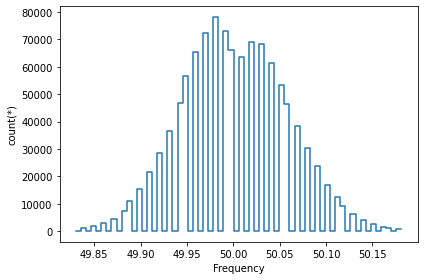

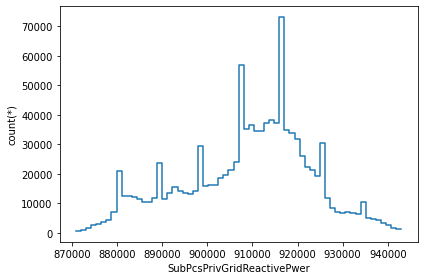

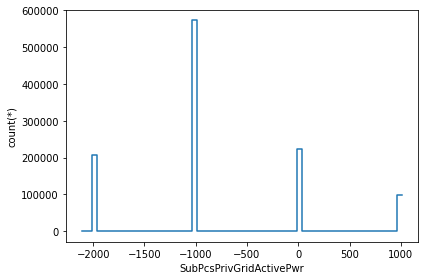

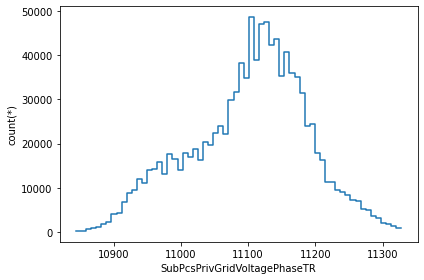

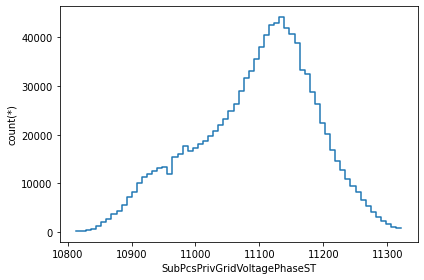

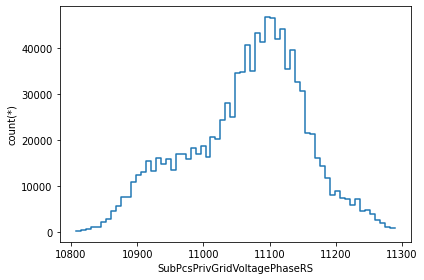

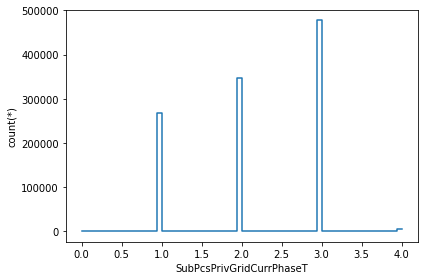

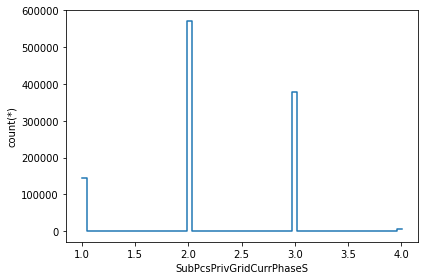

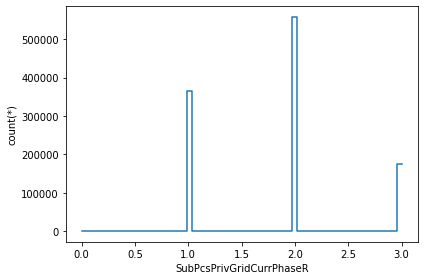

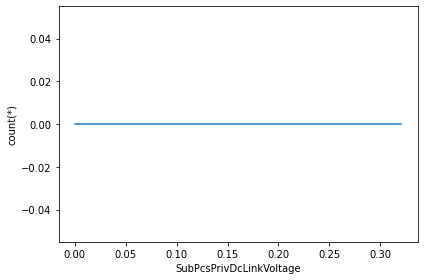

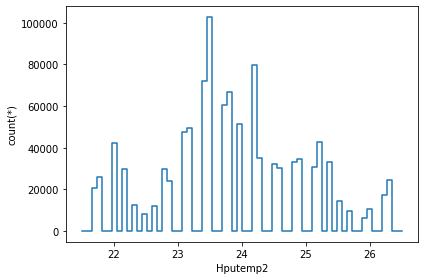

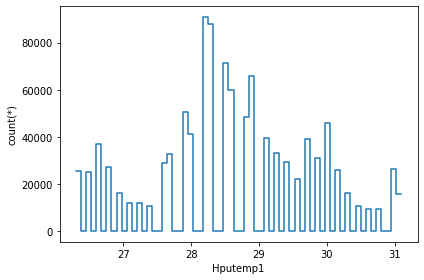

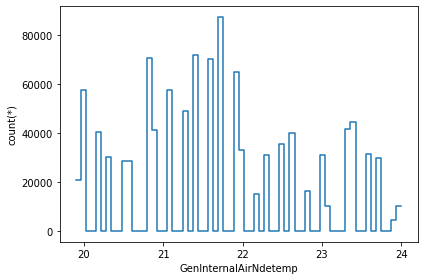

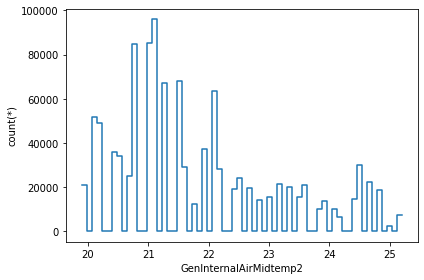

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


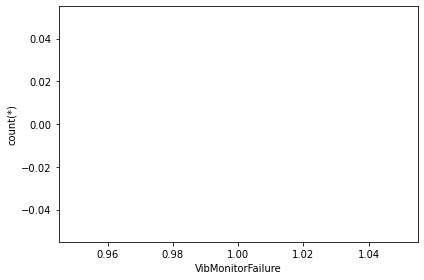

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


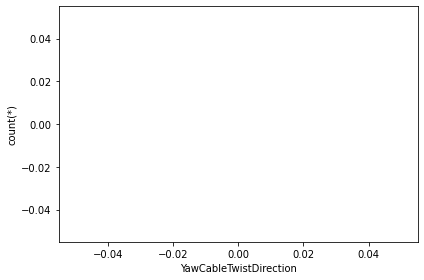

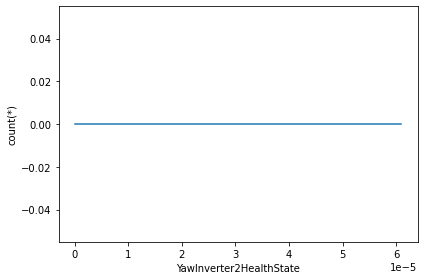

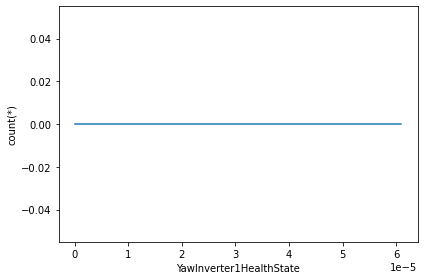

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


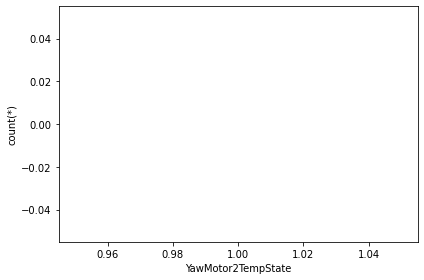

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


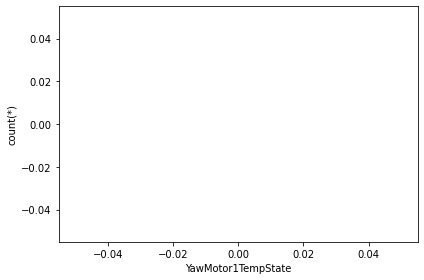

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


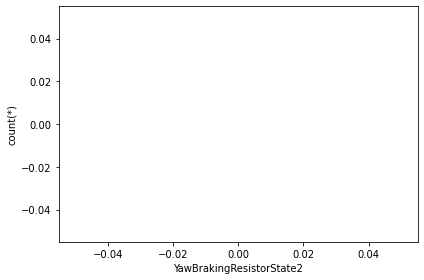

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


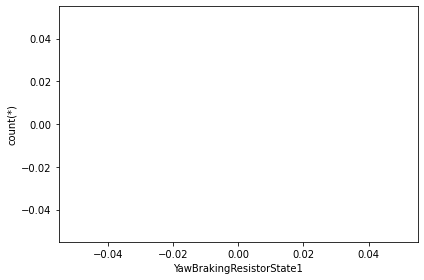

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


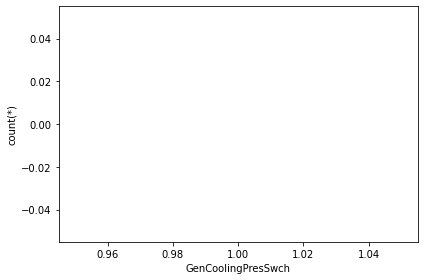

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


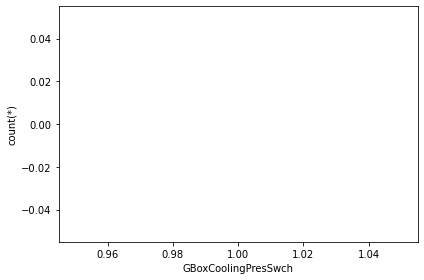

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


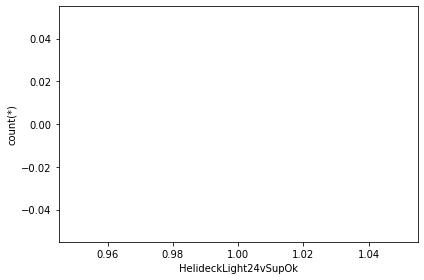

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


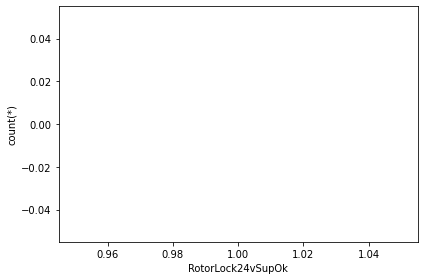

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


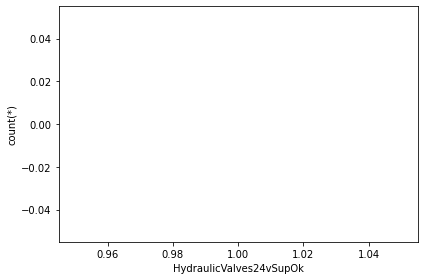

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


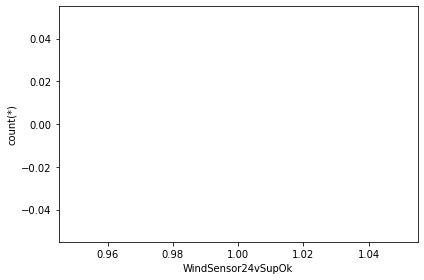

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


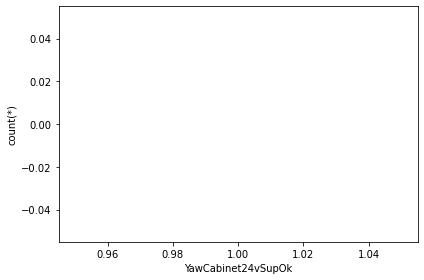

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


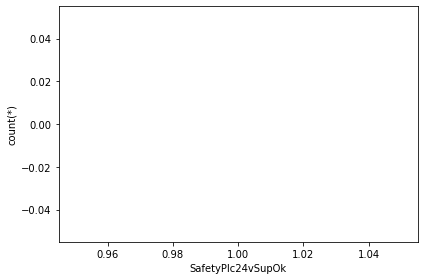

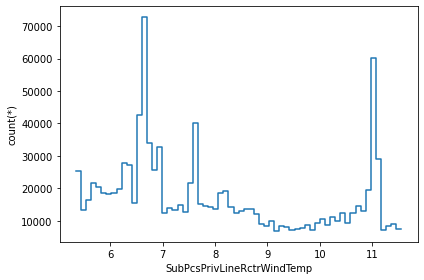

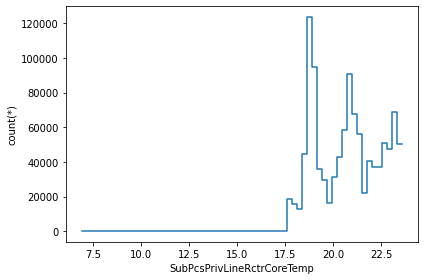

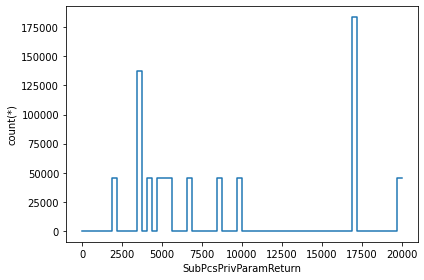

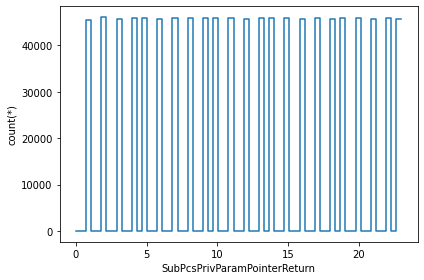

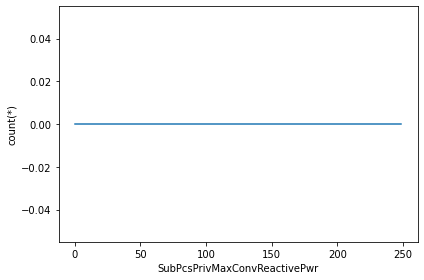

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start


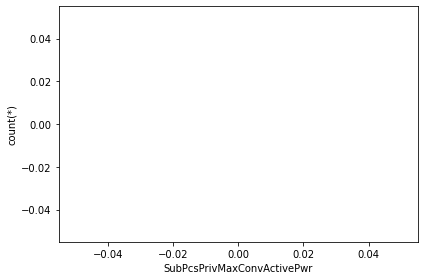

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


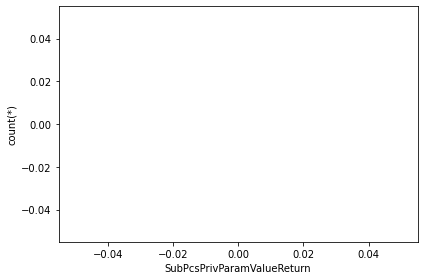

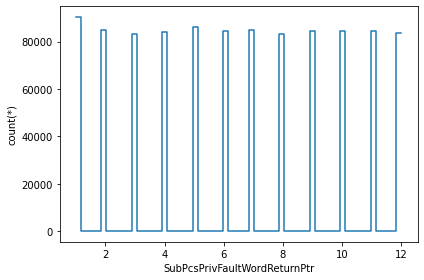

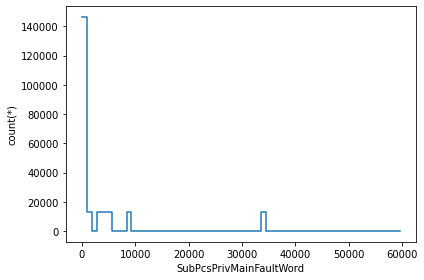

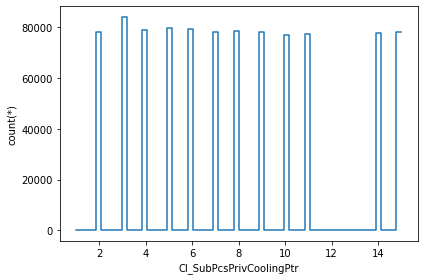

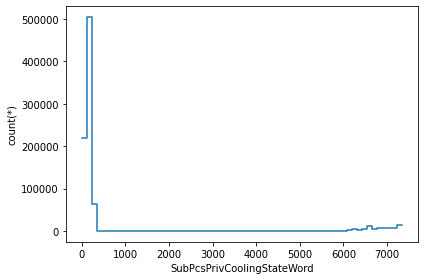

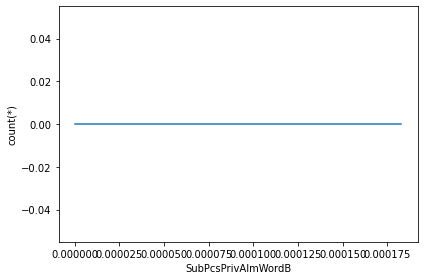

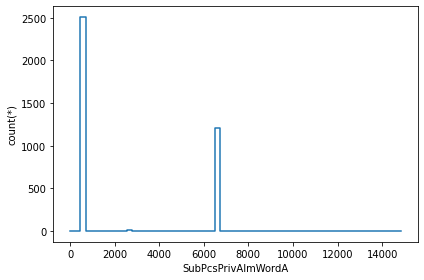

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


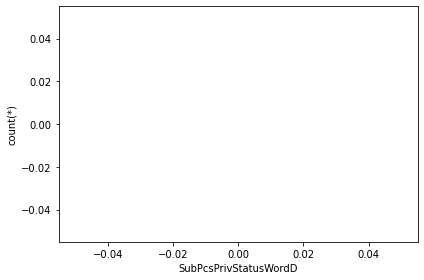

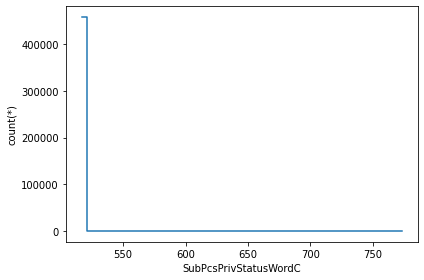

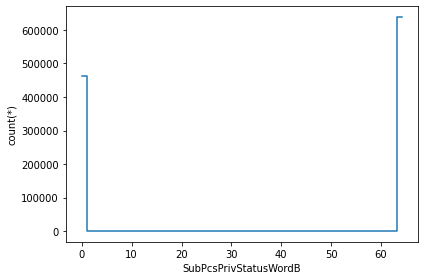

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


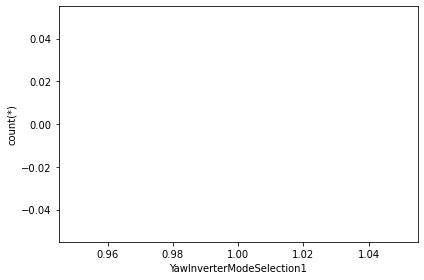

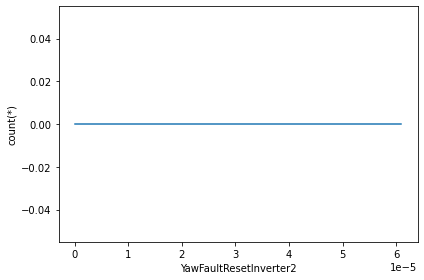

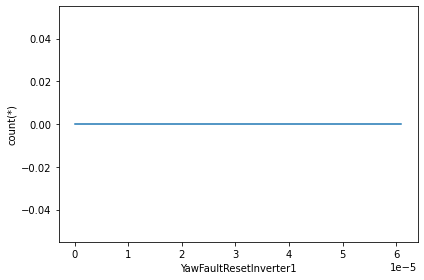

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


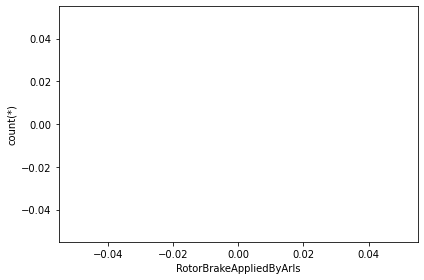

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


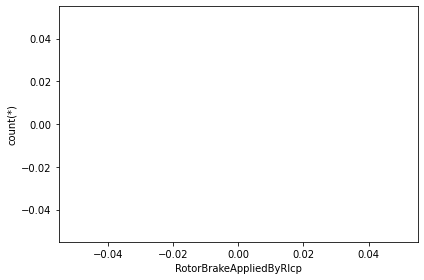

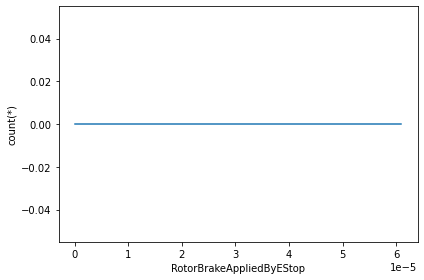

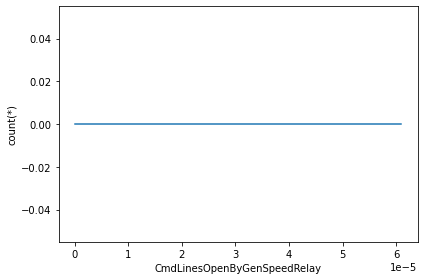

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


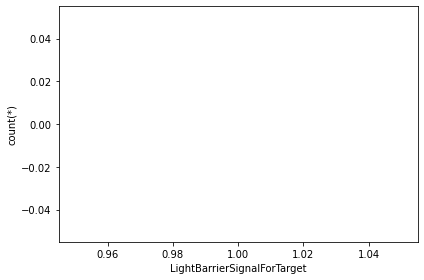

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


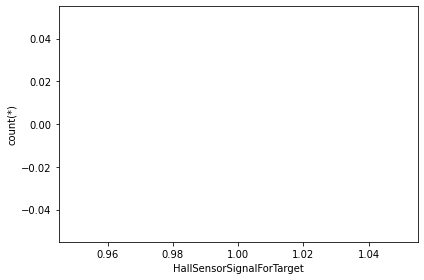

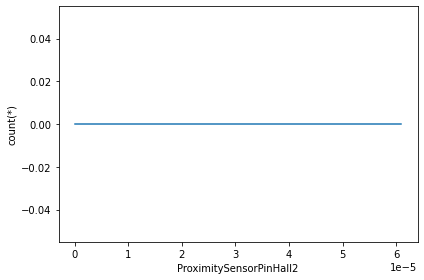

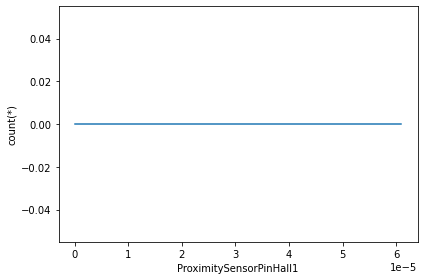

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


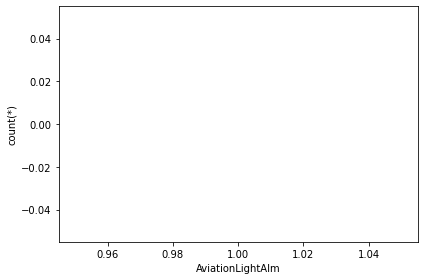

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


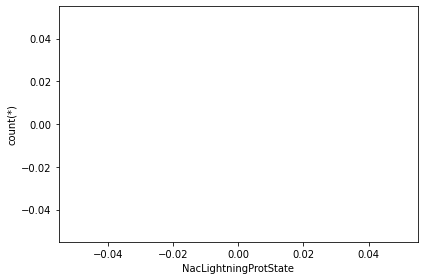

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


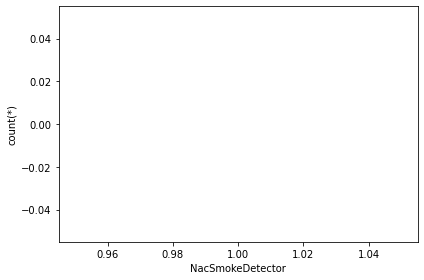

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


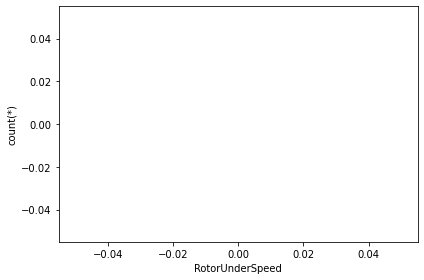

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


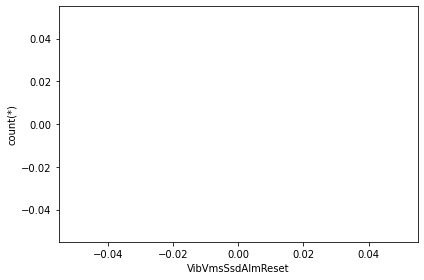

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


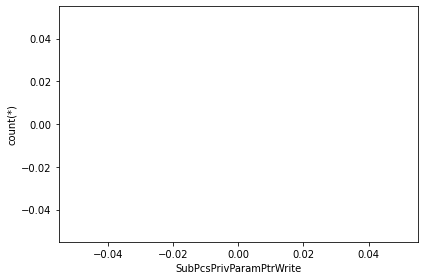

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


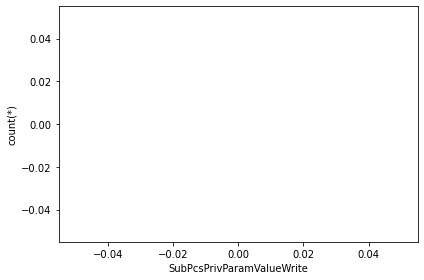

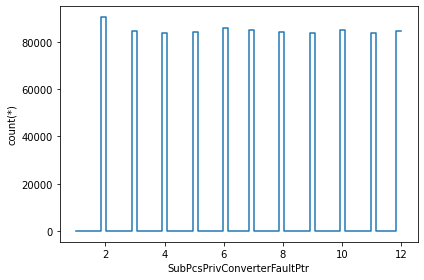

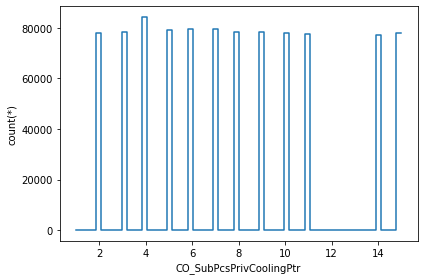

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


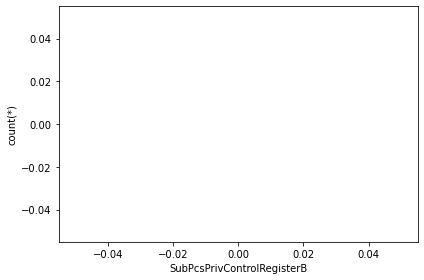

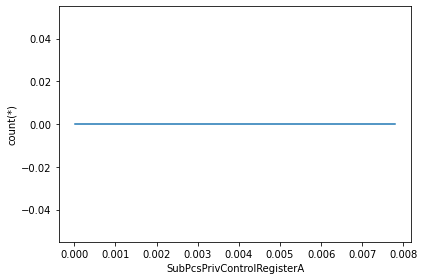

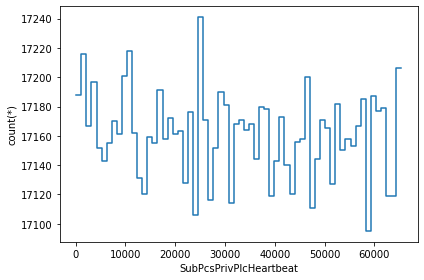

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


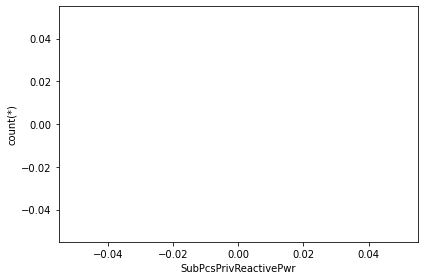

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


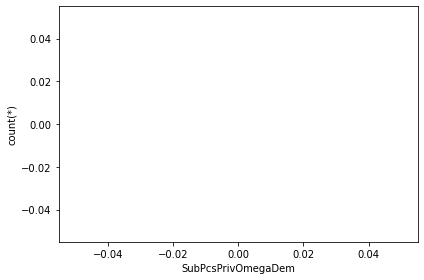

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


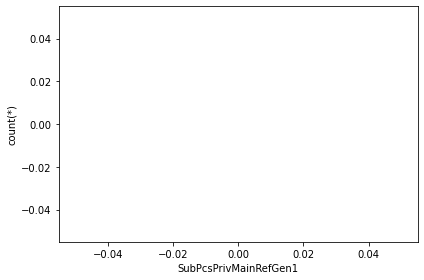

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


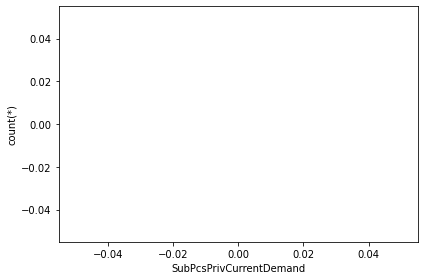

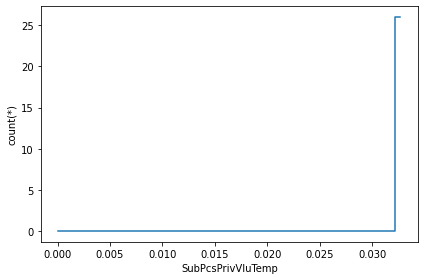

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


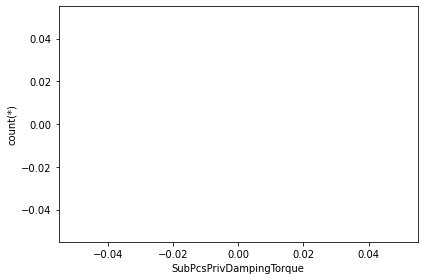

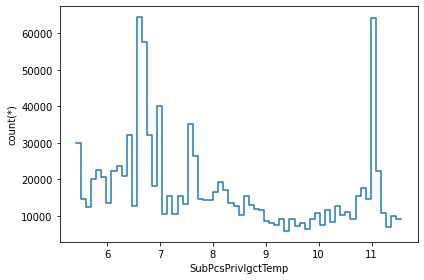

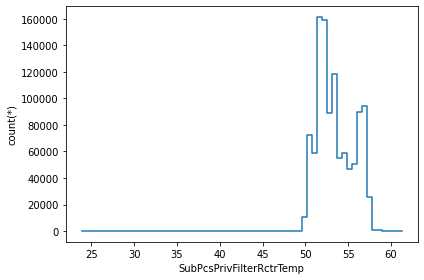

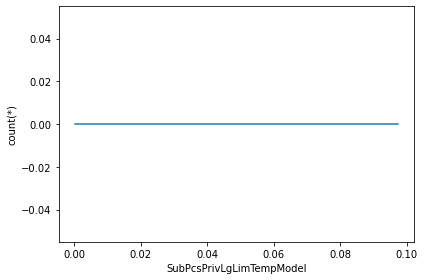

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


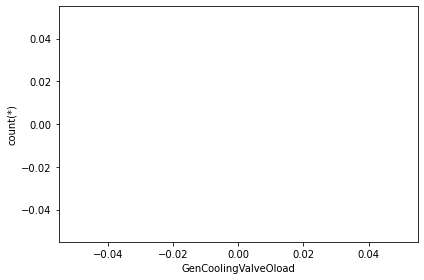

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


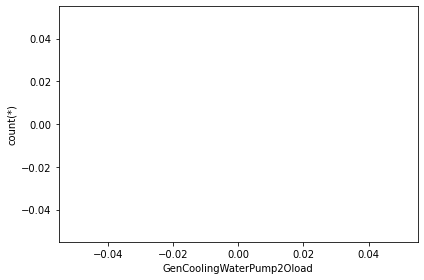

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


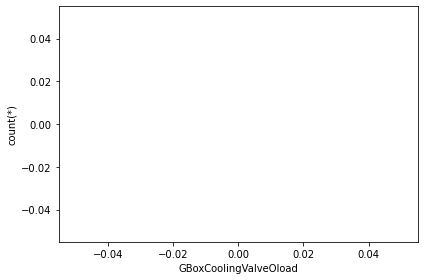

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


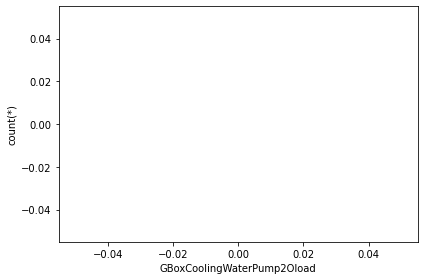

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


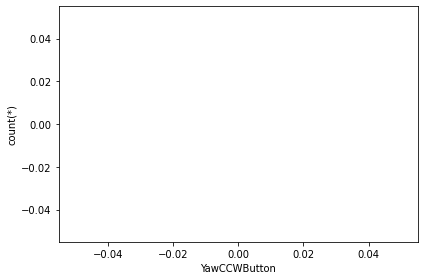

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


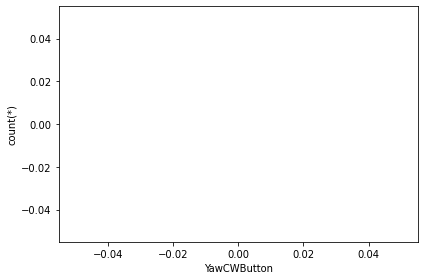

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


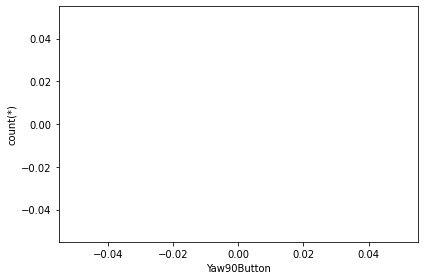

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


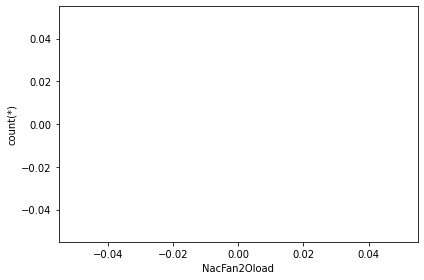

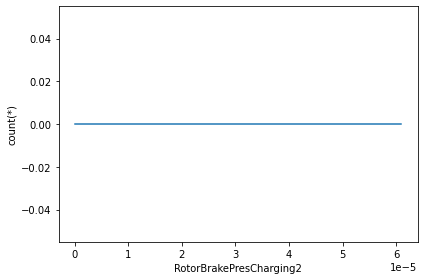

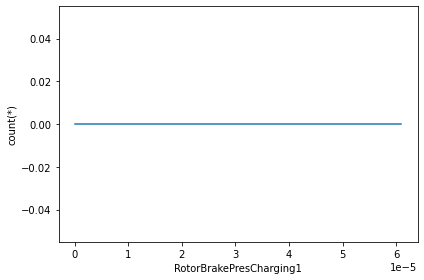

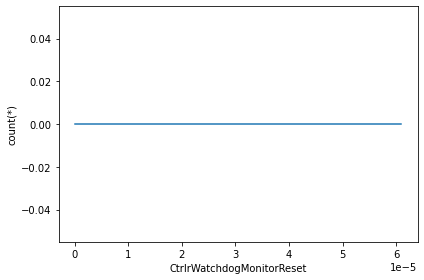

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


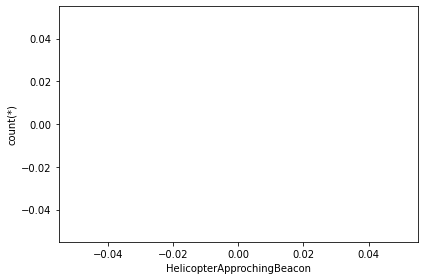

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


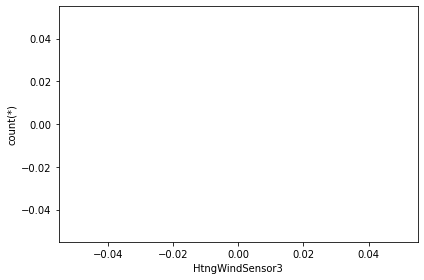

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


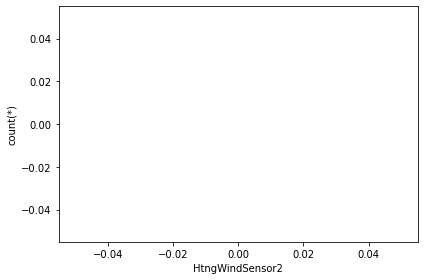

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


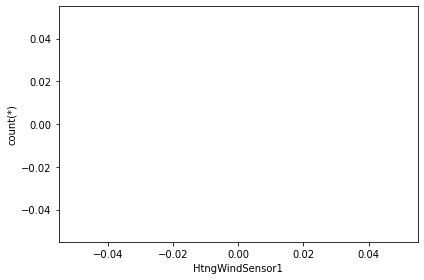

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


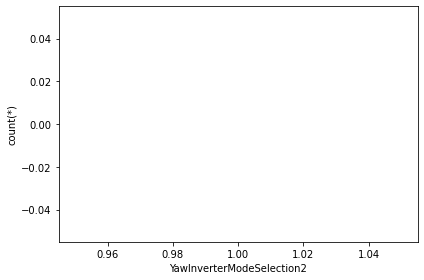

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


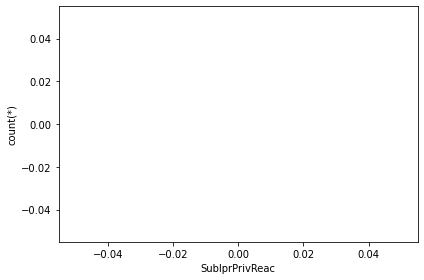

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


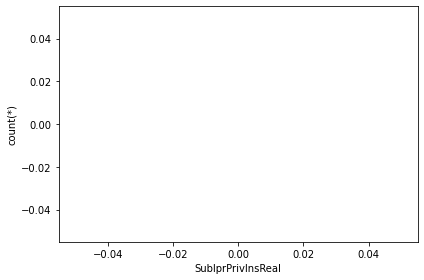

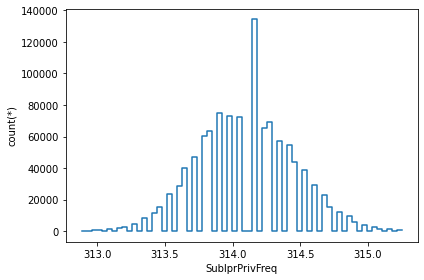

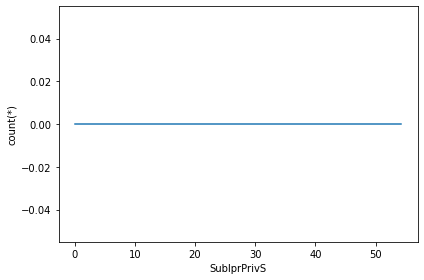

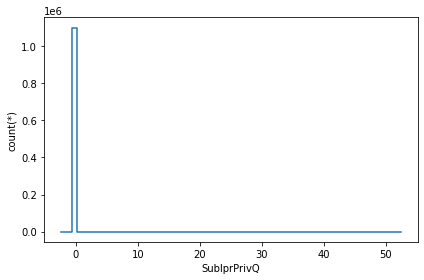

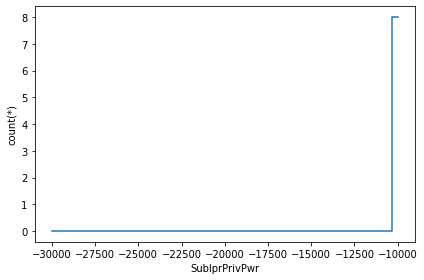

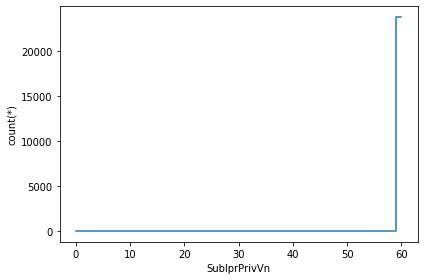

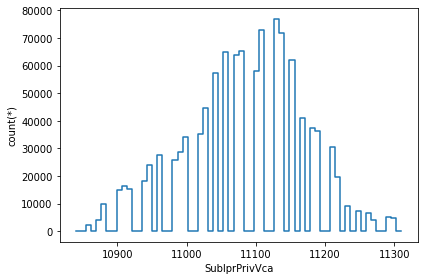

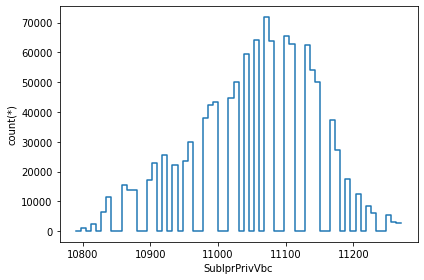

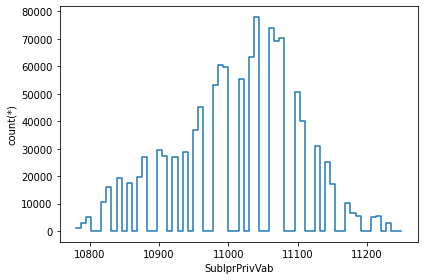

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


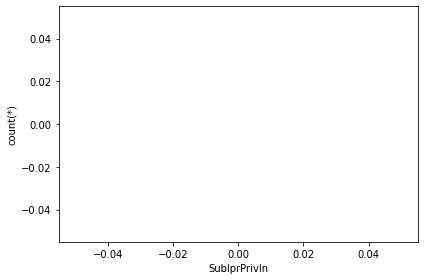

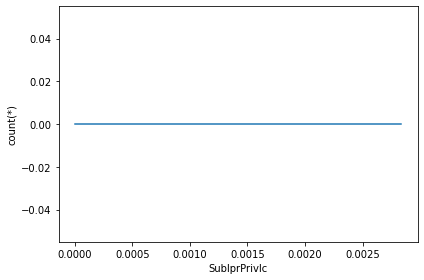

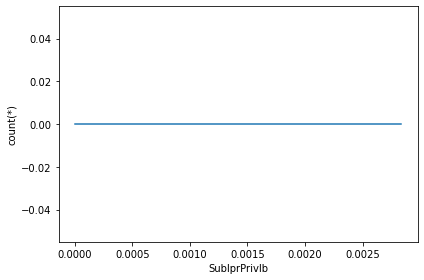

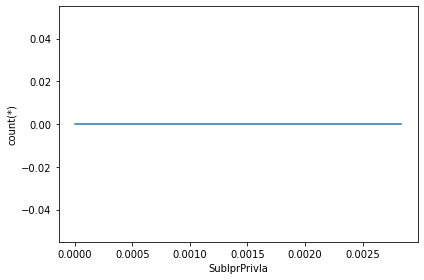

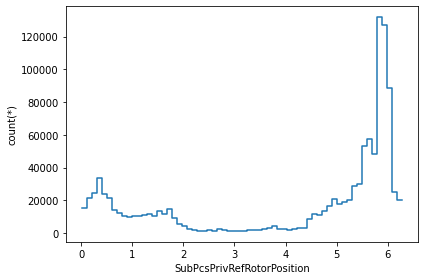

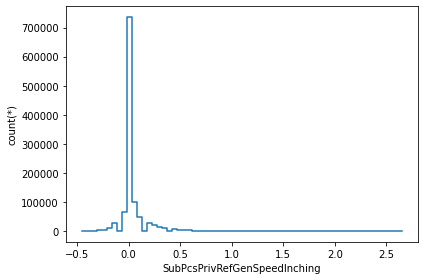

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


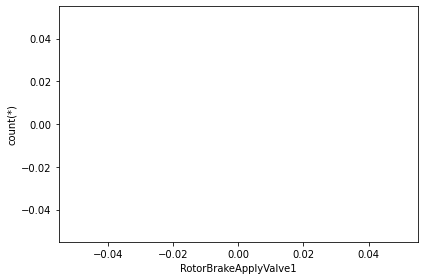

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


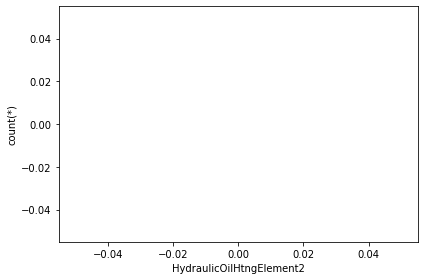

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


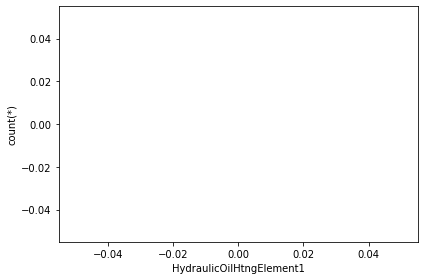

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


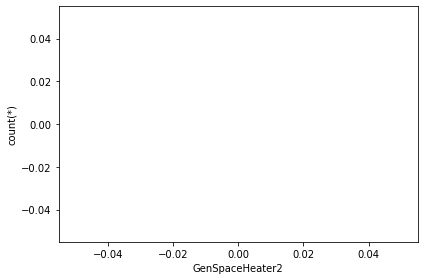

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


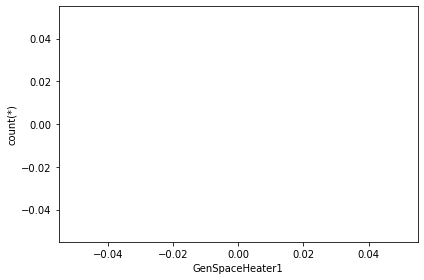

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


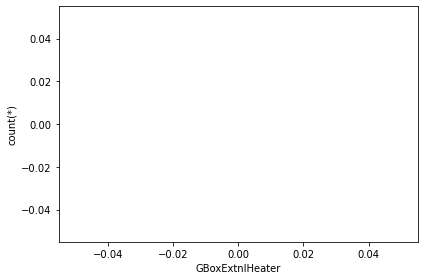

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


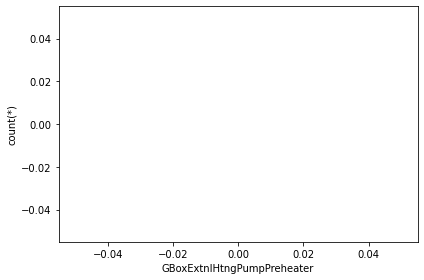

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


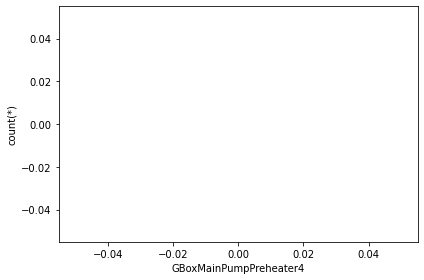

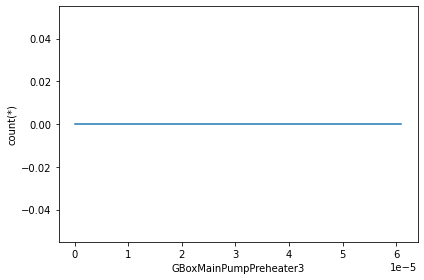

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


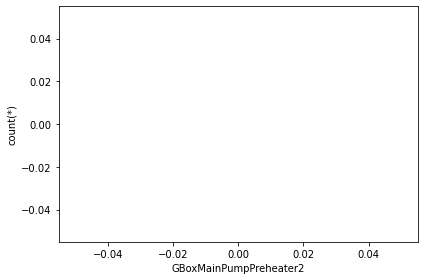

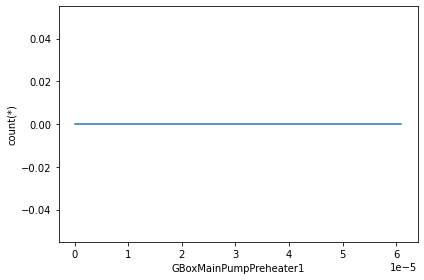

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


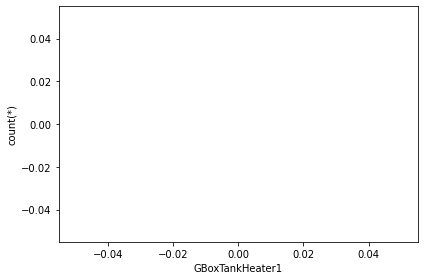

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


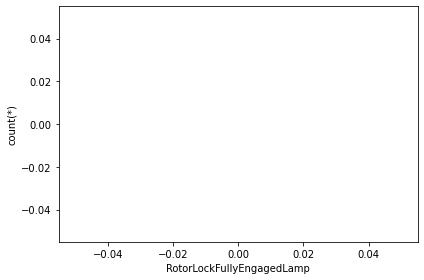

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


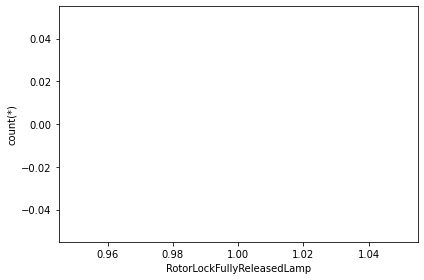

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


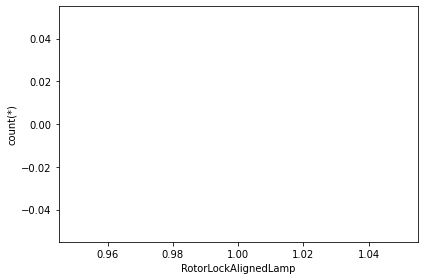

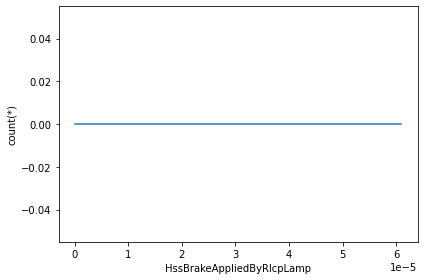

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


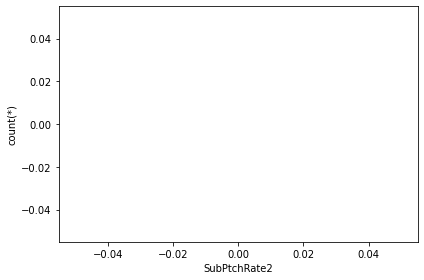

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


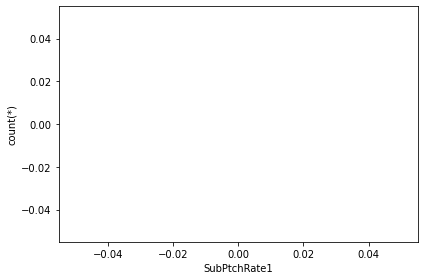

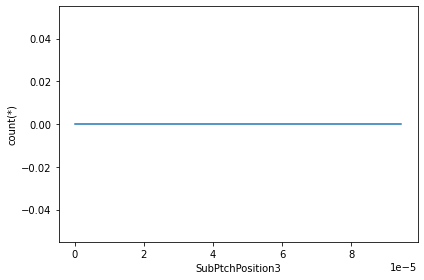

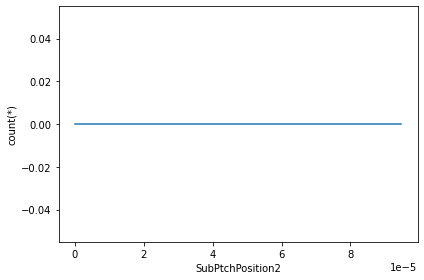

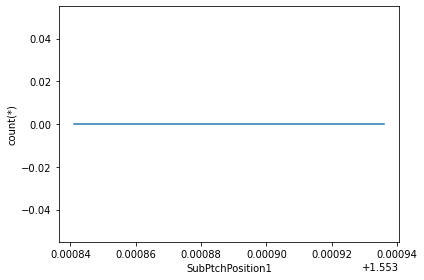

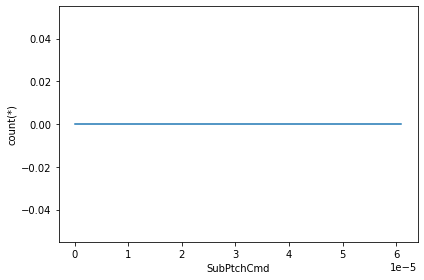

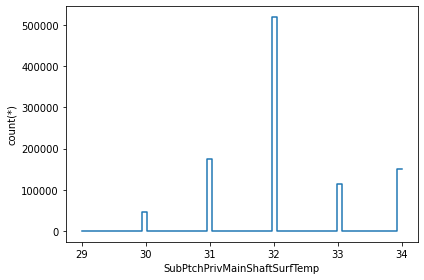

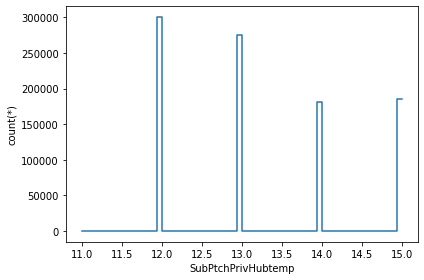

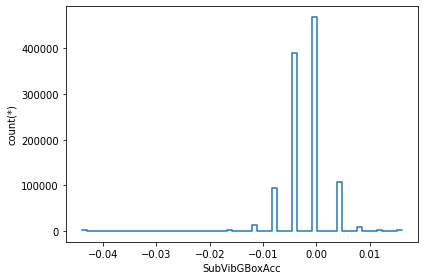

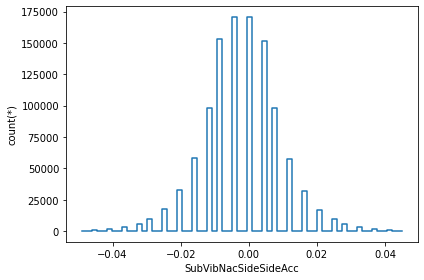

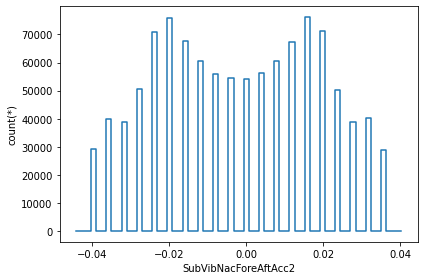

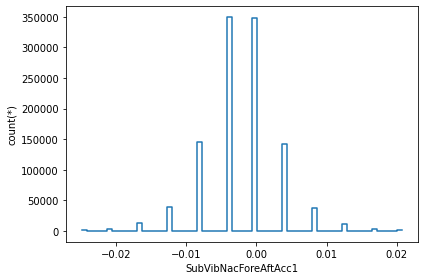

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


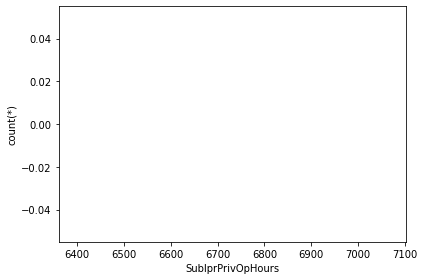

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


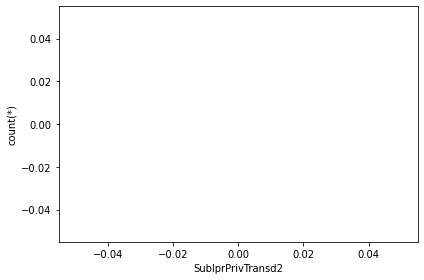

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


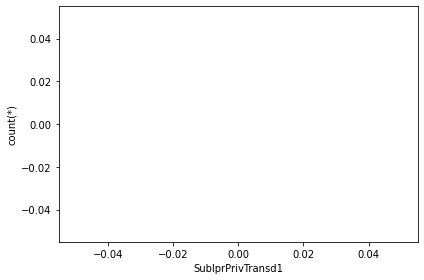

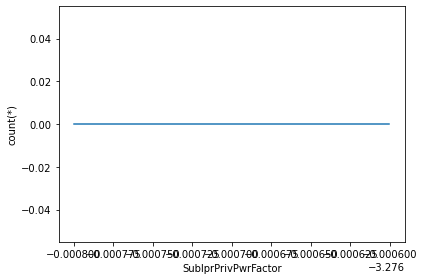

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


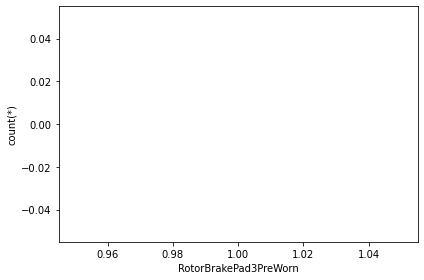

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


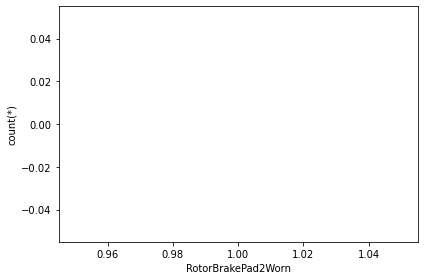

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


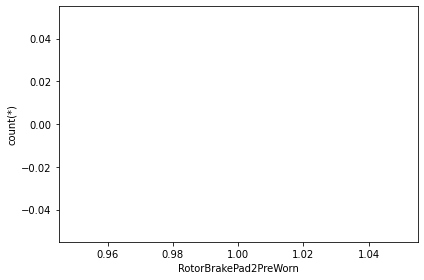

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


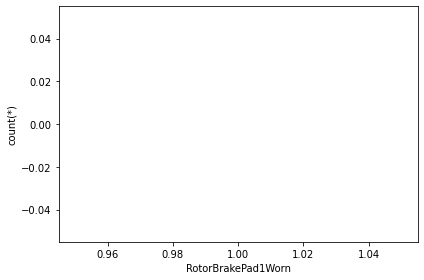

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


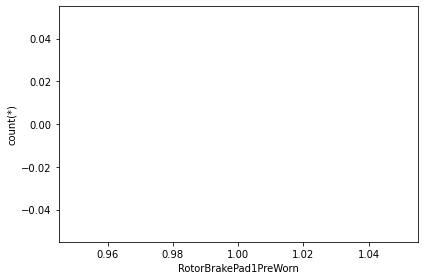

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


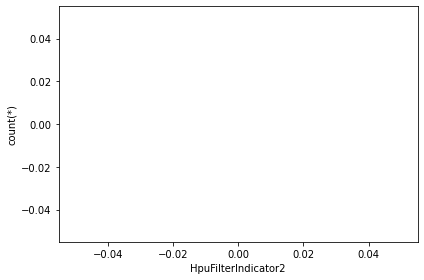

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


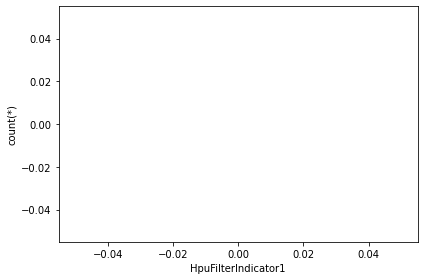

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


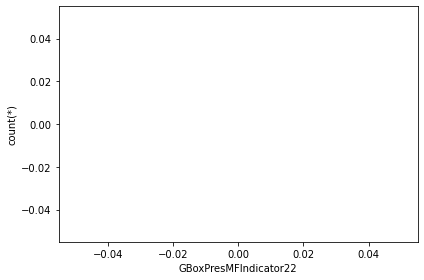

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


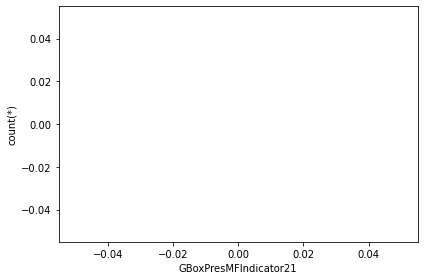

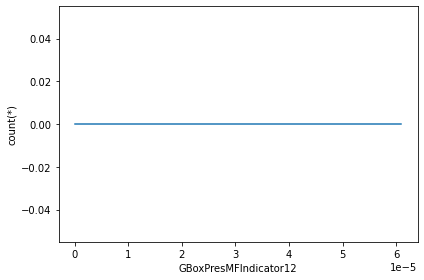

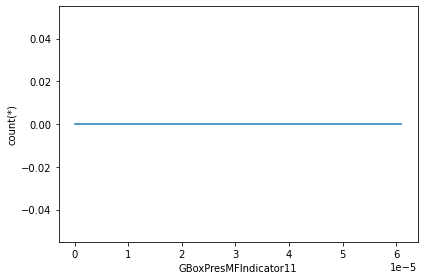

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


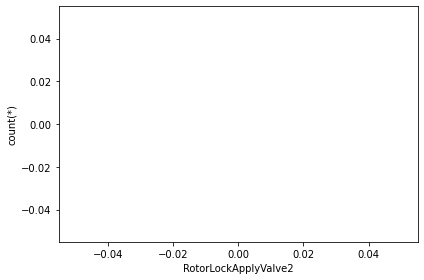

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


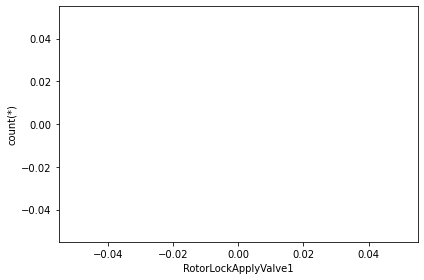

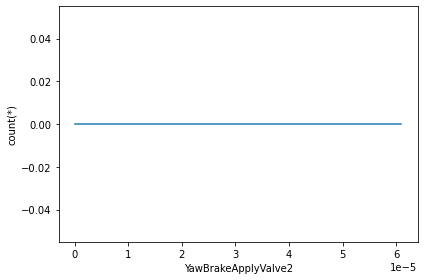

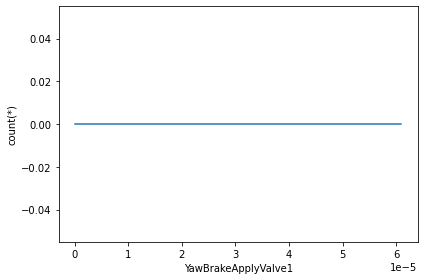

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


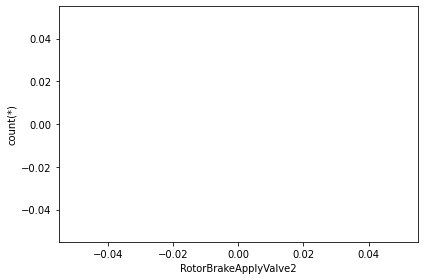

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


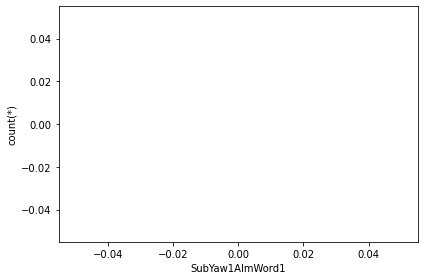

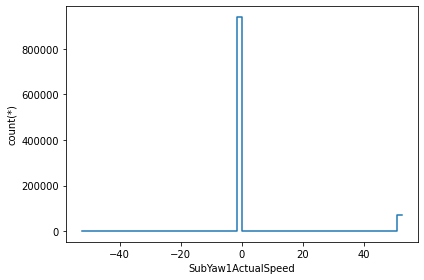

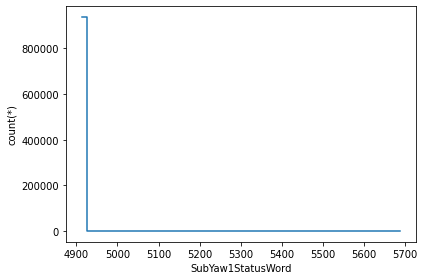

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


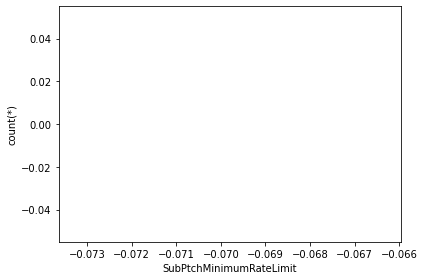

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


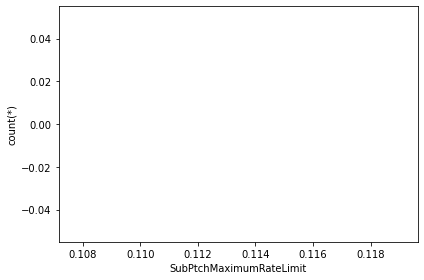

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


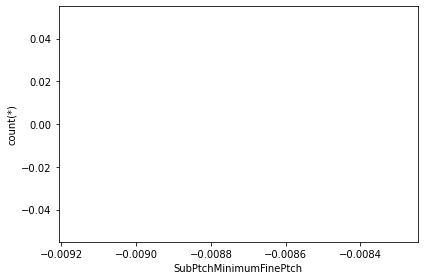

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


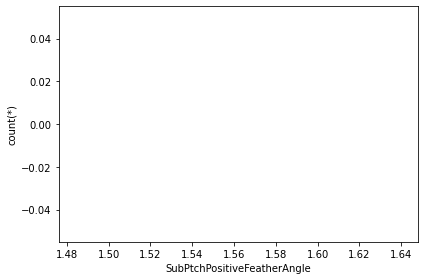

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


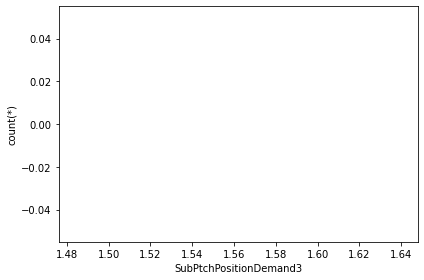

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


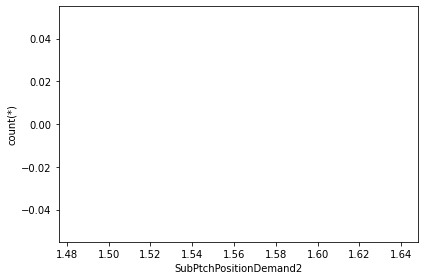

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


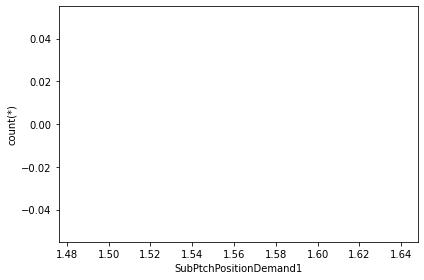

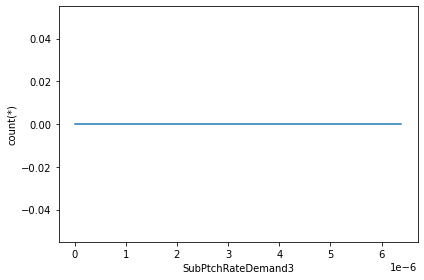

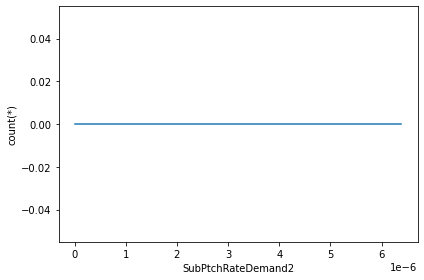

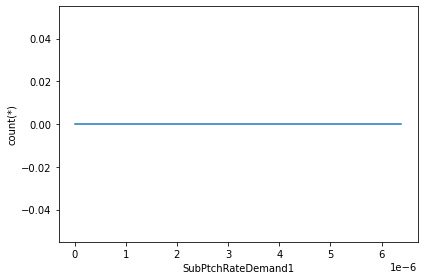

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


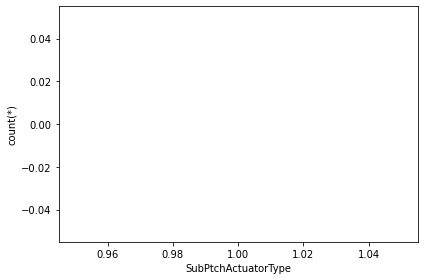

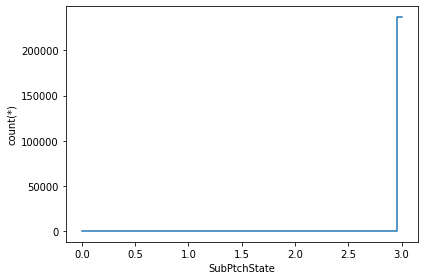

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


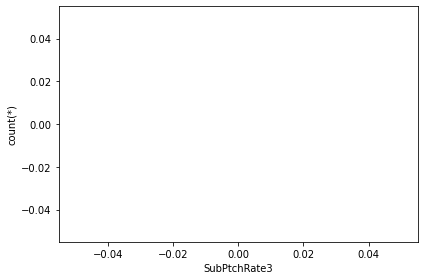

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


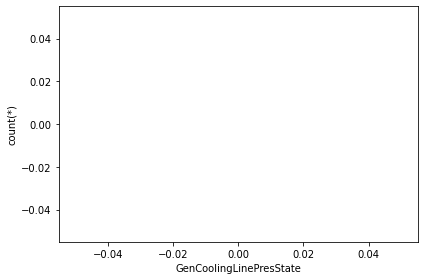

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


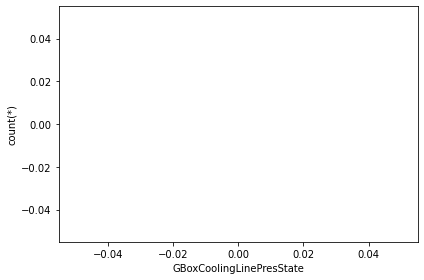

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


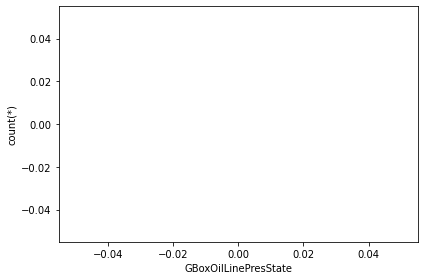

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


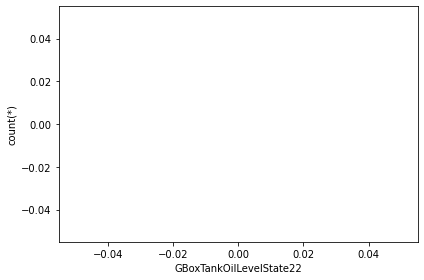

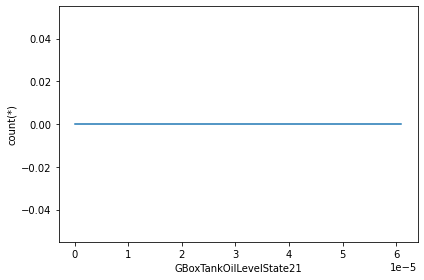

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


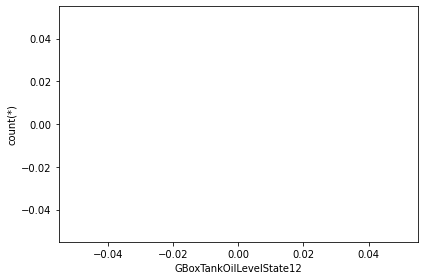

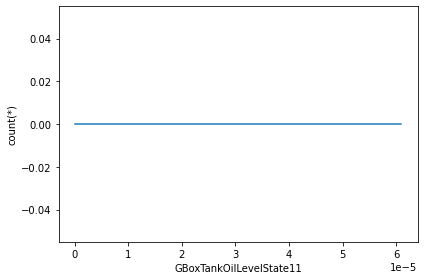

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


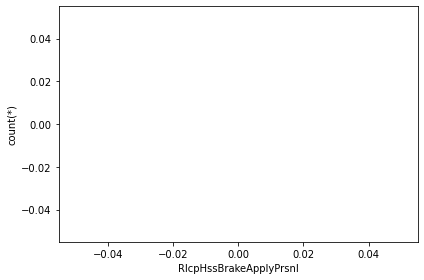

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


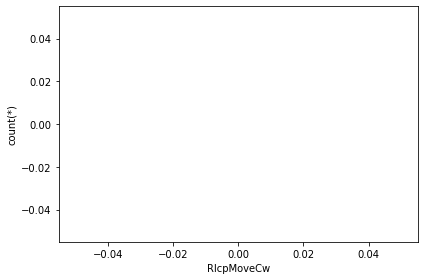

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


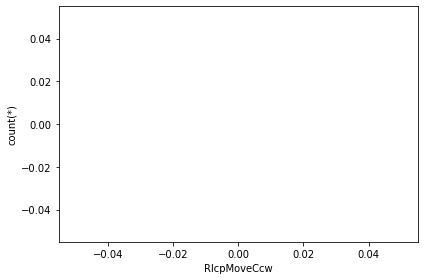

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


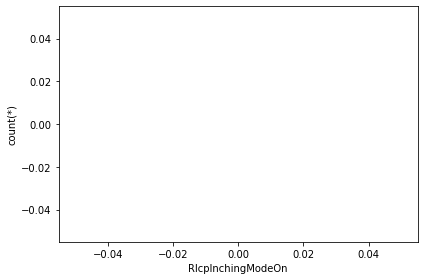

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


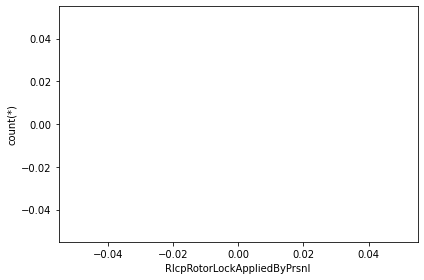

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


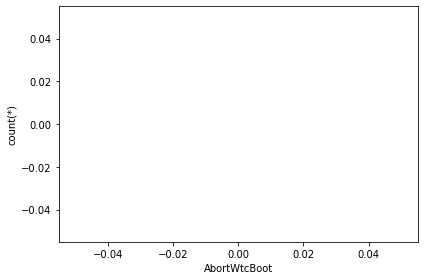

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


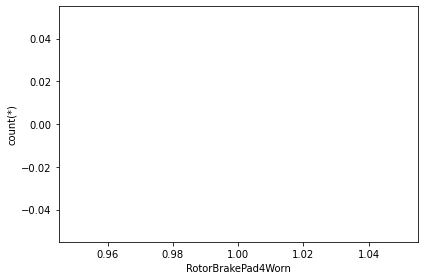

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


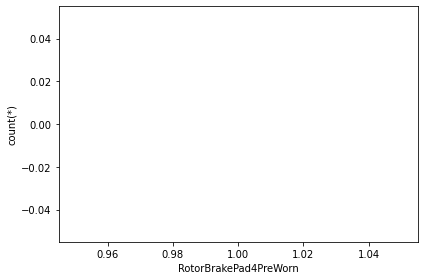

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


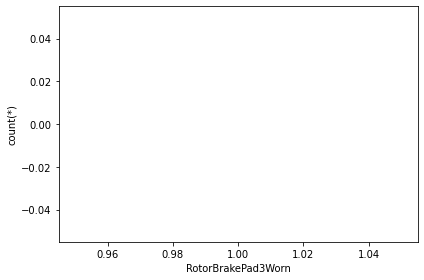

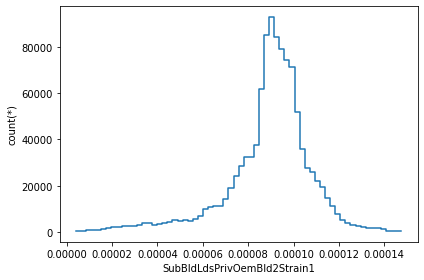

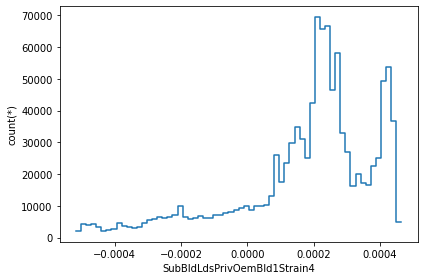

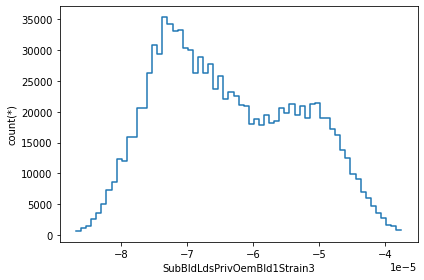

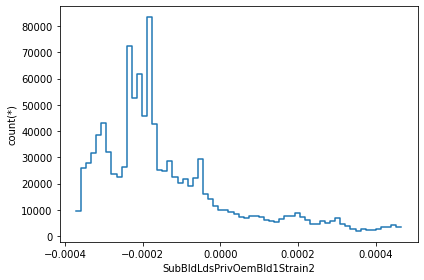

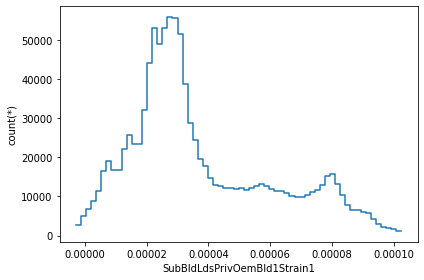

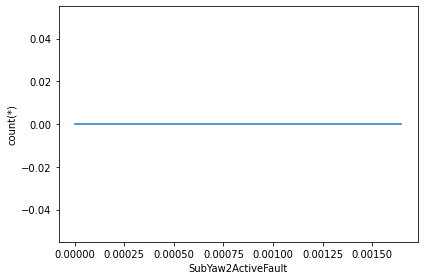

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


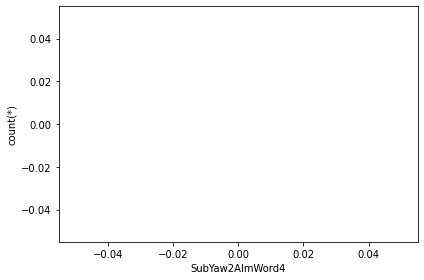

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


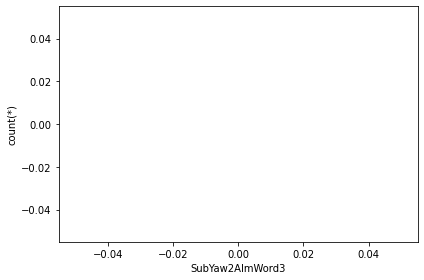

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


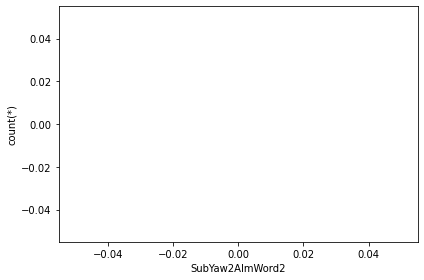

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


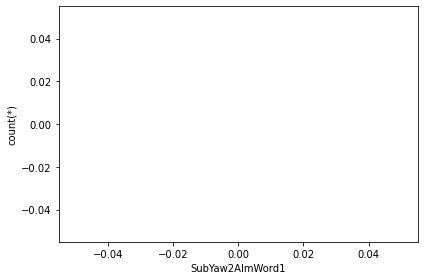

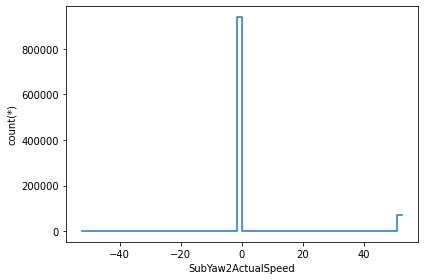

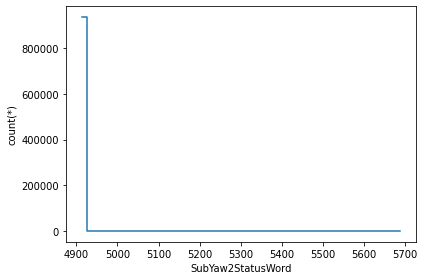

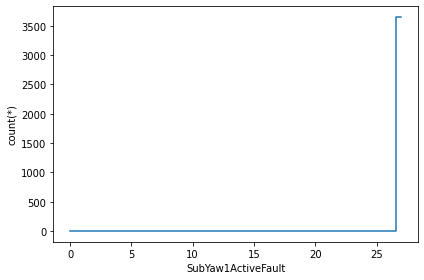

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


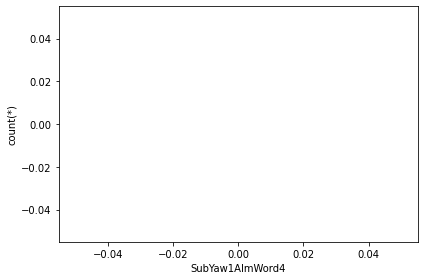

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


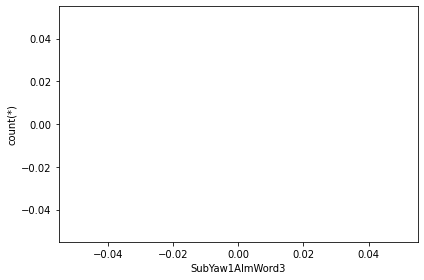

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


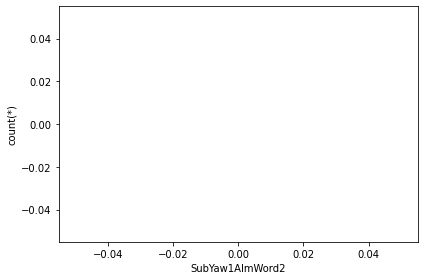

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


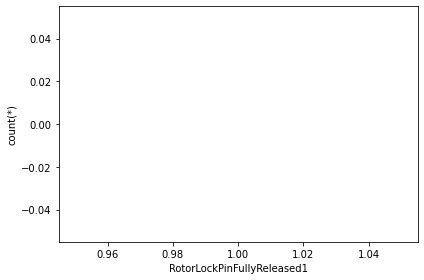

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


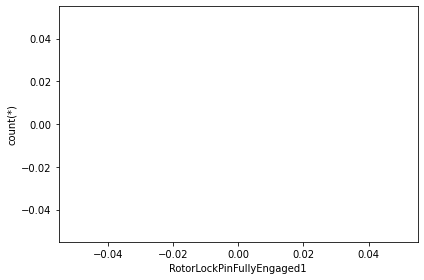

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


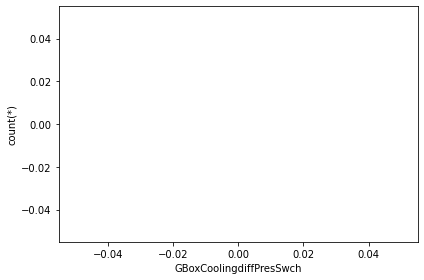

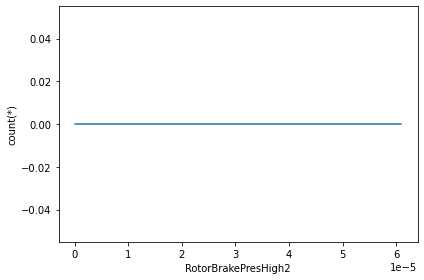

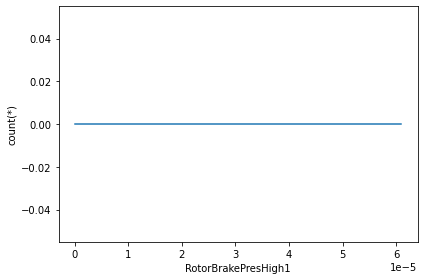

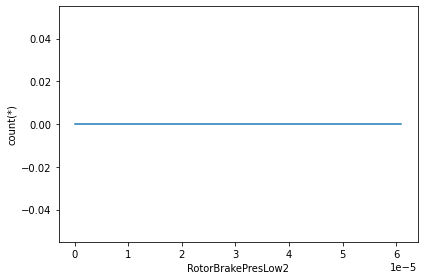

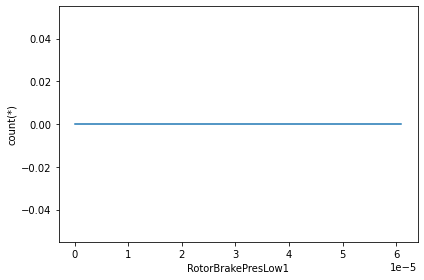

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


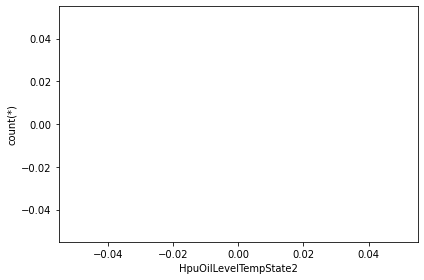

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


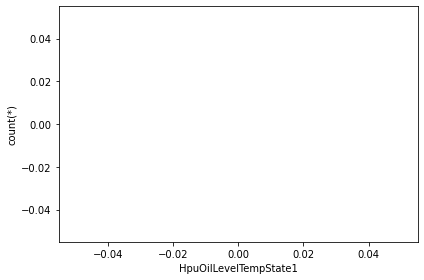

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


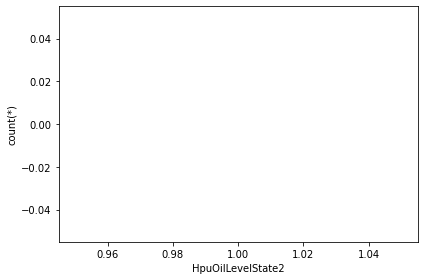

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


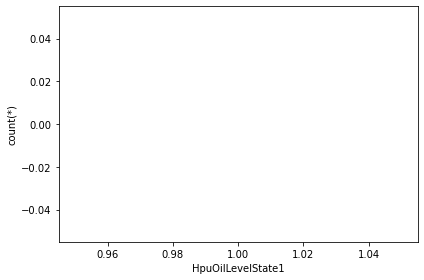

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


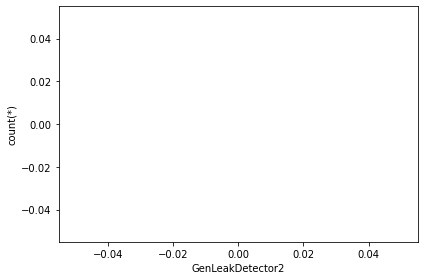

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


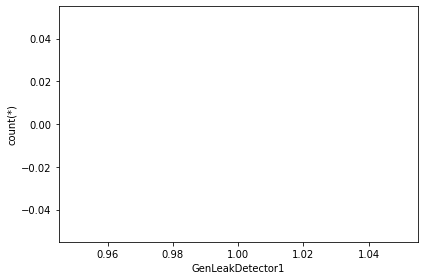

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


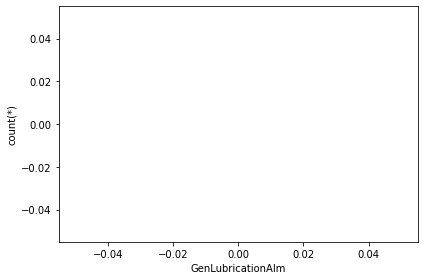

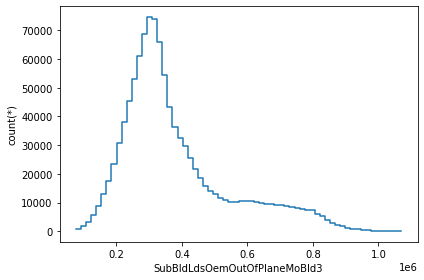

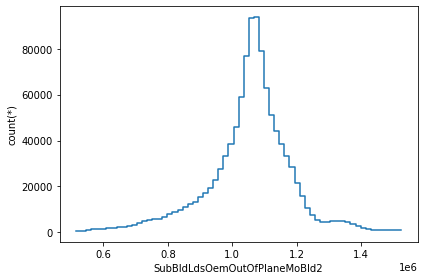

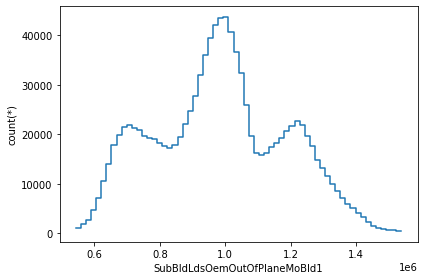

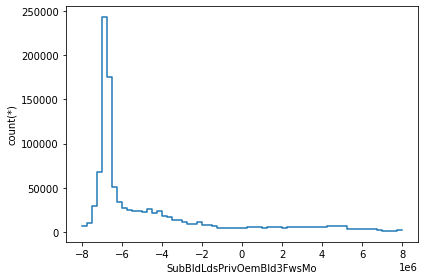

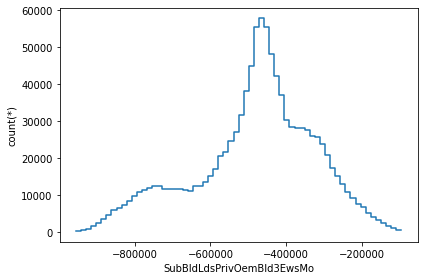

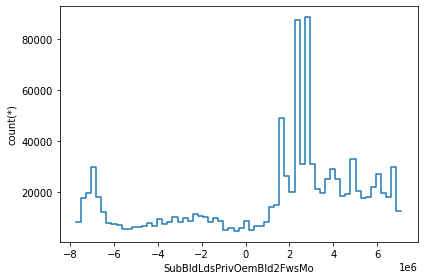

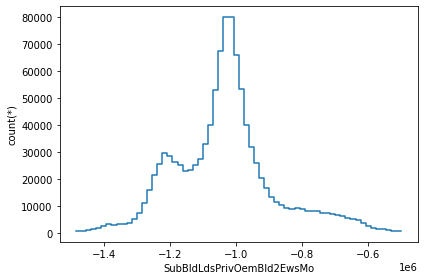

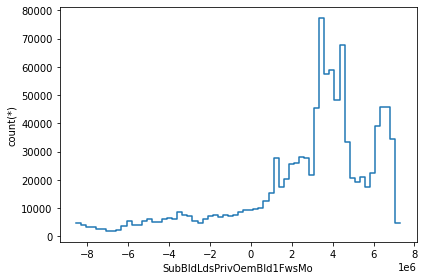

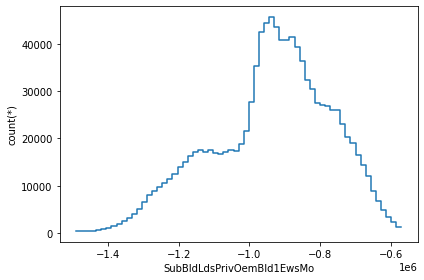

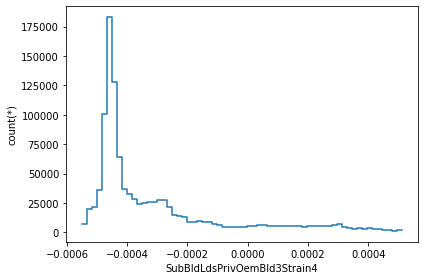

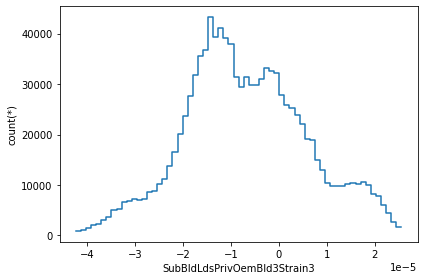

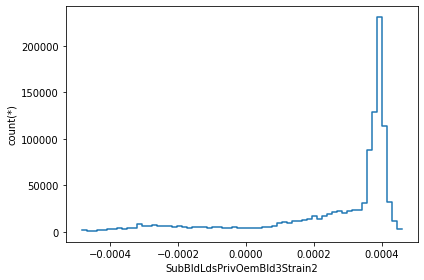

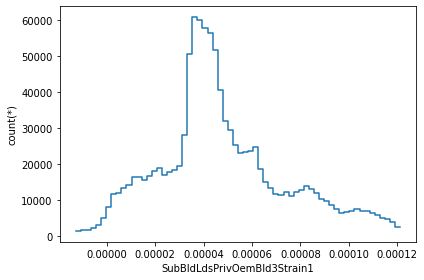

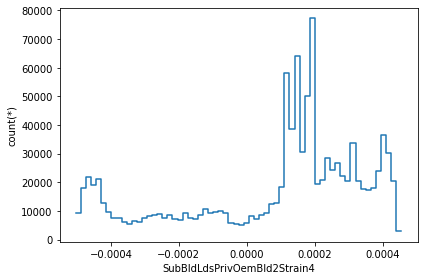

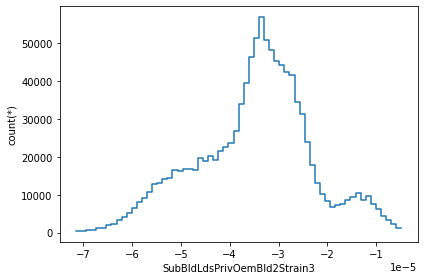

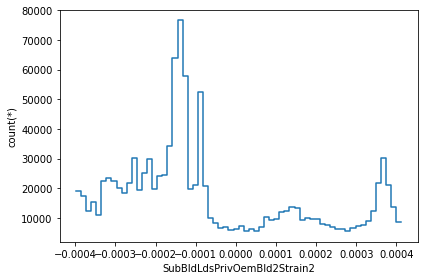

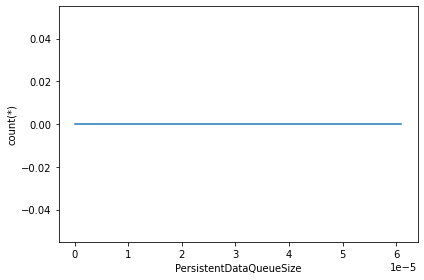

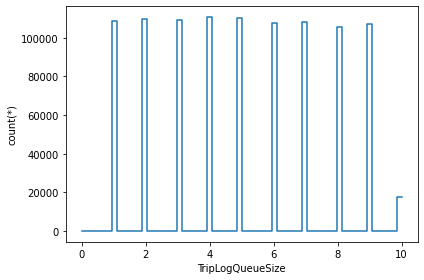

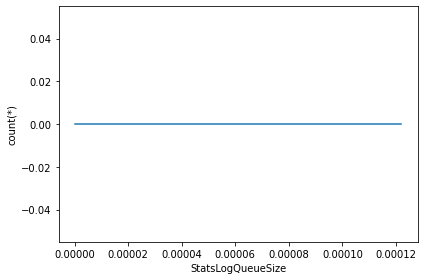

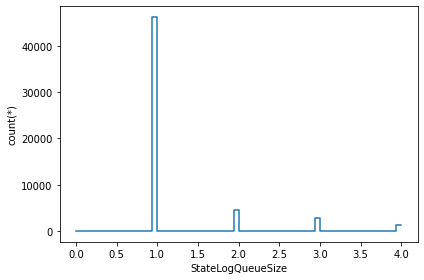

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


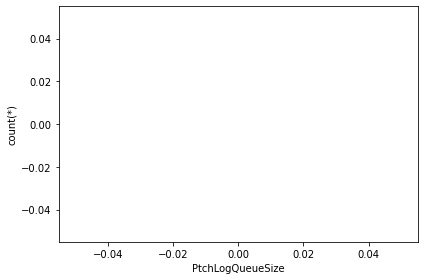

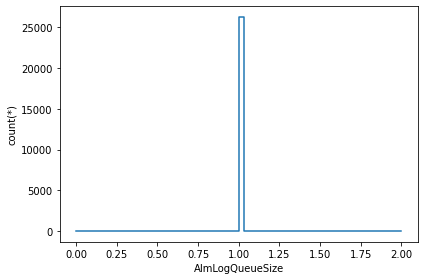

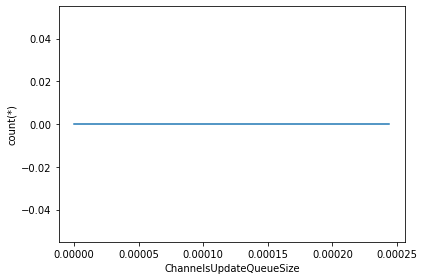

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


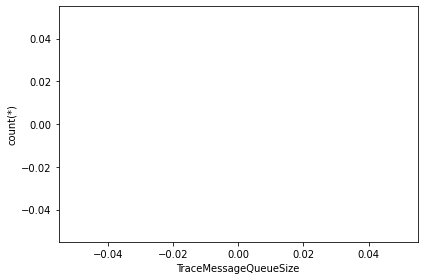

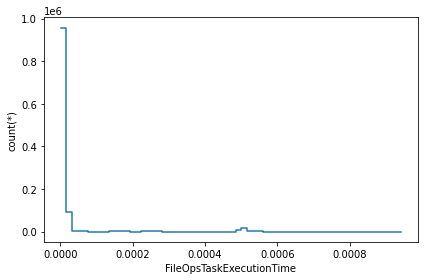

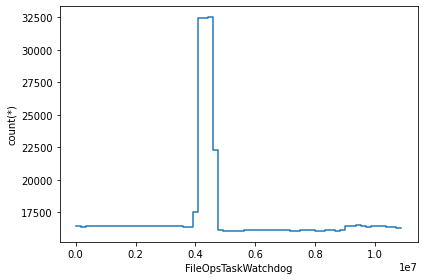

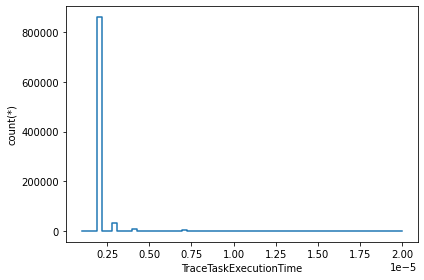

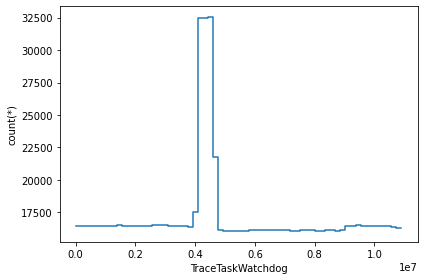

/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()


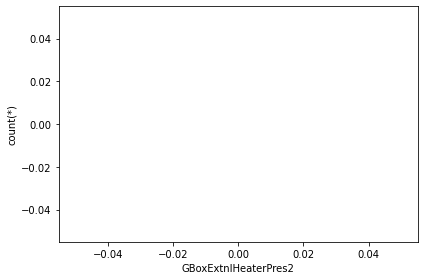

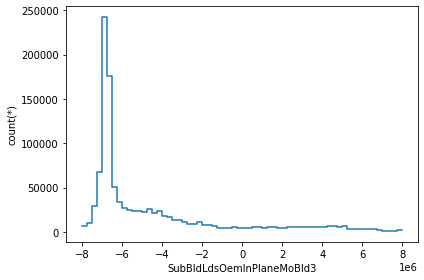

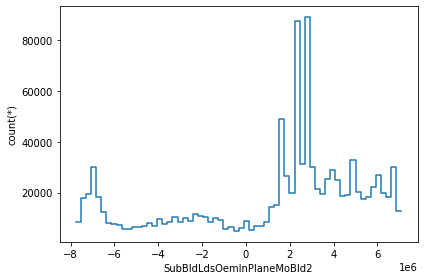

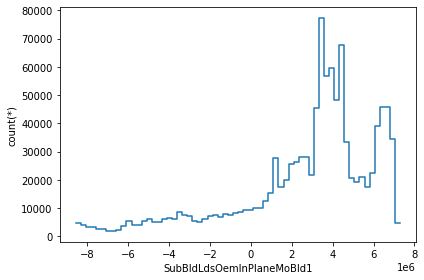

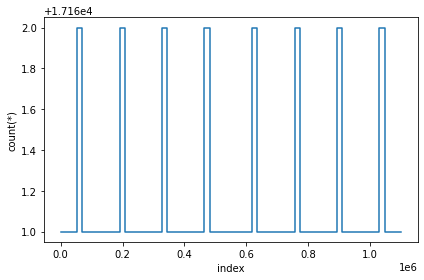

In [0]:
import matplotlib.pyplot as plt
for column in df:
    df.plot1d(df[column], label=column)
    plt.tight_layout()
    plt.show()

**Dropped columns**

These are all the dropped columns based on the graphs they produced. As mentioned above a column is dropped either if it produces a graph that does not change or if it has incorrect or non-numerical values. Dropping the columns helps with the data cleaning and noise reduction. Many drop commands were used so we can more easily keep track of the ids and correct any accidental error. They can be switched to single drop statement.

In [0]:
#dropping columns based on their graphs 1
df = df.drop(columns=['IsTrigger', 'BrakeState', 'GenState', 'RunState', 'Current3_Arms', 'Current2_Arms', 'Current1_Arms', 'SetPoint_kW',
                     'TurbineOperatingPoint_kW', 'TotalExport_kVArh', 'TotalImport_kVArh', 'TotalExport_kWh', 'TotalImport_kWh'])


In [0]:
#dropping columns based on their graphs 2
df = df.drop(columns=['CrewPresent', 'SecsOnlineLowSpeed', 'SecsIdling', 'SecsOnline', 'SoftwareVersionIDHigh', 'SoftwareVersionIDLow',
                     'SecsReleasedToRun', 'NumOfSpeedChanges', 'NumOfCableUnwinds', 'NumOfBrakeApplications', 'NumOfStopsFault', 'NumOfStopsGrid',
                     'NumOfStopsEnv', 'NumOfStopsCmd', 'NumOfStarts', 'SecsCrewAtTurb', 'SecsOnlineGrdOutOfLim', 'SecsAtRedOpSetpoint'])

In [0]:
#dropping columns based on their graphs 3
df = df.drop(columns=['TurbineStateActual', 'ChannelsVersionNumber', 'ManualPtchState','YawBrake2State', 'YawBrake1State', 'MvtrCHSystemtemp',
                     'VibVmsShock', 'CtrlrWatchdogOk', 'SsYawCableTwistCcwLimit', 'SsYawCableTwistCwLimit', 'PcsEOffSignal', 'AlmCatReqStopCount',
                     'RotorLockStateCounter', 'RotorLockState', 'SubPcsPrivCabinetClosed', 'SubPcsPrivEStop2discrete', 'SubPcsPrivEStop1discrete',
                     'SubPcsPrivEStop3discrete', 'TurbineLevelChainActivation', 'SsPwrOnReset', 'SsTurbineLevelOk', 'SsPlcTripped', 'SsYawLevelOk',
                     'SsCableTwistBypass', 'SsPrsnlLevelOk', 'SsRemoteEStop', 'SsResetSafetySystemPressed', 'PcsShortCircuit', 'SwchGearOverPwr', 'RotorOverSpeed'])

In [0]:
#dropping columns based on their graphs 4
df = df.drop(columns=['SubPcsPrivEStop1', 'SwchGearAddnlRelaySignal2', 'SwchGearAddnlRelaySignal1', 'MarineNavVisibiltyStatus',
                     'MarineNavGpsSyncAlm', 'MarineNavLampAlm1', 'MarineNavCircuitBreaker', 'MvtrCoolingLinePresState',
                     'TwrLightningProtState', 'TwrSmokeDetector', 'FogHornControl', 'UpsTwrBatteryFault', 'UpsTwrLoadOnBattery',
                     'UpsTwrLowBattery', 'UpsTwrOn', 'SubPcsPrivGebDsConEarthed'])

In [0]:
#dropping columns based on their graphs 5
df = df.drop(columns=['MvtrCoolingValveOload', 'MarineLightPanelOload', 'MvtrFanMotorOload', 'MvtrCoolingTwrFans1to2Oload',
                     'MvtrCoolingPump1Oload', 'PcsCoolingTwrFans1to5Oload', 'TwrbaseRepairModeButton', 'TwrbaseMaintenanceModeButton',
                     'TwrbaseOperatorModeButton', 'TwrbaseOwnerModeButton', 'TwrBaseResetSafetySystem', 'SubPcsPrivEOffTestLab',
                     'SubPcsPrivSChain', 'SubPcsPrivEChain', 'SubPcsPrivEStop2', 'SubPcsPrivEStop3'])

In [0]:
#dropping columns based on their graphs 6
df = df.drop(columns=['MvtrLeakageState2', 'MvtrLeakageState1', 'MvtrFanMotorAlm2', 'MvtrFanMotorAlm1', 'MvtrCoolingTwrFan3Oload',
                     'MvtrCoolingPump2Oload', 'PcsCoolingTwrFan6Oload', 'TransSwchState400vSupTo230v', 'MainsSwchState400v', 'SupOk24v',
                     'Twr24vSupOload', 'UpsOload', 'AuxtrtempMonitorOload', 'TwrDehumidifierOload','SwchGearIprOload', 'MvtrtempMonitorOload'])

In [0]:
#dropping columns based on their graphs 7
df = df.drop(columns=['Cms24vSupOk', 'Bms24vSupOk', 'NacNetworkSwch24vSupOk', 'NacPlc24vSupOk', 'MvtrCoolingTwrFan3', 'MvtrCoolingTwrFan2',
                     'MvtrCoolingTwrFan1', 'PcsCoolingTwrFan5', 'PcsCoolingTwrFan4', 'PcsCoolingTwrFan3', 'PcsCoolingTwrFan2', 'PcsCoolingTwrFan1',
                     'MvtrCoolingPumpMotor2', 'MvtrCoolingPumpMotor1', 'MvtrCoolingFan', 'SubPcsPrivDcLinkVoltage', 'VibMonitorFailure',
                     'YawCableTwistDirection', 'YawInverter2HealthState', 'YawInverter1HealthState', 'YawMotor2TempState', 'YawMotor1TempState',
                     'YawBrakingResistorState2', 'YawBrakingResistorState1', 'GenCoolingPresSwch', 'GBoxCoolingPresSwch', 'HelideckLight24vSupOk',
                     'RotorLock24vSupOk', 'HydraulicValves24vSupOk', 'WindSensor24vSupOk', 'YawCabinet24vSupOk', 'SafetyPlc24vSupOk',
                     'SubPcsPrivMaxConvReactivePwr', 'SubPcsPrivMaxConvActivePwr', 'SubPcsPrivParamValueReturn', 'SubPcsPrivAlmWordB', 'SubPcsPrivStatusWordD'])

In [0]:
#dropping columns based on their graphs 8
df = df.drop(columns=['YawInverterModeSelection1', 'YawFaultResetInverter2', 'YawFaultResetInverter1', 'RotorBrakeAppliedByArls',
                     'RotorBrakeAppliedByRlcp', 'RotorBrakeAppliedByEStop', 'CmdLinesOpenByGenSpeedRelay', 'LightBarrierSignalForTarget',
                     'HallSensorSignalForTarget', 'ProximitySensorPinHall2', 'ProximitySensorPinHall1', 'AviationLightAlm', 
                     'NacLightningProtState', 'NacSmokeDetector', 'RotorUnderSpeed', 'VibVmsSsdAlmReset', 'SubPcsPrivParamPtrWrite',
                     'SubPcsPrivControlRegisterB', 'SubPcsPrivControlRegisterA'])

In [0]:
#dropping columns based on their graphs 9
df = df.drop(columns=['SubPcsPrivReactivePwr', 'SubPcsPrivOmegaDem', 'SubPcsPrivMainRefGen1', 'SubPcsPrivCurrentDemand', 
                     'SubPcsPrivDampingTorque', 'SubPcsPrivLgLimTempModel', 'GenCoolingValveOload', 'GenCoolingWaterPump2Oload',
                     'GBoxCoolingValveOload', 'GBoxCoolingWaterPump2Oload', 'YawCCWButton', 'YawCWButton', 'Yaw90Button',
                     'NacFan2Oload', 'RotorBrakePresCharging2', 'RotorBrakePresCharging1', 'CtrlrWatchdogMonitorReset', 
                     'HelicopterApprochingBeacon', 'HtngWindSensor3', 'HtngWindSensor2', 'HtngWindSensor1', 'YawInverterModeSelection2',
                     'SubIprPrivReac', 'SubIprPrivInsReal', 'SubIprPrivS'])

In [0]:
#dropping columns based on their graphs 10
df = df.drop(columns=['SubIprPrivIn' , 'SubIprPrivIc', 'SubIprPrivIb', 'SubIprPrivIa', 'RotorBrakeApplyValve1', 'HydraulicOilHtngElement2',
                     'HydraulicOilHtngElement1', 'GenSpaceHeater2', 'GenSpaceHeater1', 'GBoxExtnlHeater', 'GBoxExtnlHtngPumpPreheater', 
                      'GBoxMainPumpPreheater4', 'GBoxMainPumpPreheater3', 'GBoxMainPumpPreheater2', 'GBoxMainPumpPreheater1', 'GBoxTankHeater1',
                     'RotorLockFullyEngagedLamp', 'RotorLockFullyReleasedLamp', 'RotorLockAlignedLamp', 'HssBrakeAppliedByRlcpLamp', 
                     'SubPtchRate2', 'SubPtchRate1', 'SubPtchPosition3', 'SubPtchPosition2', 'SubPtchPosition1', 'SubPtchCmd'])

In [0]:
#dropping columns based on their graphs 10
df = df.drop(columns=['SubIprPrivOpHours', 'SubIprPrivTransd2', 'SubIprPrivTransd1', 'SubIprPrivPwrFactor', 'RotorBrakePad3PreWorn',
                     'RotorBrakePad2Worn', 'RotorBrakePad2PreWorn', 'RotorBrakePad1Worn', 'RotorBrakePad1PreWorn', 'HpuFilterIndicator2',
                     'HpuFilterIndicator1', 'GBoxPresMFIndicator22', 'GBoxPresMFIndicator21', 'GBoxPresMFIndicator12', 'GBoxPresMFIndicator11',
                     'RotorLockApplyValve2', 'RotorLockApplyValve1', 'YawBrakeApplyValve2', 'YawBrakeApplyValve1', 'RotorBrakeApplyValve2', 'SubYaw1AlmWord1',
                     'SubPtchMinimumRateLimit', 'SubPtchMaximumRateLimit', 'SubPtchMinimumFinePtch', 'SubPtchPositiveFeatherAngle',
                     'SubPtchPositionDemand3', 'SubPtchPositionDemand2', 'SubPtchPositionDemand1', 'SubPtchRateDemand3', 'SubPtchRateDemand2',
                     'SubPtchRateDemand1', 'SubPtchActuatorType', 'SubPtchRate3', 'GenCoolingLinePresState', 'GBoxCoolingLinePresState', 
                     'GBoxOilLinePresState', 'GBoxTankOilLevelState22', 'GBoxTankOilLevelState21', 'GBoxTankOilLevelState12', 'GBoxTankOilLevelState11',
                     'RlcpHssBrakeApplyPrsnl', 'RlcpMoveCw', 'RlcpMoveCcw', 'RlcpInchingModeOn', 'RlcpRotorLockAppliedByPrsnl','AbortWtcBoot',
                     'RotorBrakePad4Worn', 'RotorBrakePad4PreWorn', 'RotorBrakePad3Worn'])
             

In [0]:
#dropping columns based on their graphs 11
df = df.drop(columns=['SubYaw2ActiveFault', 'SubYaw2AlmWord4', 'SubYaw2AlmWord3', 'SubYaw2AlmWord2', 'SubYaw2AlmWord1', 
                     'SubYaw1AlmWord4', 'SubYaw1AlmWord3', 'SubYaw1AlmWord2', 'RotorLockPinFullyReleased1', 'RotorLockPinFullyEngaged1',
                     'GBoxCoolingdiffPresSwch', 'RotorBrakePresHigh2', 'RotorBrakePresHigh1', 'RotorBrakePresLow2', 'RotorBrakePresLow1',
                     'HpuOilLevelTempState2', 'HpuOilLevelTempState1', 'HpuOilLevelState2', 'HpuOilLevelState1', 'GenLeakDetector2',
                     'GenLeakDetector1', 'GenLubricationAlm', 'PersistentDataQueueSize', 'TripLogQueueSize', 'StatsLogQueueSize',
                     'StateLogQueueSize', 'PtchLogQueueSize', 'AlmLogQueueSize', 'ChannelsUpdateQueueSize', 'TraceMessageQueueSize',
                      'GBoxExtnlHeaterPres2', 'index'])

The new number of columns. Initially they were more than 500.

In [0]:
len(df.columns)

277



The names of the columns which left after the columns dropping.

In [0]:
new_names = df.get_column_names()
new_names

['ReactivePower_kVAr',
 'Power_kW',
 'WindSpeed_mps',
 'ErrorCode',
 'YawState',
 'Volts3_Vrms',
 'Volts2_Vrms',
 'Volts1_Vrms',
 'GeneratorTemperature_DegC',
 'GearBoxTemperature_DegC',
 'Pitch_Deg',
 'RotorSpeed_rpm',
 'NacelleOrientation_Deg',
 'AmbTemp_DegC',
 'Frequency_Hz',
 'NumOfYawOperations',
 'TShortVibNacSideSideAcc',
 'AmbTemp',
 'RotorSpeedFromPos',
 'RotorSpeedAve',
 'MaxTimeForTimesliceOne',
 'CtrlrActualCallPeriodMovAve',
 'MinCtrlrActualCallPeriod',
 'MaxCtrlrActualCallPeriod',
 'MaxTimeForWriteSviInterface',
 'MaxTimeForReadSviInterface',
 'MaxActualWTCCycleTime',
 'MaxCtrlrTimeUsage',
 'YawRate',
 'OriginatingAlmIdea',
 'NoOfActiveAlarms',
 'ActiveAlarm1',
 'ActiveAlarm2',
 'ActiveAlarm3',
 'ActiveAlarm4',
 'ActiveAlarm5',
 'ActiveAlarm6',
 'ActiveAlarm7',
 'ActiveAlarm8',
 'ActiveAlarm9',
 'ActiveAlarm10',
 'ActiveAlarm11',
 'ActiveAlarm12',
 'ActiveAlarm13',
 'ActiveAlarm14',
 'ActiveAlarm15',
 'YawStateCounter',
 'YawState_1',
 'CtrlrStateCounter',
 'CtrlrState',

Describing the data per column.

In [0]:
df.describe()

ReactivePower_kVAr  ... SubBldLdsOemInPlaneMoBld1
dtype            float64  ...                   float64
count            1101258  ...                   1101258
NA                    29  ...                        29
mean    907.709775547601  ...         2679503.062168314
std              34.4941  ...               3.43242e+06
min                  -86  ...              -8.98529e+06
max                 1957  ...               7.60301e+06

[7 rows x 277 columns]

**Data Scaling**

The data is scaled so all of the existing columns have values in a normalized range. The new scaled data is saved in a new data frame so the inital data is preserved.

In [0]:
import vaex.ml
import numpy as np
scaler = vaex.ml.StandardScaler(features=new_names)
scaler.fit(df)
scaled_df = scaler.transform(df)


The scaler method preserves the old values and add the new scaled values with a prefix 'standard_scaled'. For this reason the orignal values are dropped from the new data frame.

In [0]:
for column in scaled_df:
    if 'standard_scaled' not in column:
        scaled_df=scaled_df.drop(column)

Displaying the new scaled data frame.

In [0]:
scaled_df

<string>:1: RuntimeWarning: invalid value encountered in true_divide


#          standard_scaled_ReactivePower_kVAr    standard_scaled_Power_kW    standard_scaled_WindSpeed_mps    standard_scaled_ErrorCode    standard_scaled_YawState    standard_scaled_Volts3_Vrms    standard_scaled_Volts2_Vrms    standard_scaled_Volts1_Vrms    standard_scaled_GeneratorTemperature_DegC    standard_scaled_GearBoxTemperature_DegC    standard_scaled_Pitch_Deg    standard_scaled_RotorSpeed_rpm    standard_scaled_NacelleOrientation_Deg    standard_scaled_AmbTemp_DegC    standard_scaled_Frequency_Hz    standard_scaled_NumOfYawOperations    standard_scaled_TShortVibNacSideSideAcc    standard_scaled_AmbTemp    standard_scaled_RotorSpeedFromPos    standard_scaled_RotorSpeedAve    standard_scaled_MaxTimeForTimesliceOne    standard_scaled_CtrlrActualCallPeriodMovAve    standard_scaled_MinCtrlrActualCallPeriod    standard_scaled_MaxCtrlrActualCallPeriod    standard_scaled_MaxTimeForWriteSviInterface    standard_scaled_MaxTimeForReadSviInterface    standard_scaled_MaxActualWTCCycleTime    standard_scaled_MaxCtrlrTimeUsage    standard_scaled_YawRate    standard_scaled_OriginatingAlmIdea    standard_scaled_NoOfActiveAlarms    standard_scaled_ActiveAlarm1    standard_scaled_ActiveAlarm2    standard_scaled_ActiveAlarm3    standard_scaled_ActiveAlarm4    standard_scaled_ActiveAlarm5    standard_scaled_ActiveAlarm6    standard_scaled_ActiveAlarm7    standard_scaled_ActiveAlarm8    standard_scaled_ActiveAlarm9    standard_scaled_ActiveAlarm10    standard_scaled_ActiveAlarm11    standard_scaled_ActiveAlarm12    standard_scaled_ActiveAlarm13    standard_scaled_ActiveAlarm14    standard_scaled_ActiveAlarm15    standard_scaled_YawStateCounter    standard_scaled_YawState_1    standard_scaled_CtrlrStateCounter    standard_scaled_CtrlrState    standard_scaled_HighestActiveAlmId    standard_scaled_HighestActiveAlm    standard_scaled_AverageMeasuredPtchRate3    standard_scaled_AverageMeasuredPtchRate2    standard_scaled_AverageMeasuredPtchRate1    standard_scaled_AverageMeasuredPtchAngle3    standard_scaled_AverageMeasuredPtchAngle2    standard_scaled_AverageMeasuredPtchAngle1    standard_scaled_TMedVibNacForeAftAcc    standard_scaled_TMedVibNacSideSideAcc    standard_scaled_TShortVibGBoxAcc    standard_scaled_TShortVibNacForeAftAcc    standard_scaled_NacPosition1    standard_scaled_ActiveAlarm16    standard_scaled_ActiveAlarm17    standard_scaled_ActiveAlarm18    standard_scaled_ActiveAlarm19    standard_scaled_ActiveAlarm20    standard_scaled_ActiveAlarm21    standard_scaled_ActiveAlarm22    standard_scaled_ActiveAlarm23    standard_scaled_ActiveAlarm24    standard_scaled_ActiveAlarm25    standard_scaled_ActiveAlarm26    standard_scaled_ActiveAlarm27    standard_scaled_ActiveAlarm28    standard_scaled_ActiveAlarm29    standard_scaled_ActiveAlarm30    standard_scaled_ManualPtchStateCounter    standard_scaled_SubPtchPrivStateCounter    standard_scaled_SubPtchPrivState    standard_scaled_SubPcsPrivStateCounter    standard_scaled_SubPcsPrivState    standard_scaled_YawBrake2StateCounter    standard_scaled_YawBrake1StateCounter    standard_scaled_YawDrive2StateCounter    standard_scaled_YawDrive2State    standard_scaled_YawDrive1StateCounter    standard_scaled_YawDrive1State    standard_scaled_YawDriveStateCounter    standard_scaled_YawDriveState    standard_scaled_TwrInsidetemp    standard_scaled_MvtrCHLinePres    standard_scaled_AuxConsumptionApparentPwr    standard_scaled_AuxConsumptionReactivePwr    standard_scaled_AuxConsumptionActivePwr    standard_scaled_MeasuredYawError    standard_scaled_YawError3    standard_scaled_YawError2    standard_scaled_YawError1    standard_scaled_WindSpeed3    standard_scaled_WindSpeed2    standard_scaled_WindSpeed1    standard_scaled_RotorPosition    standard_scaled_GenPosition    standard_scaled_NacPosition2    standard_scaled_AlmCatNormalCount    standard_scaled_AlmCatPtchFatalErrorCount    standard_scaled_AlmCatPtchManualResetCount    standard_scaled_AlmCatPtchCriticalErrorCount    standard_scaled_AlmCatI

**Plotting the new scaled data**

The scaled values are plotted. They reveal that a lot of the columns have very similar data distribution which means that they could be correlated and potentially merged into a single column which contains their mean value. Also, threshold values can be easily identified in some graphs. This step is not executed because the importance of the columns is currently unknown. We do not have the graphs due to their amount but if the command below is run they can be seen.

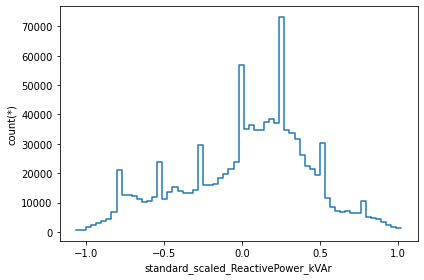

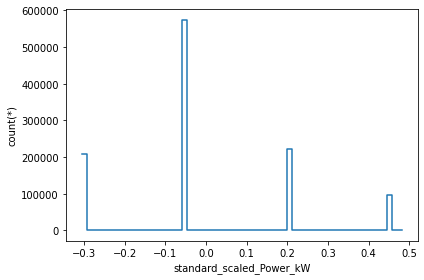

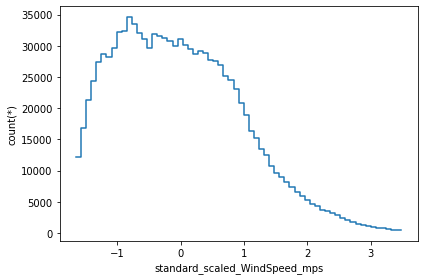

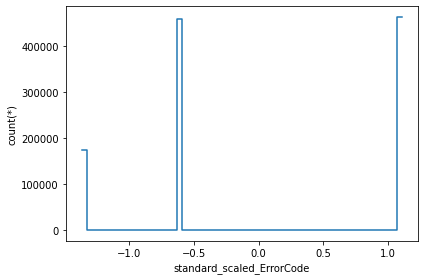

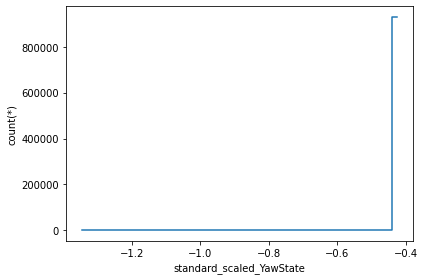

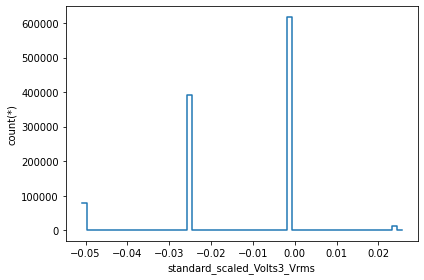

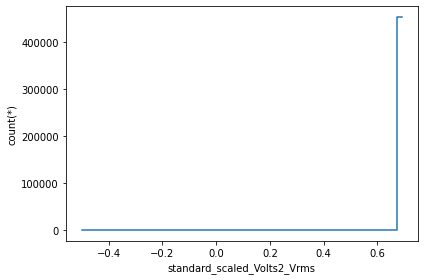

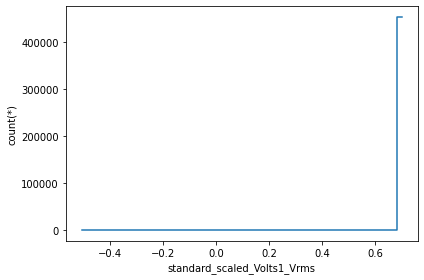

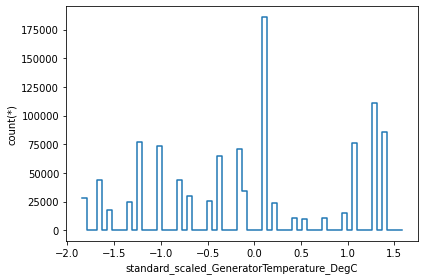

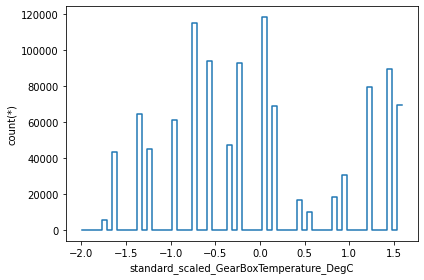

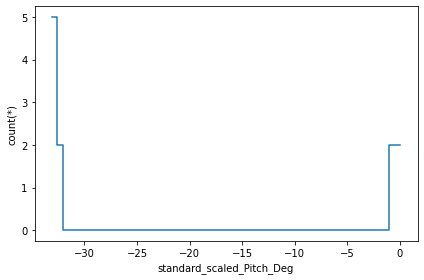

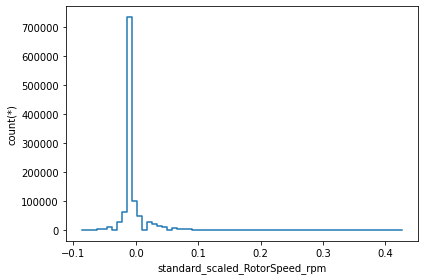

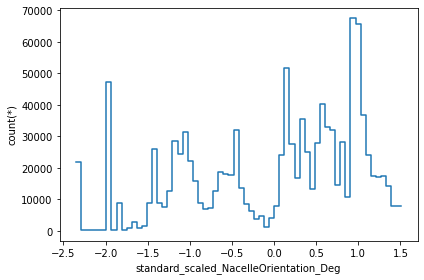

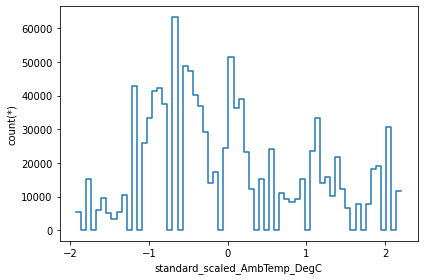

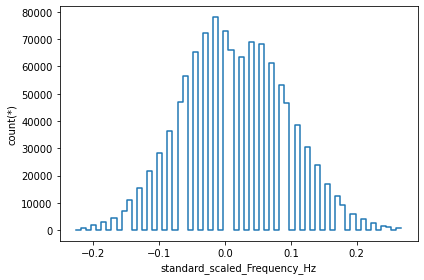

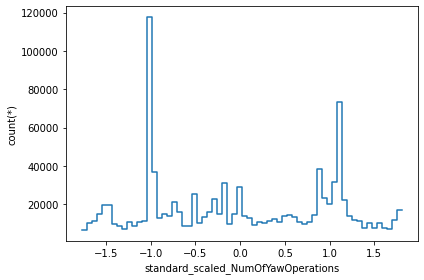

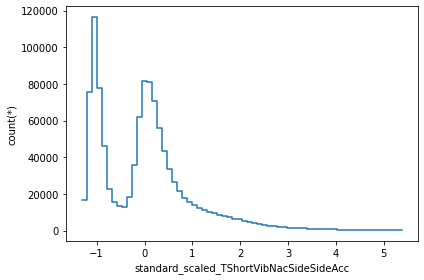

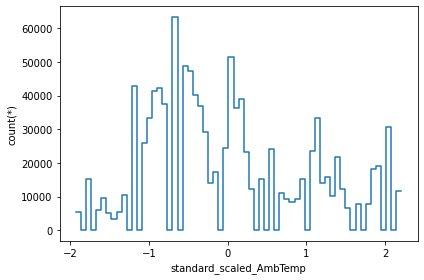

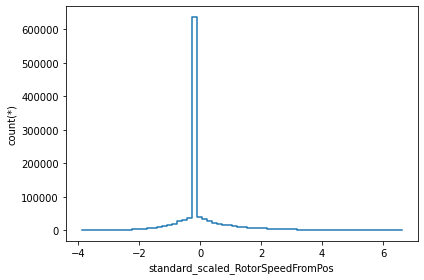

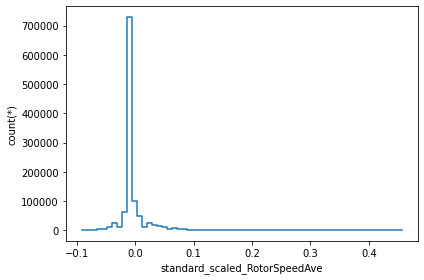

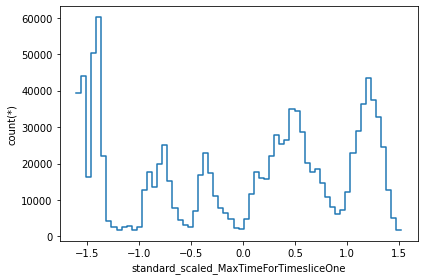

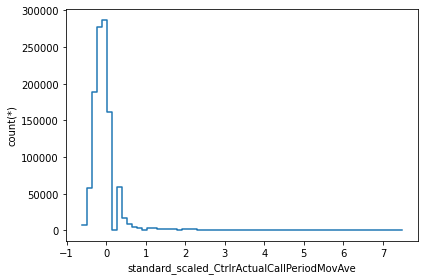

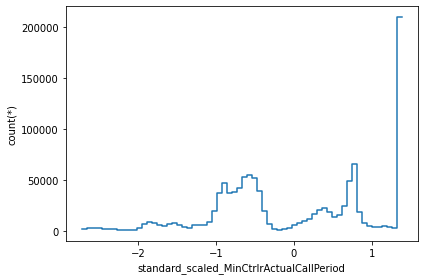

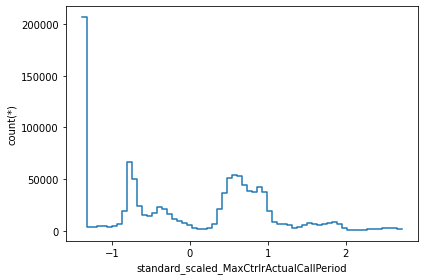

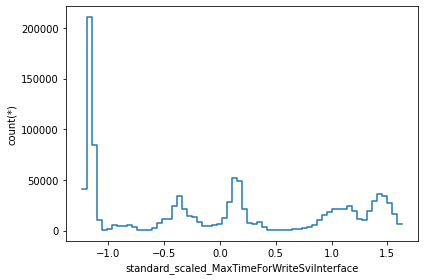

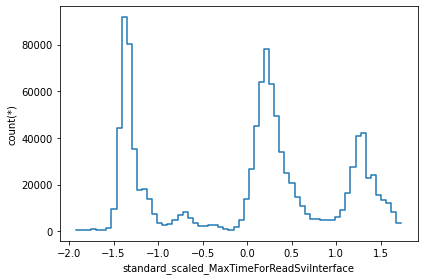

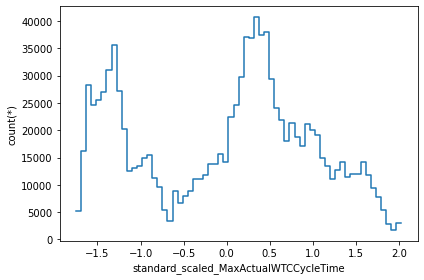

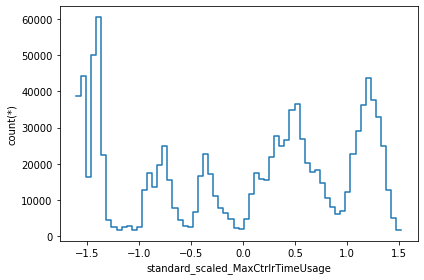

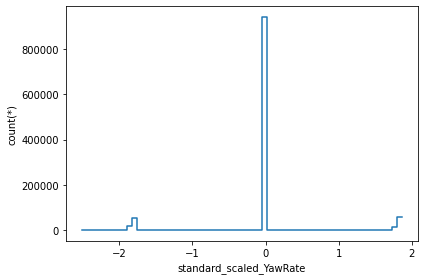

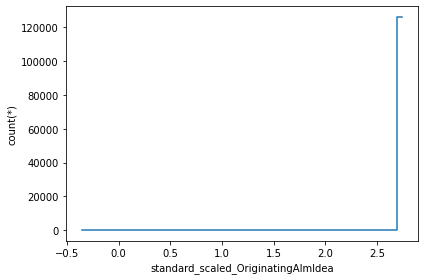

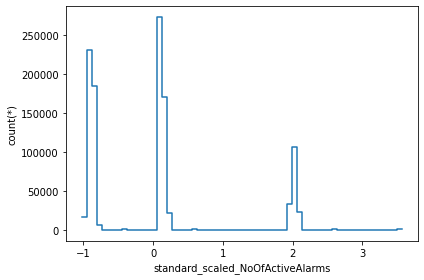

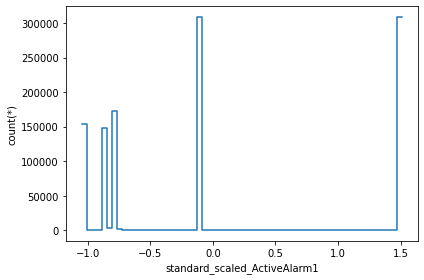

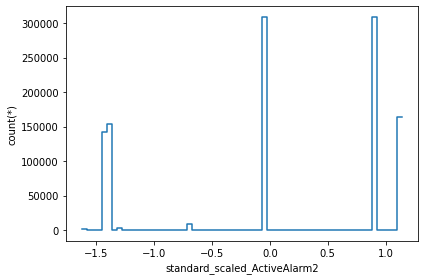

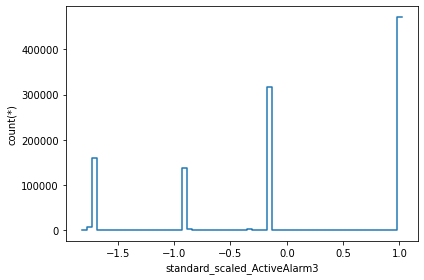

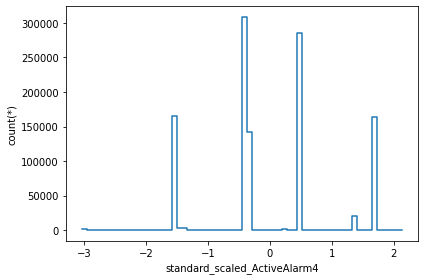

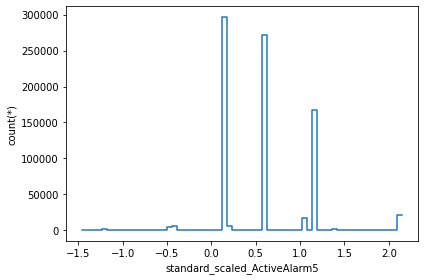

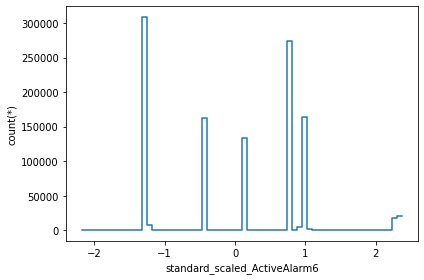

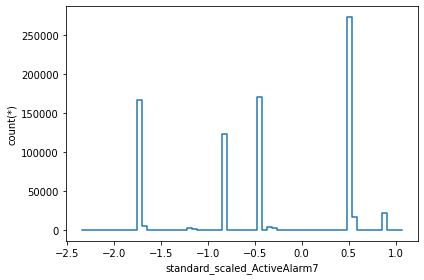

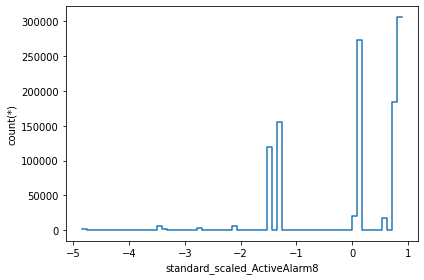

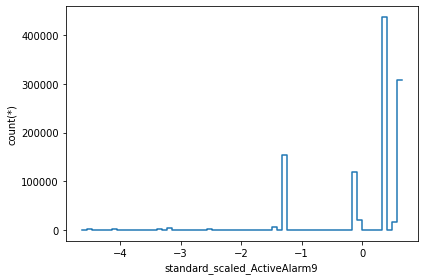

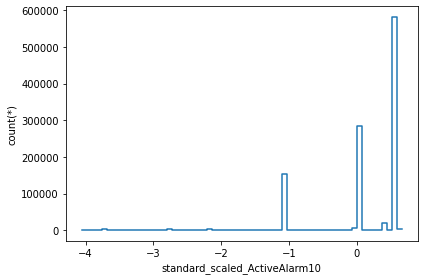

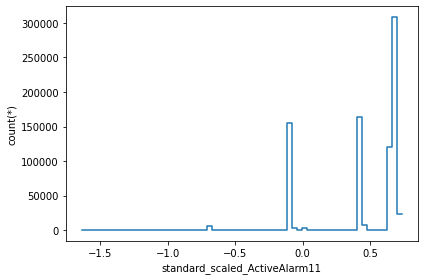

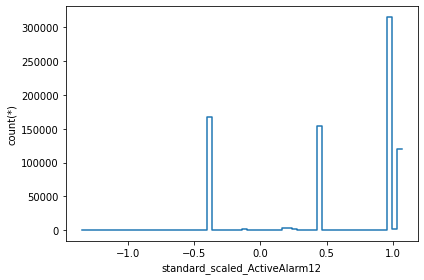

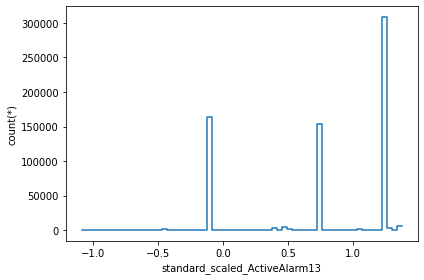

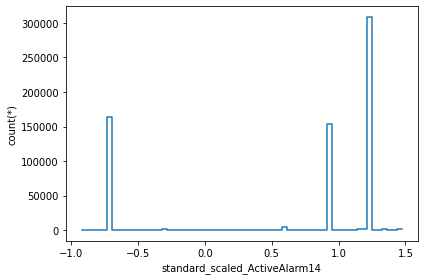

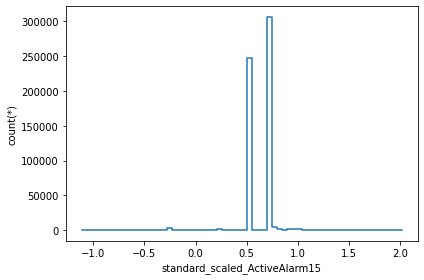

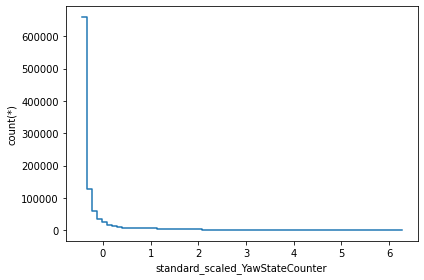

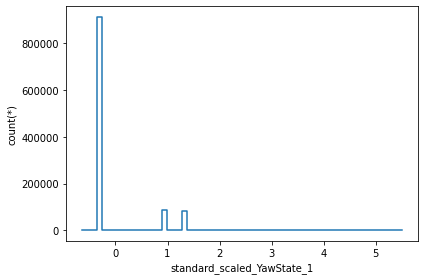

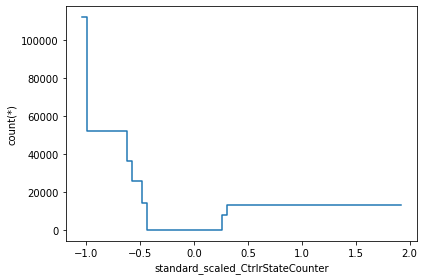

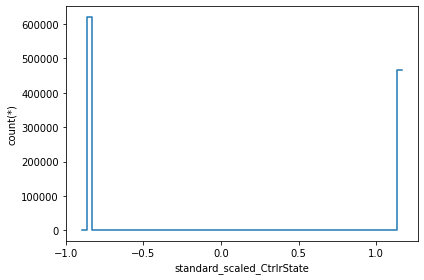

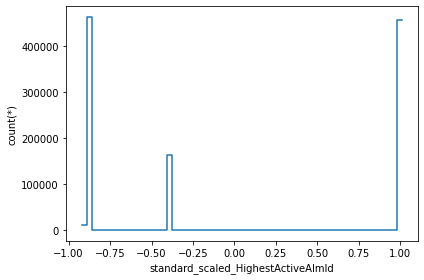

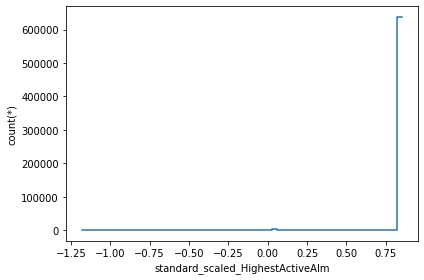

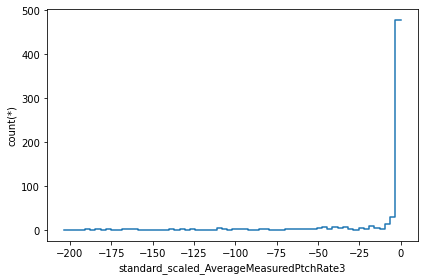

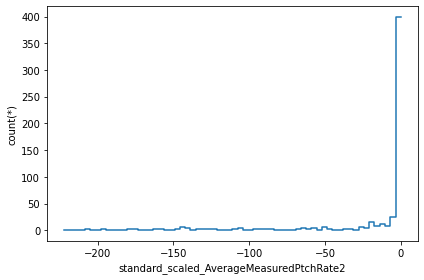

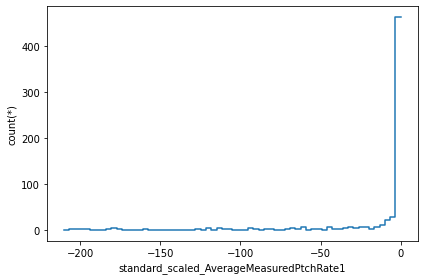

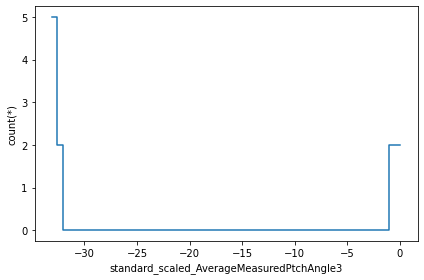

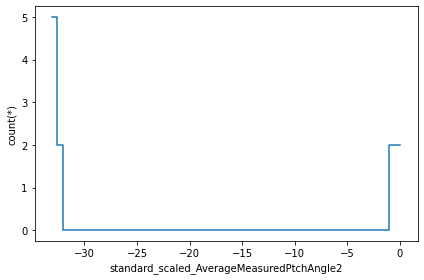

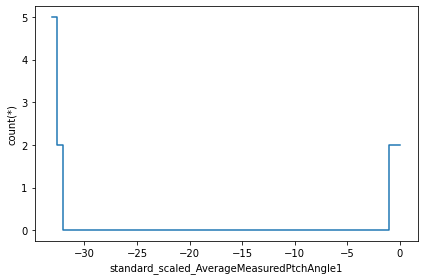

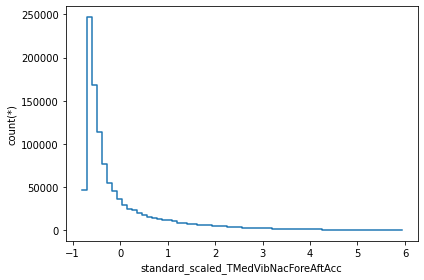

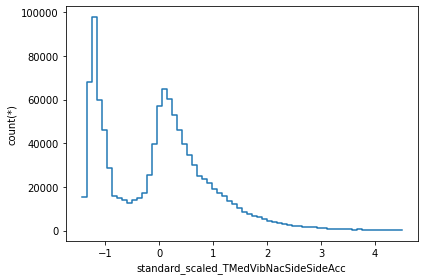

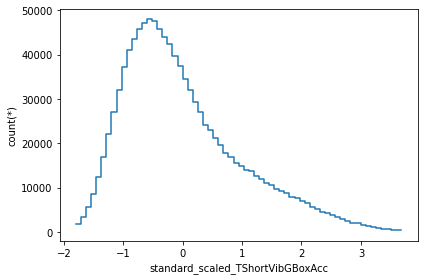

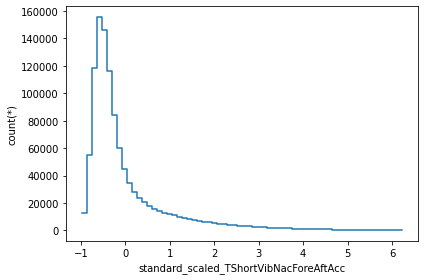

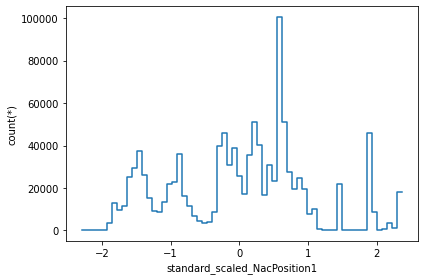

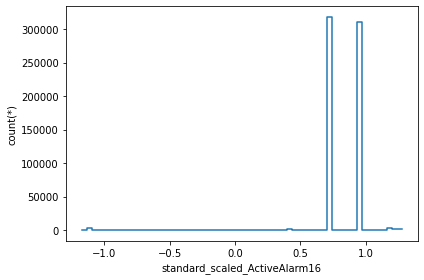

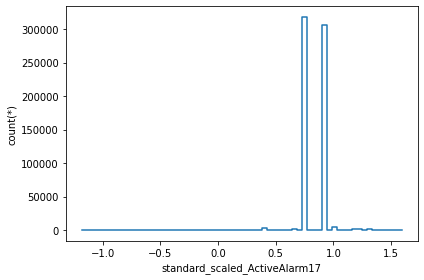

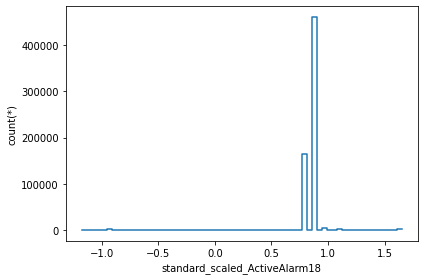

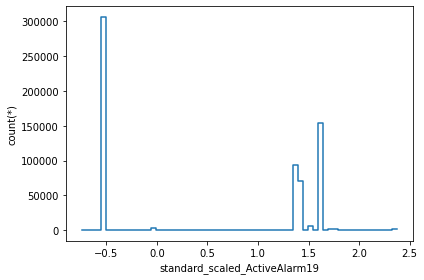

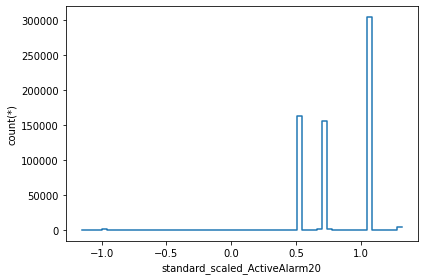

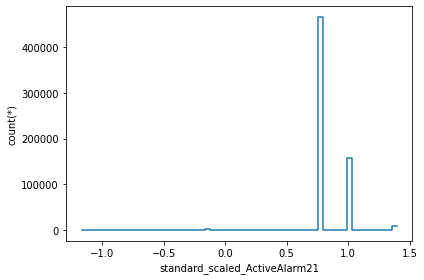

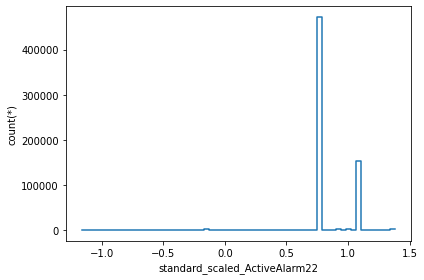

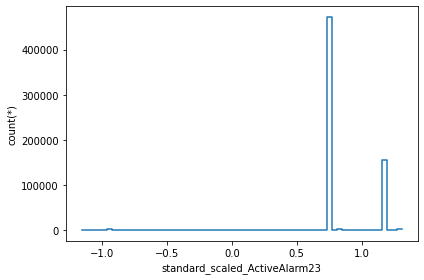

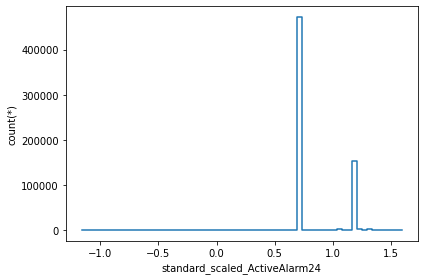

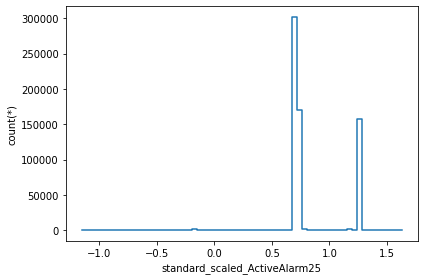

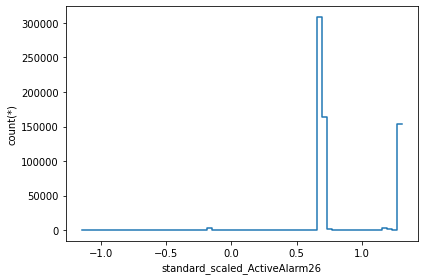

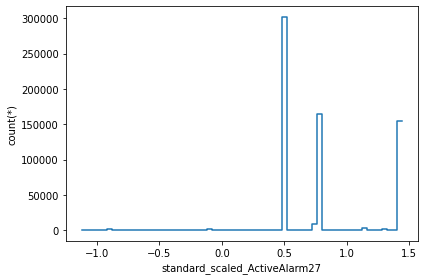

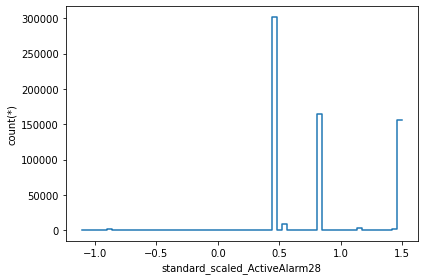

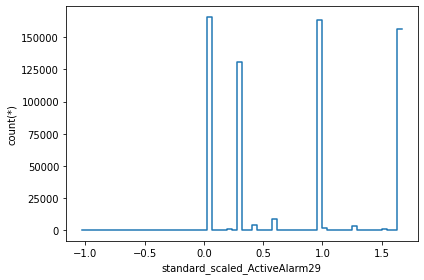

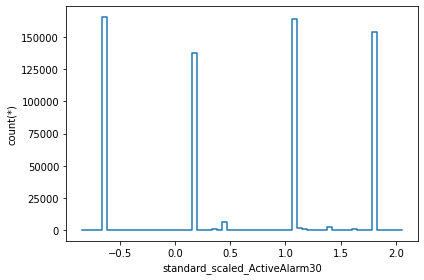

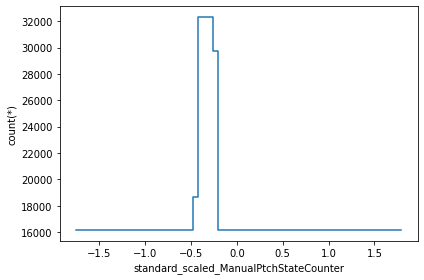

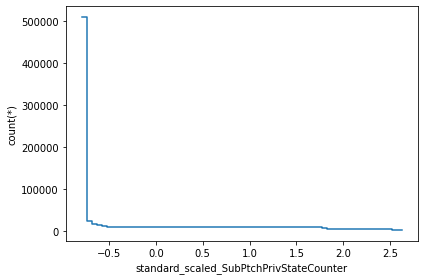

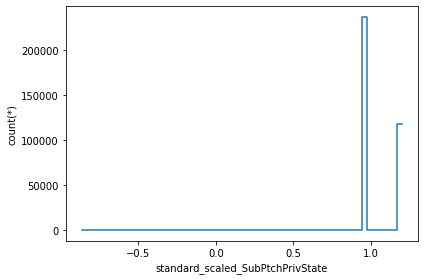

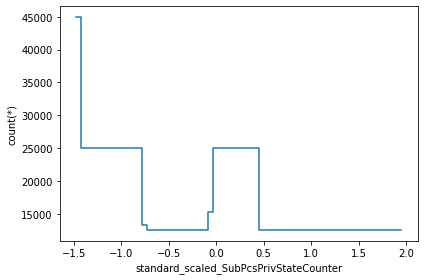

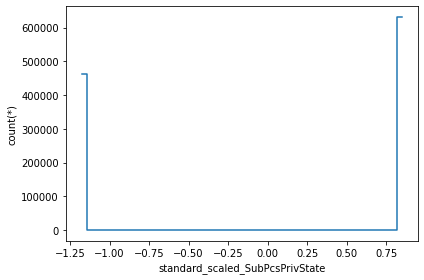

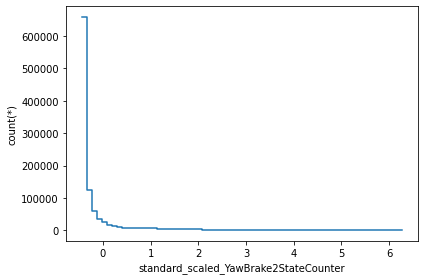

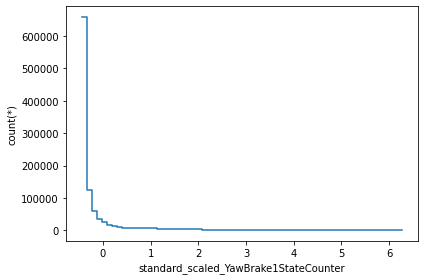

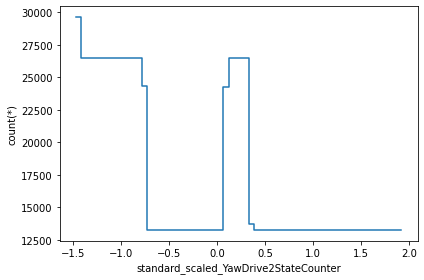

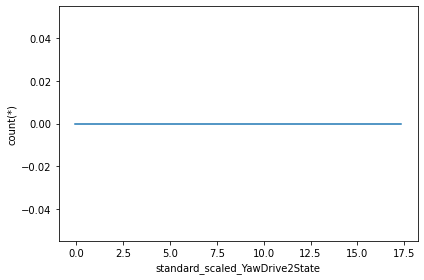

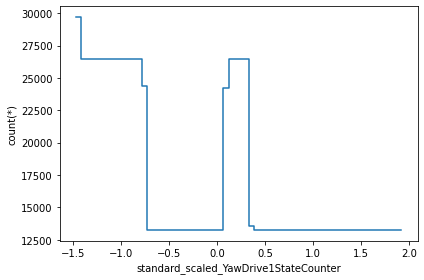

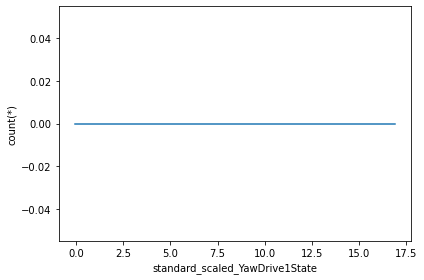

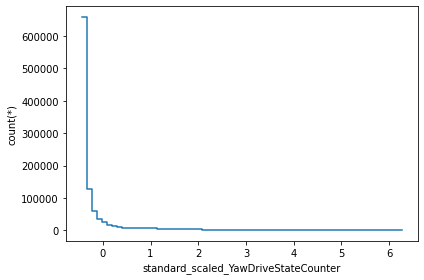

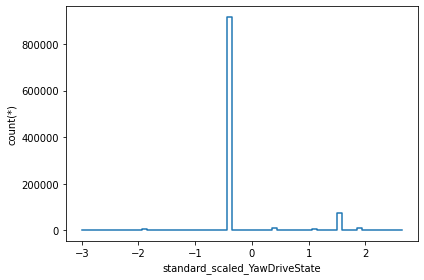

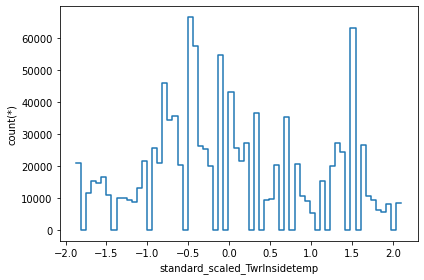

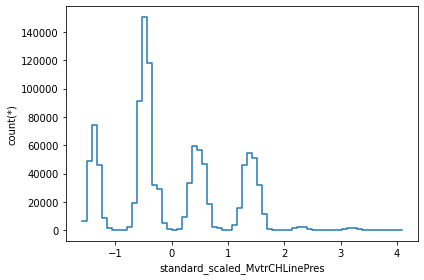

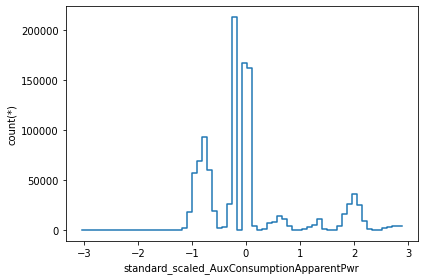

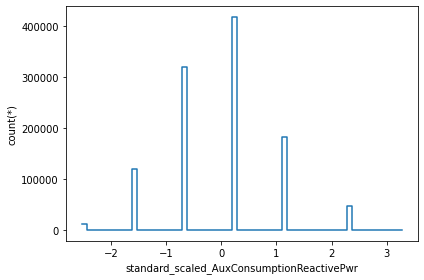

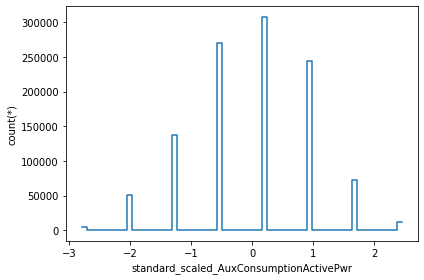

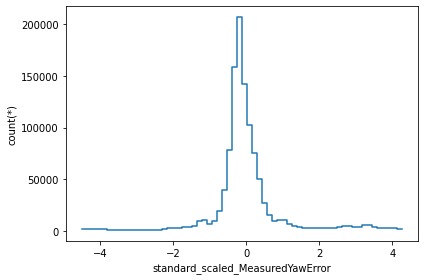

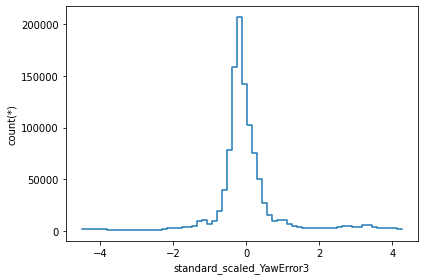

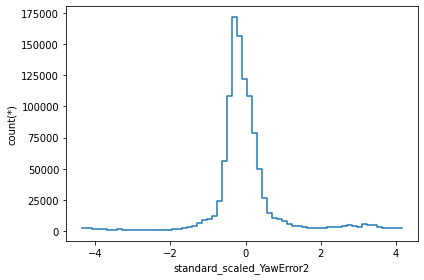

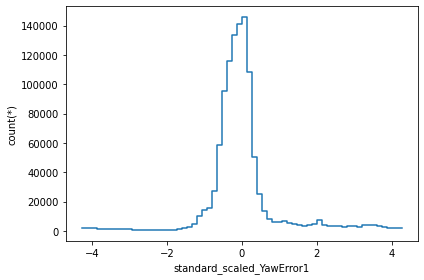

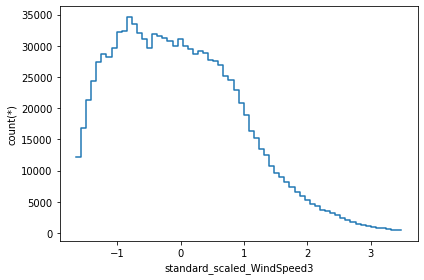

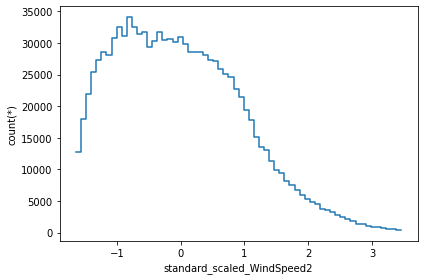

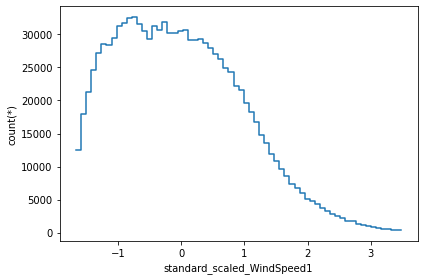

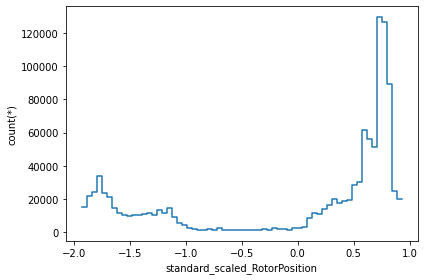

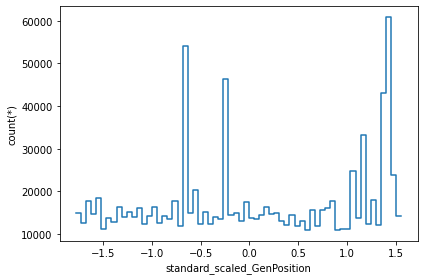

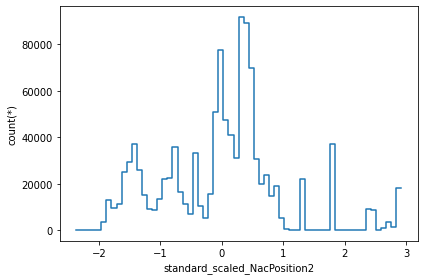

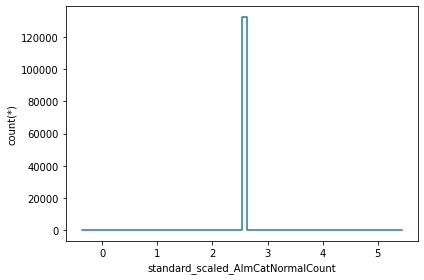

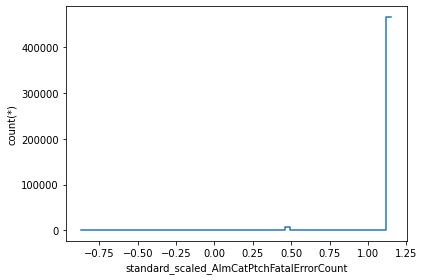

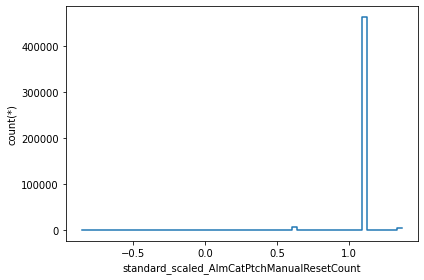

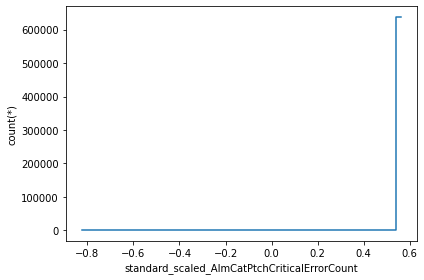

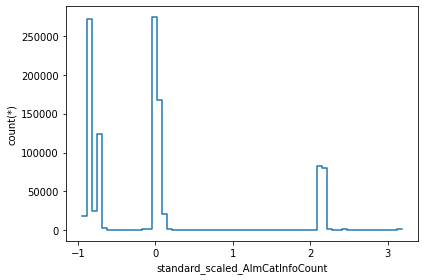

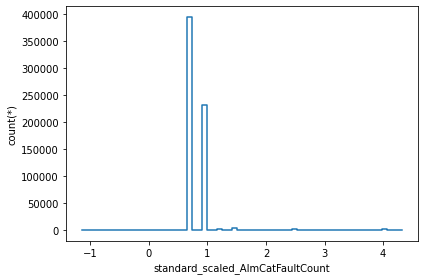

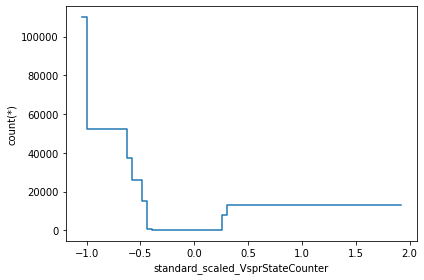

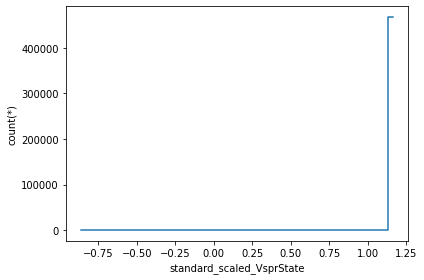

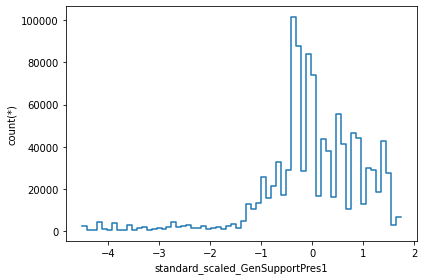

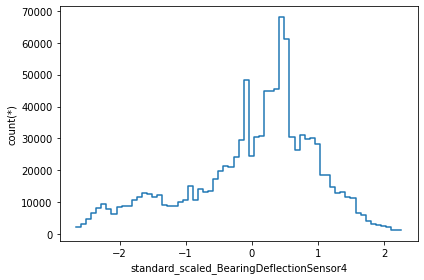

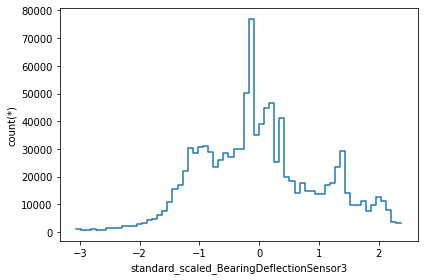

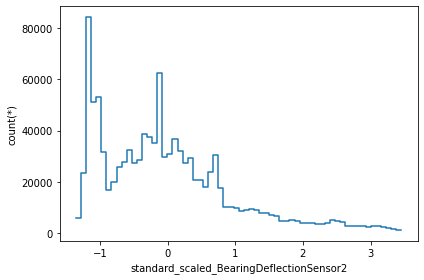

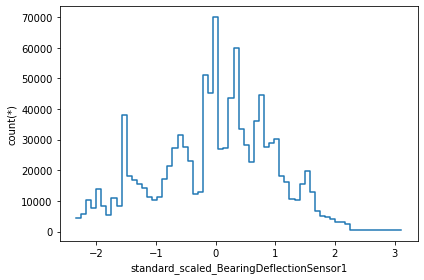

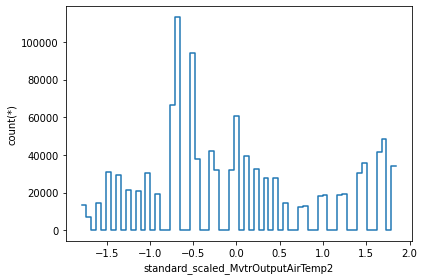

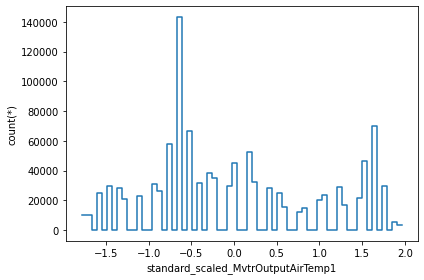

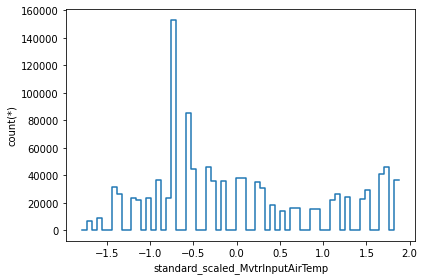

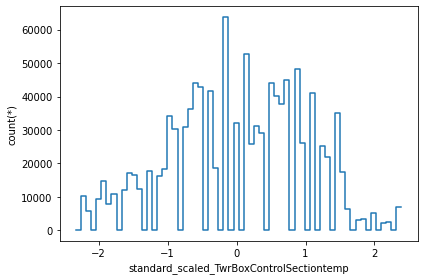

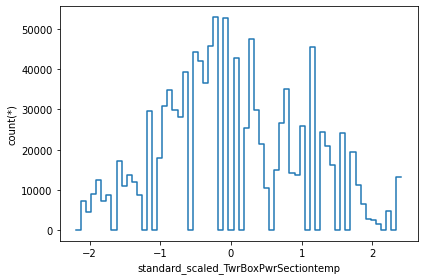

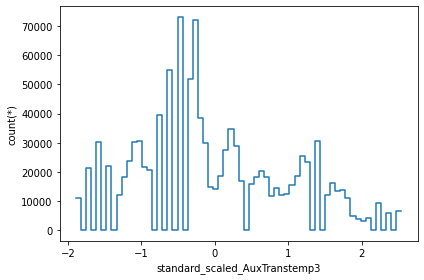

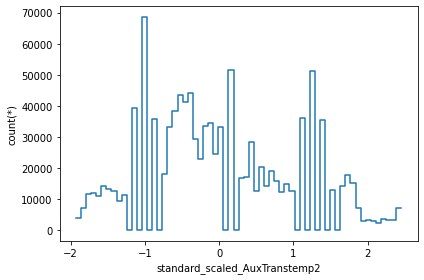

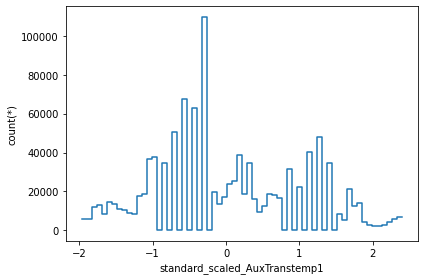

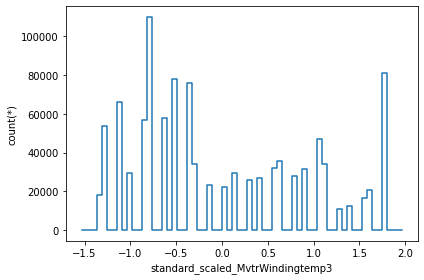

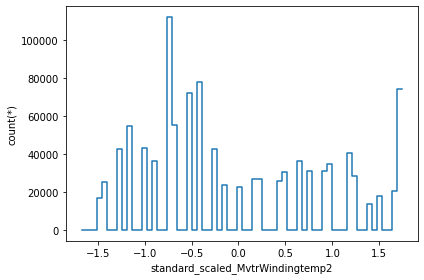

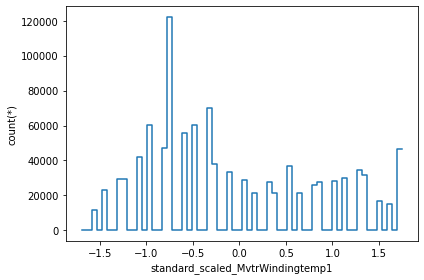

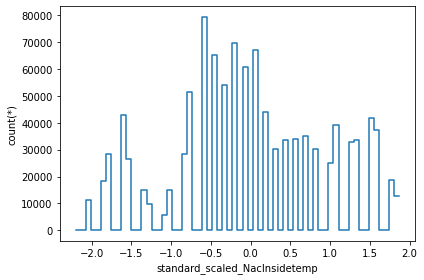

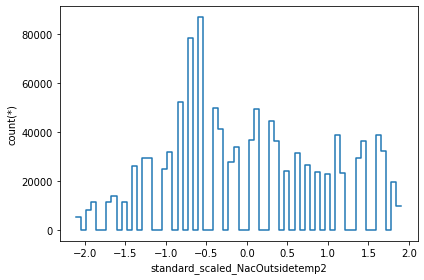

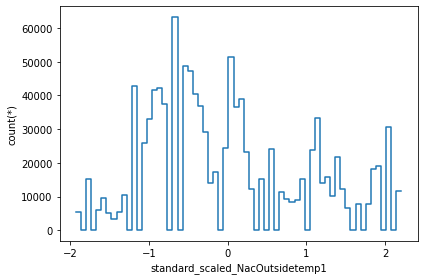

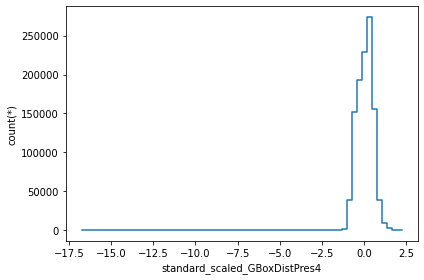

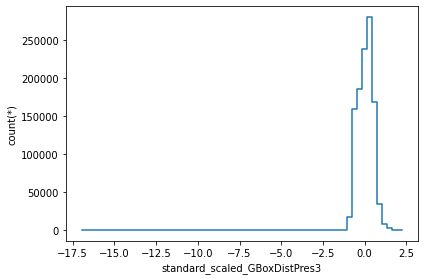

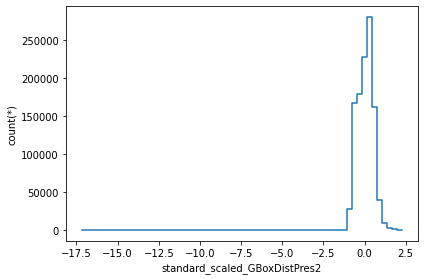

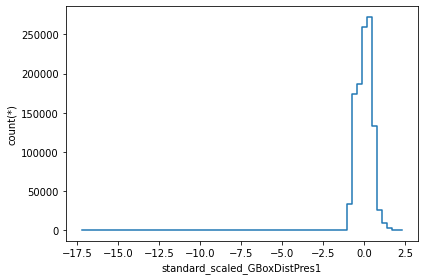

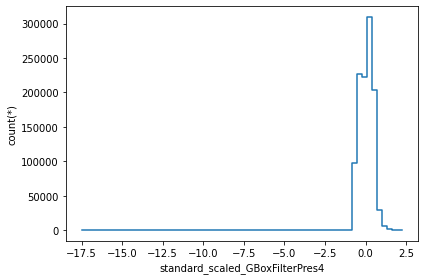

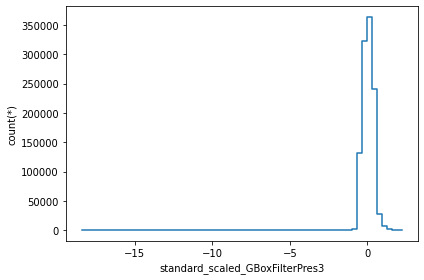

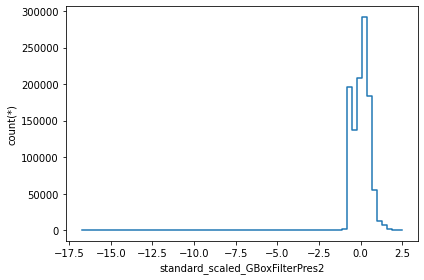

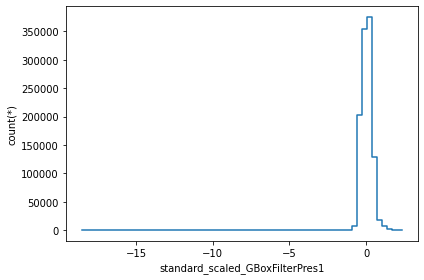

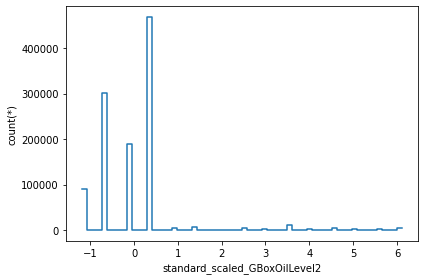

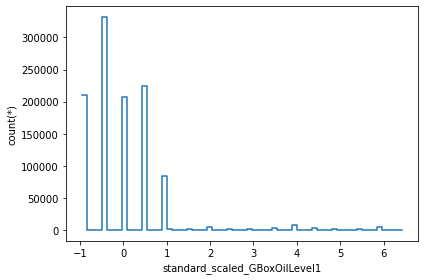

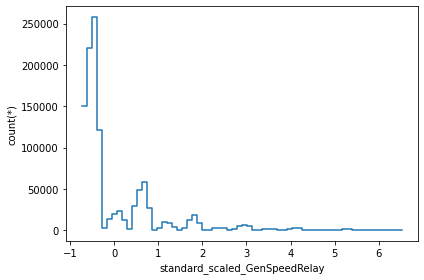

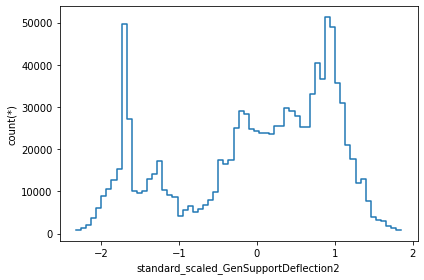

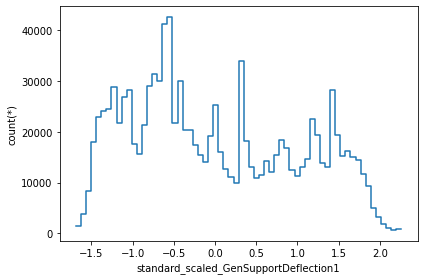

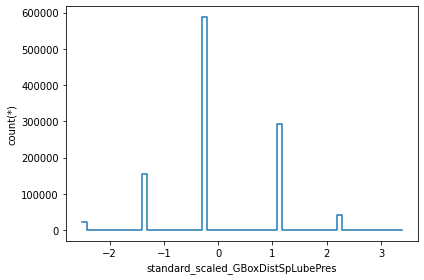

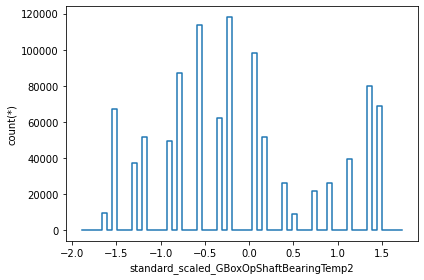

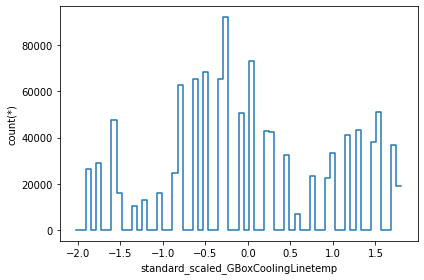

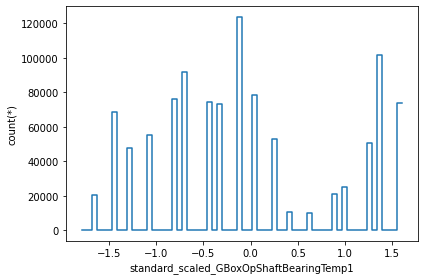

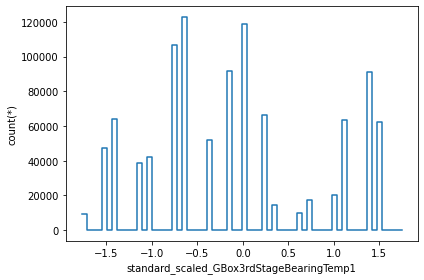

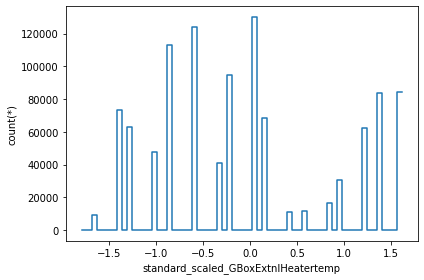

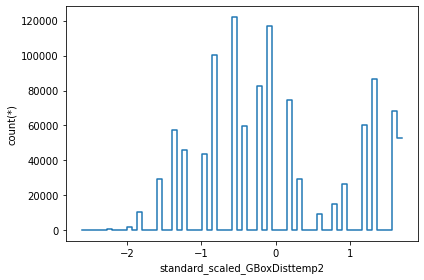

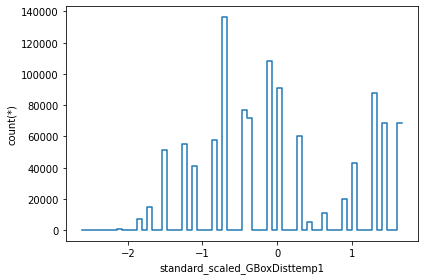

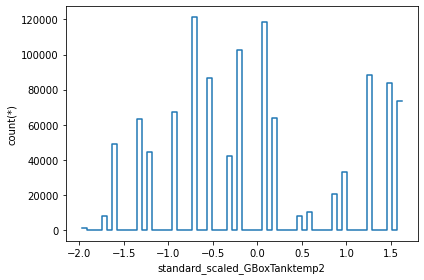

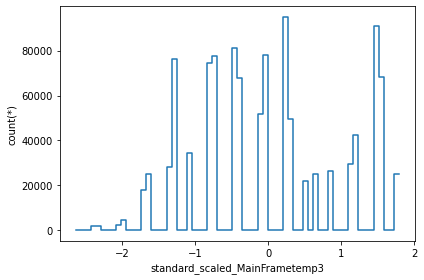

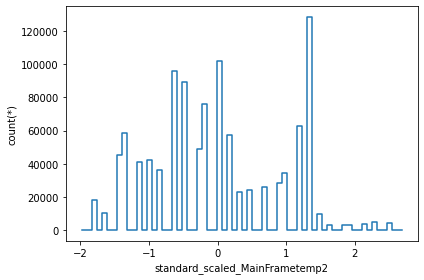

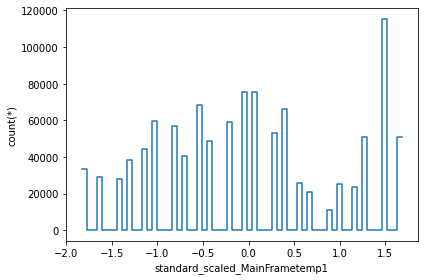

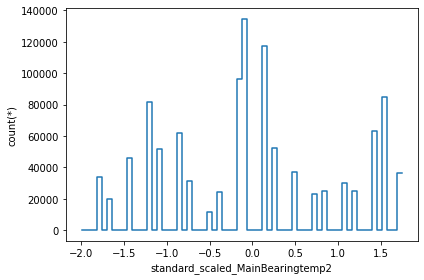

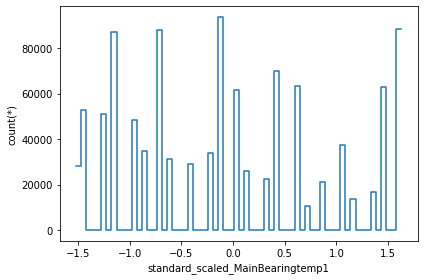

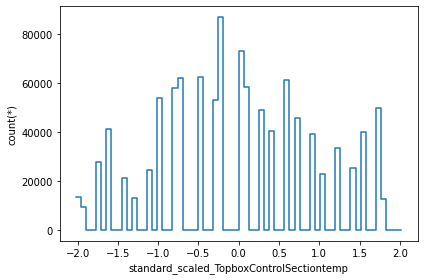

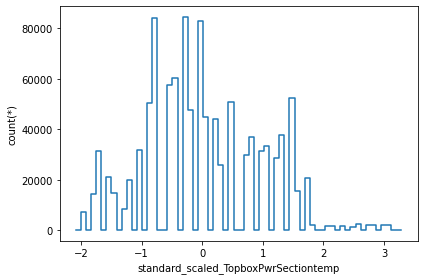

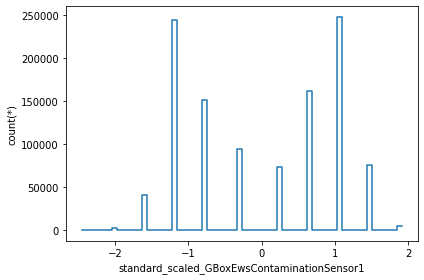

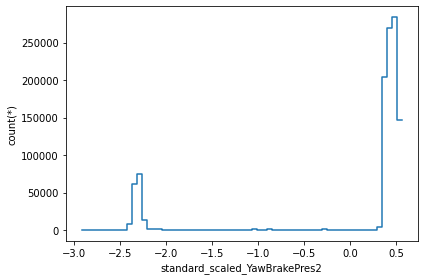

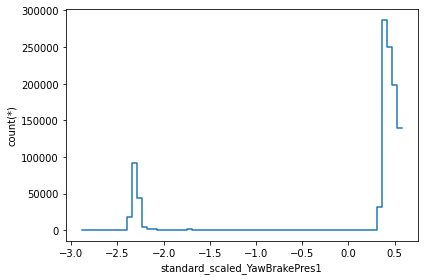

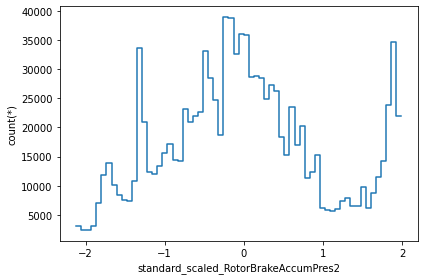

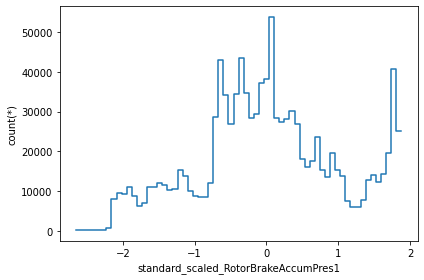

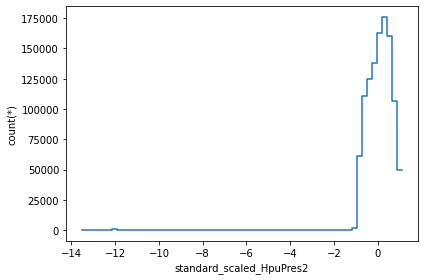

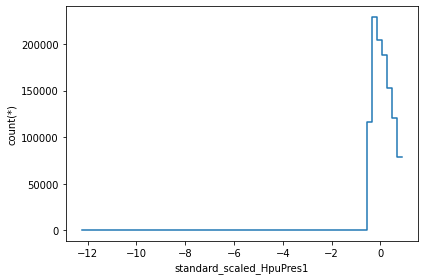

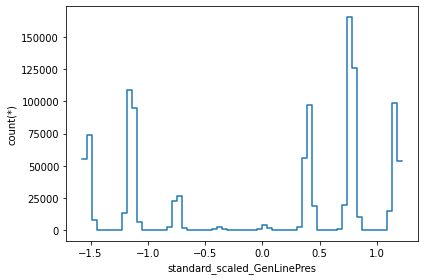

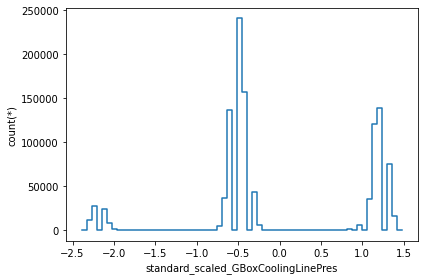

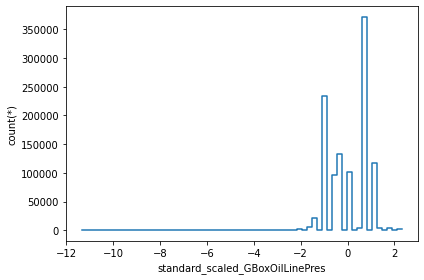

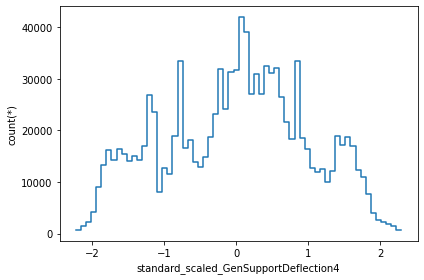

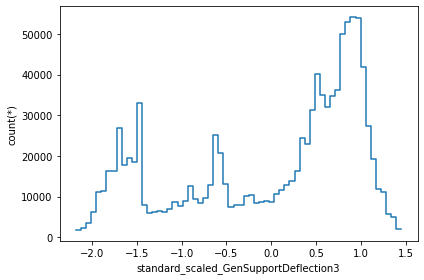

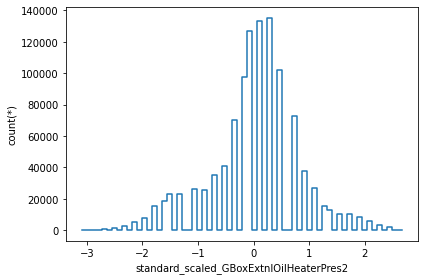

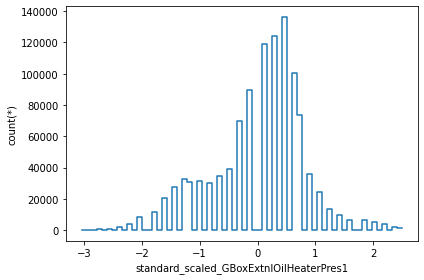

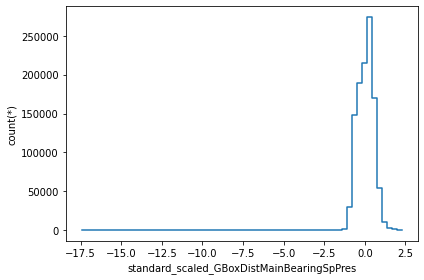

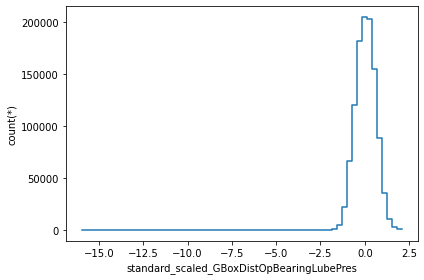

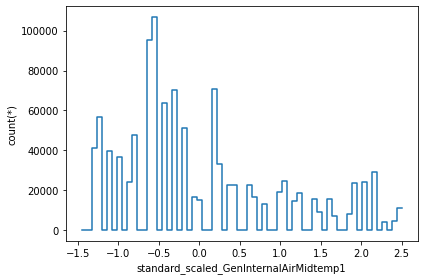

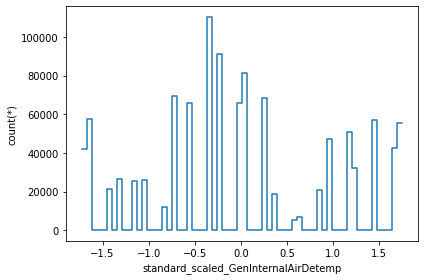

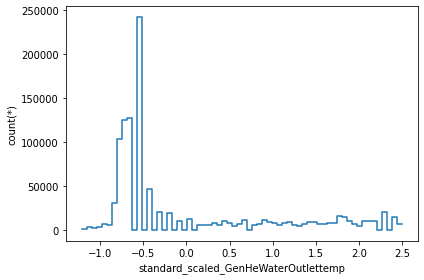

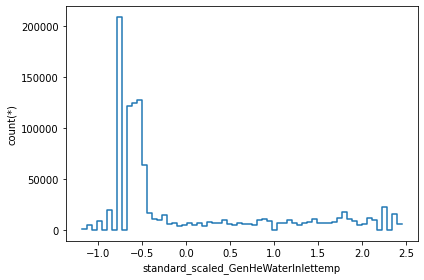

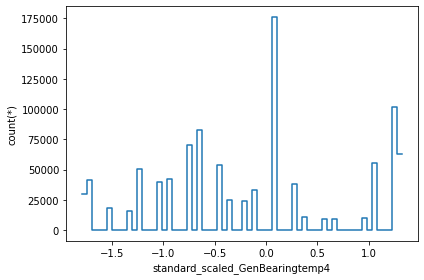

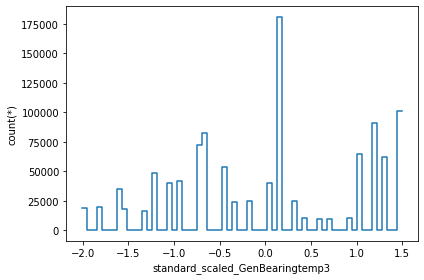

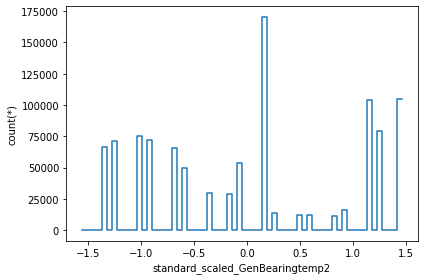

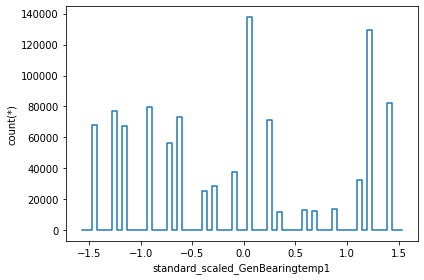

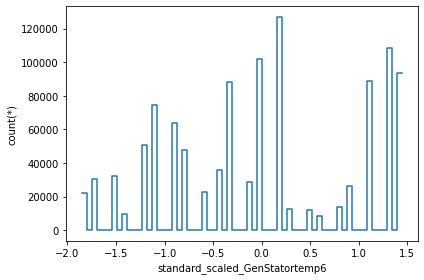

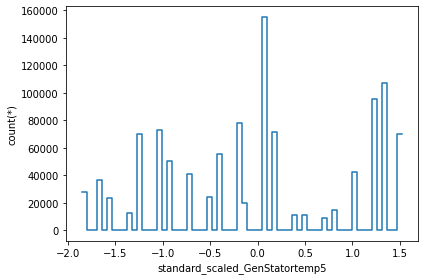

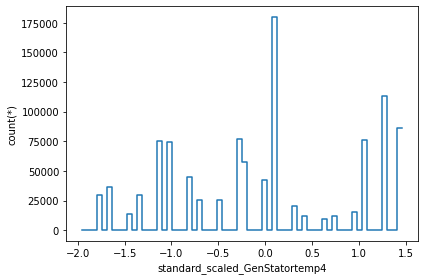

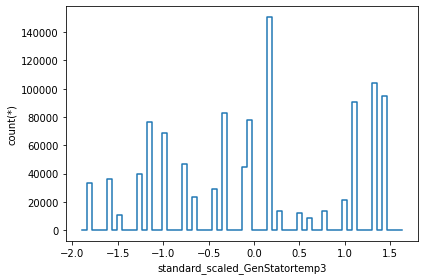

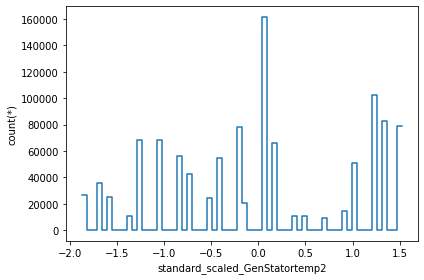

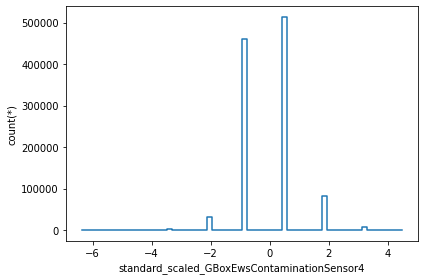

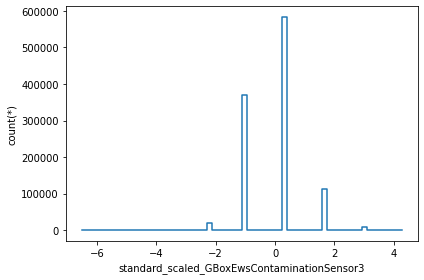

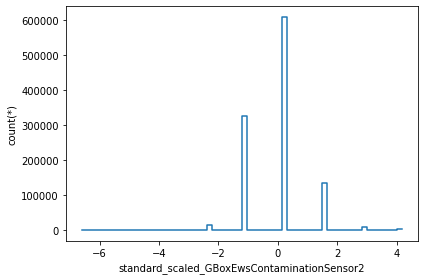

<string>:1: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start


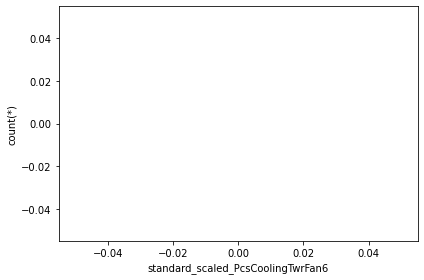

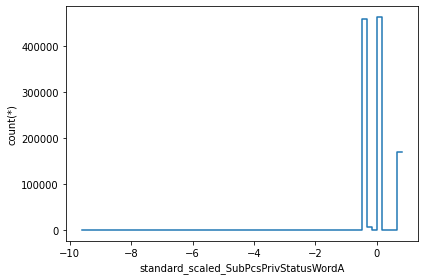

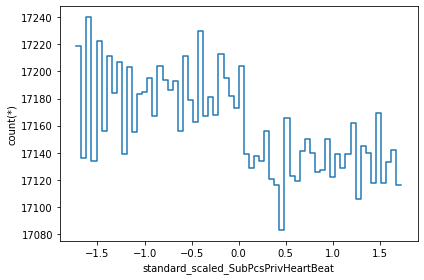

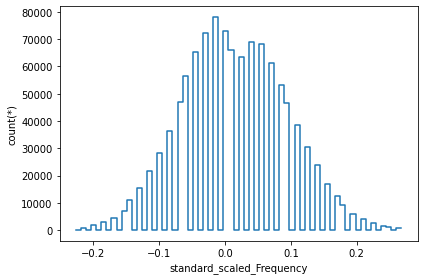

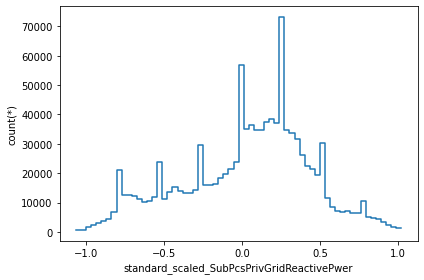

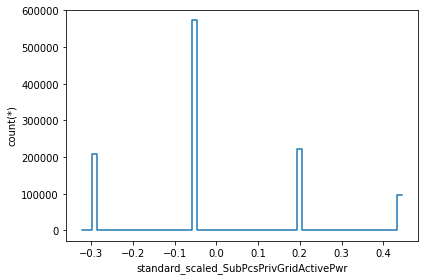

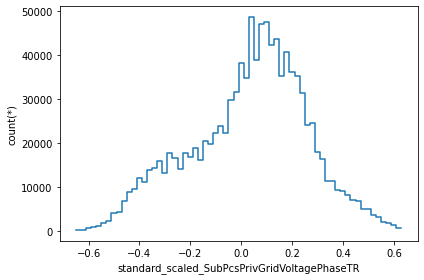

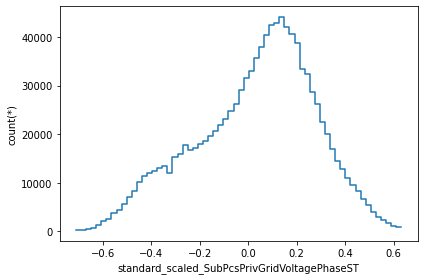

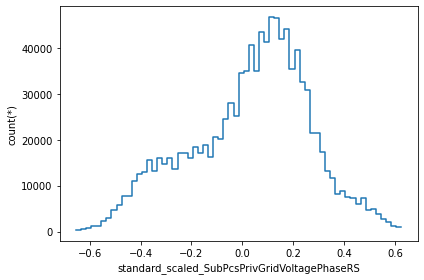

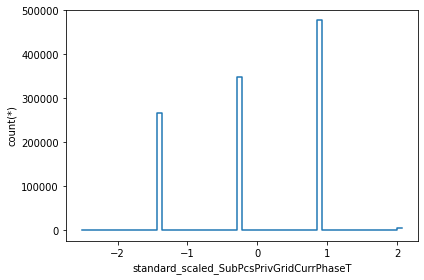

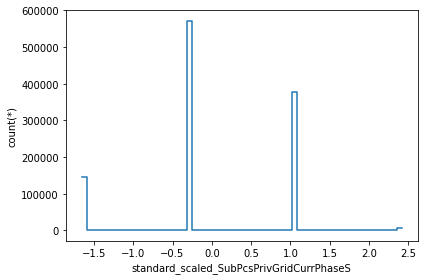

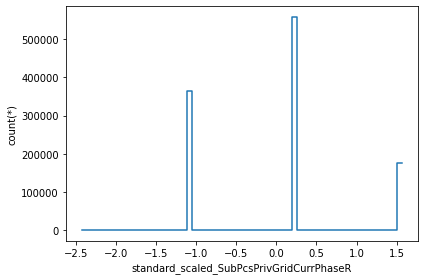

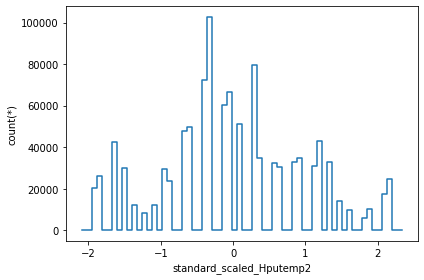

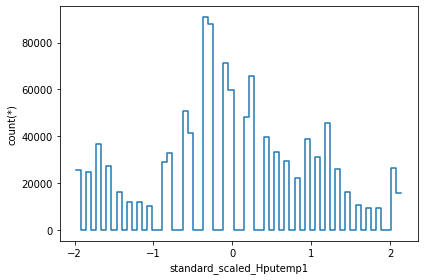

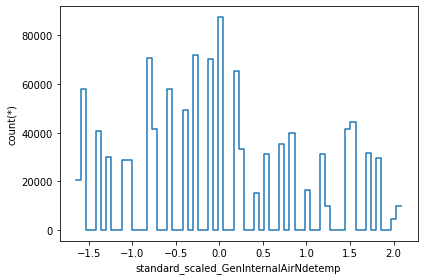

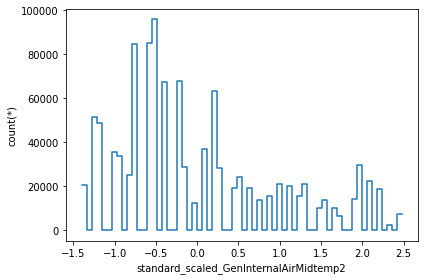

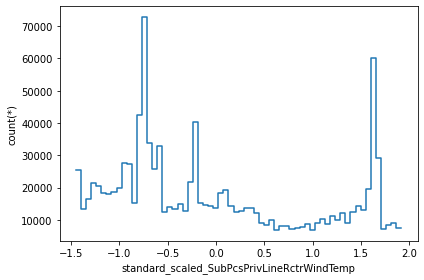

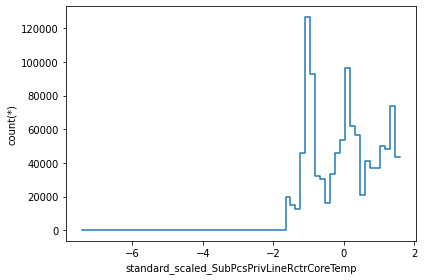

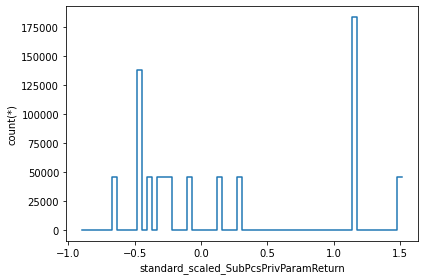

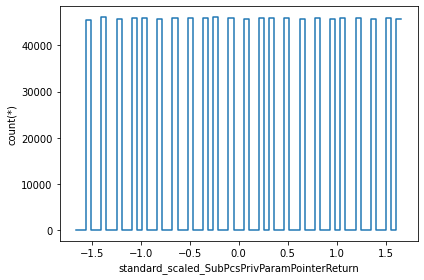

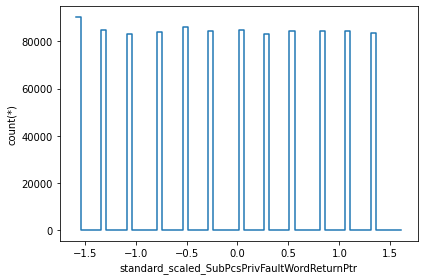

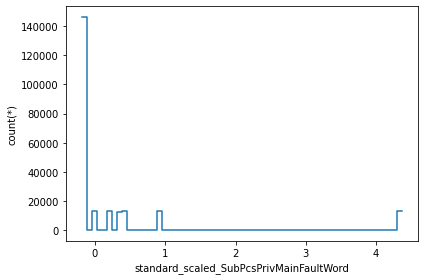

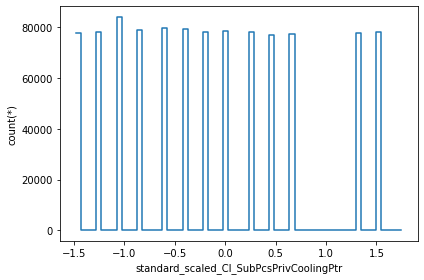

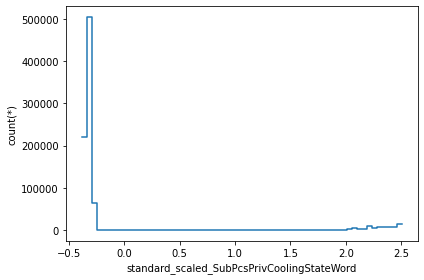

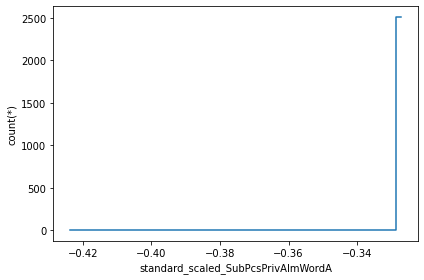

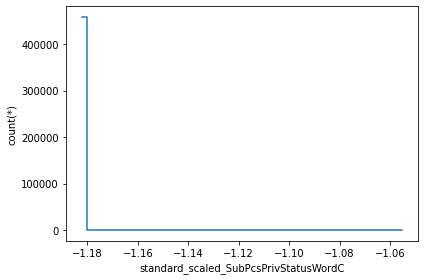

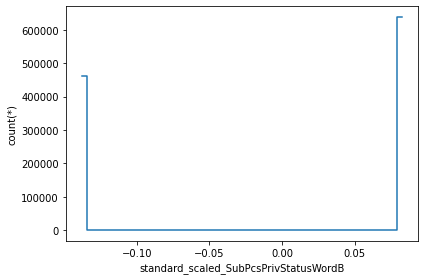

<string>:1: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/vaex/dataframe.py:1466: RuntimeWarning: invalid value encountered in true_divide
  cumcounts = cumcounts / cumcounts.max()
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start


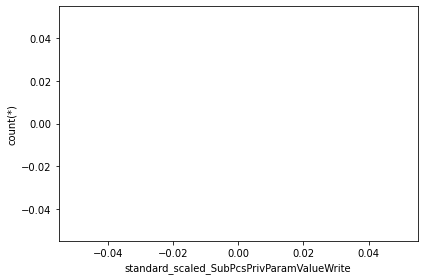

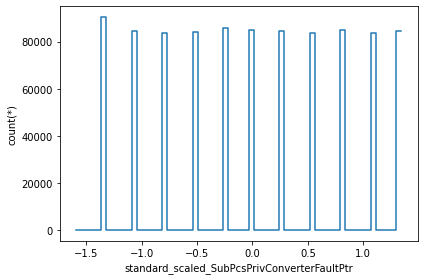

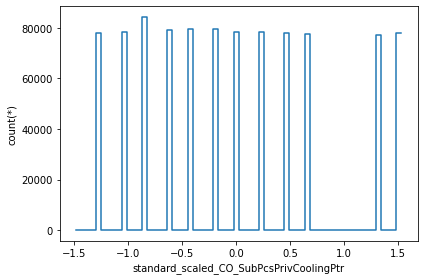

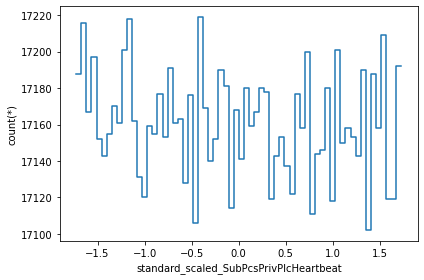

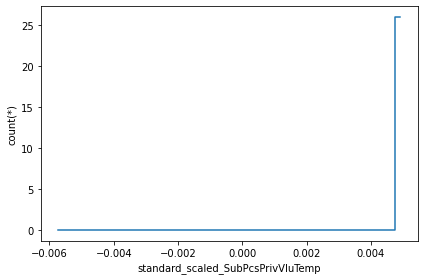

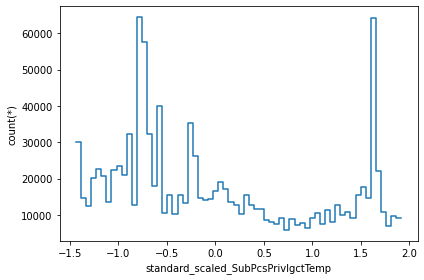

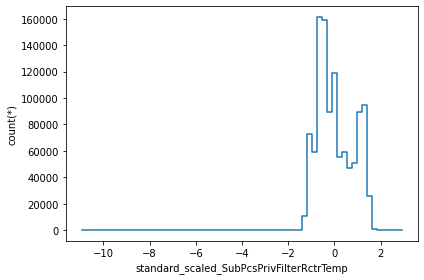

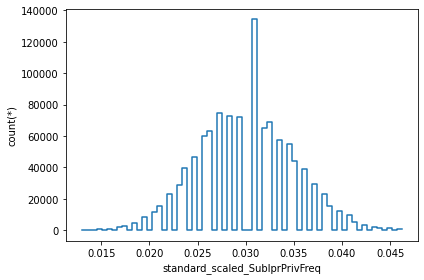

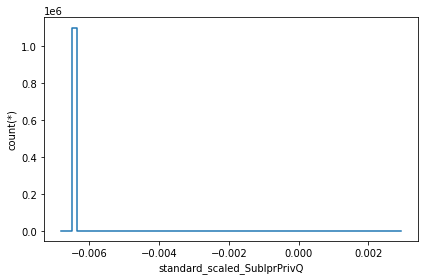

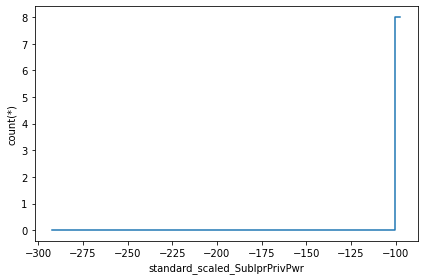

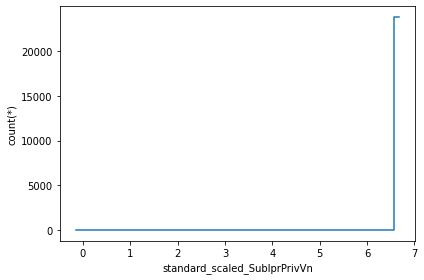

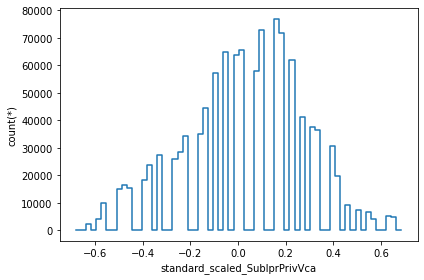

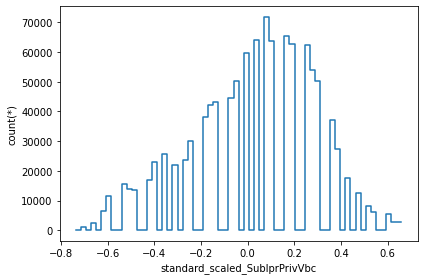

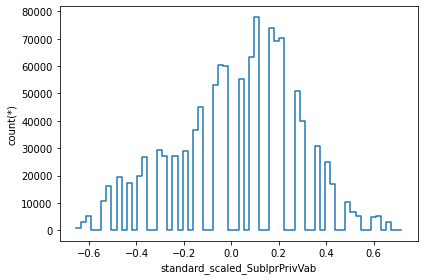

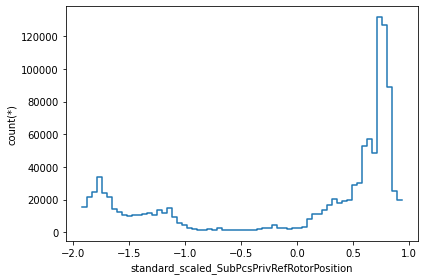

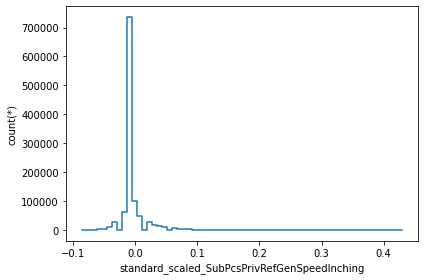

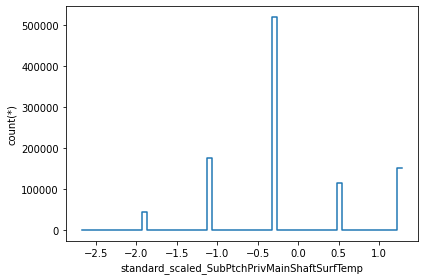

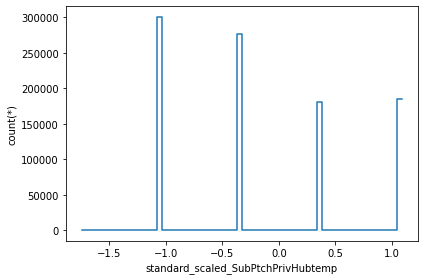

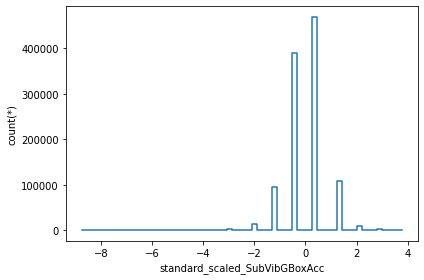

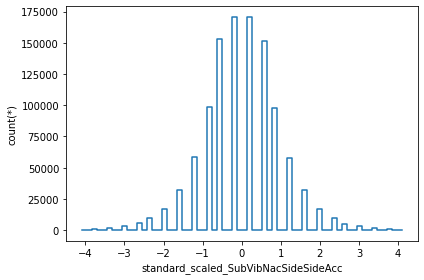

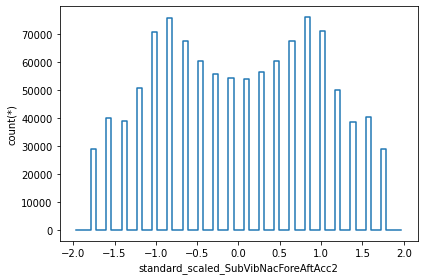

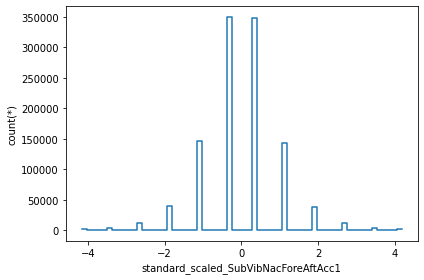

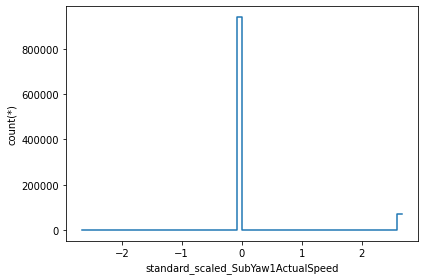

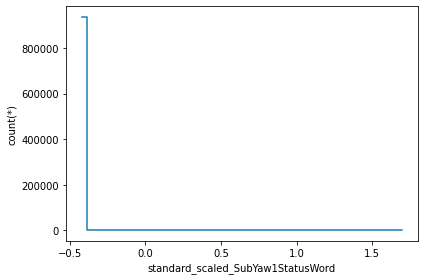

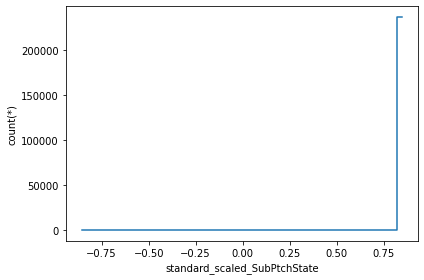

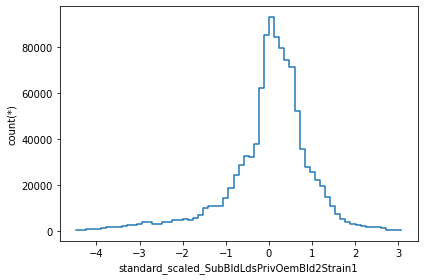

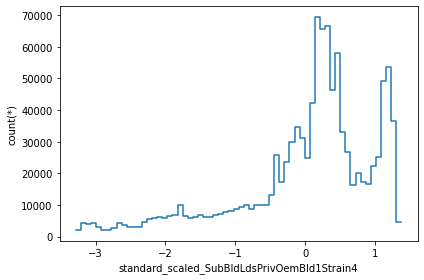

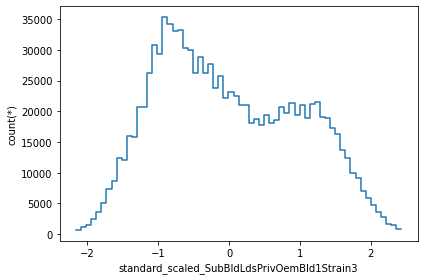

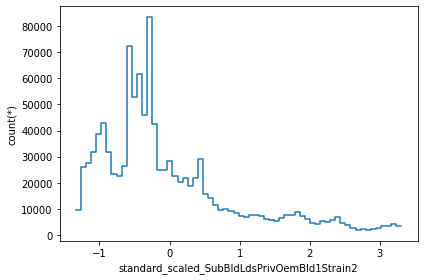

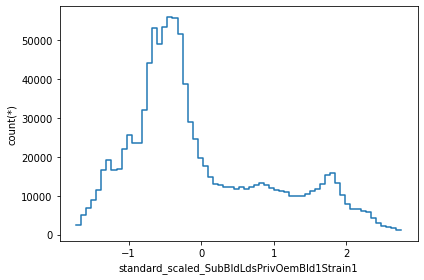

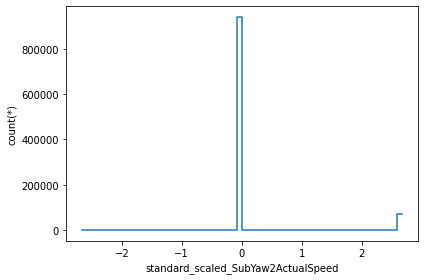

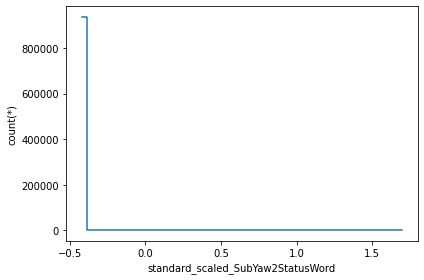

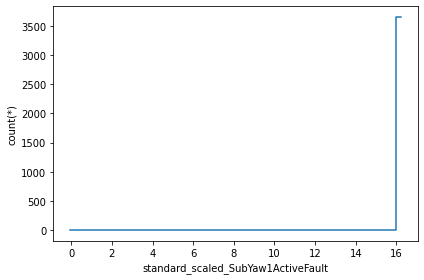

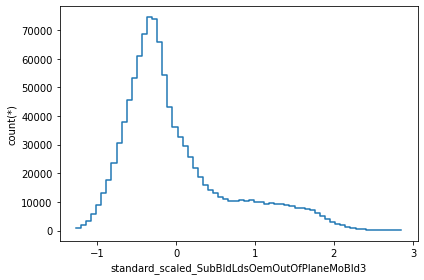

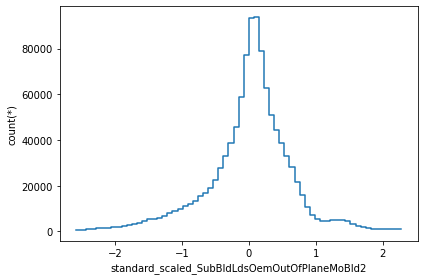

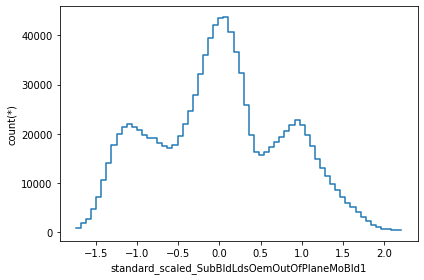

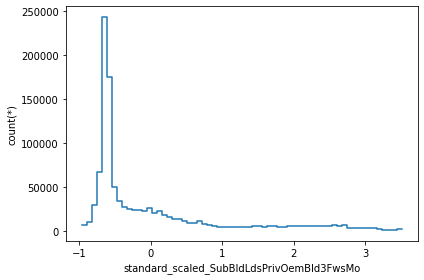

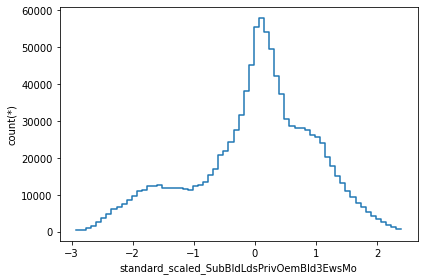

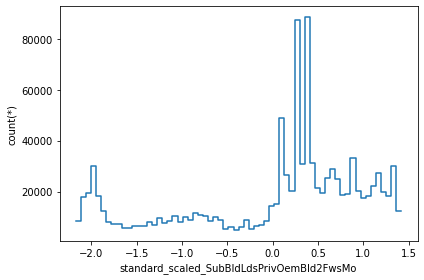

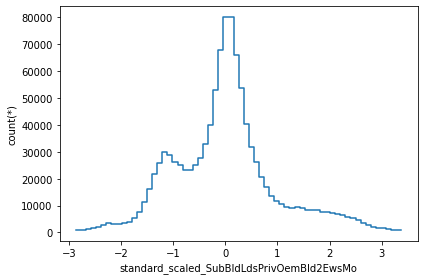

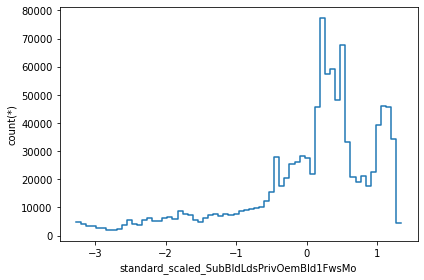

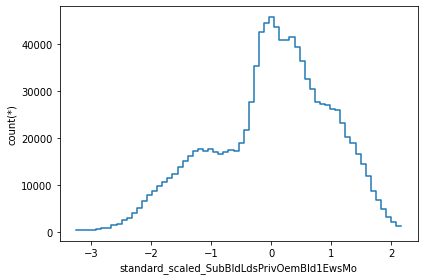

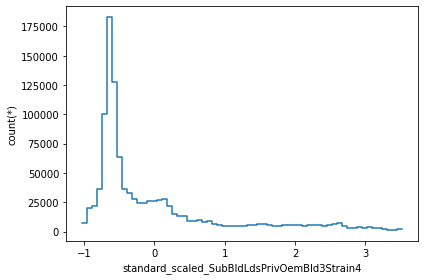

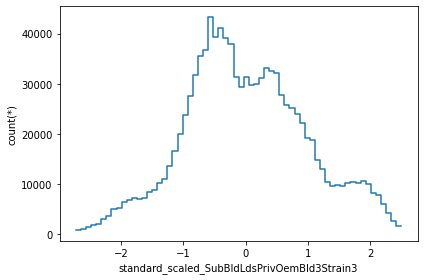

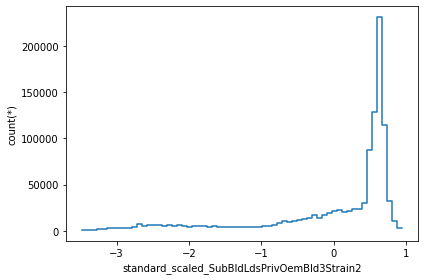

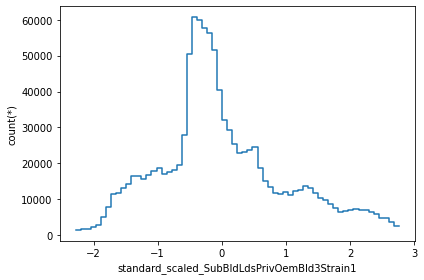

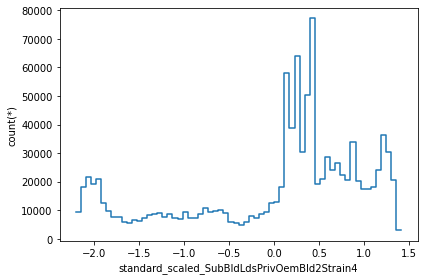

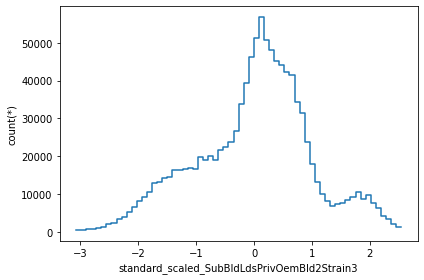

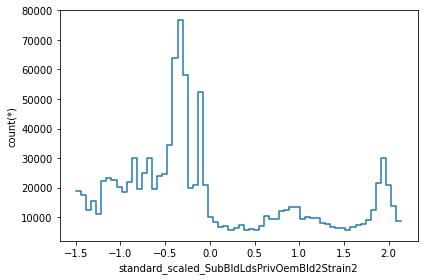

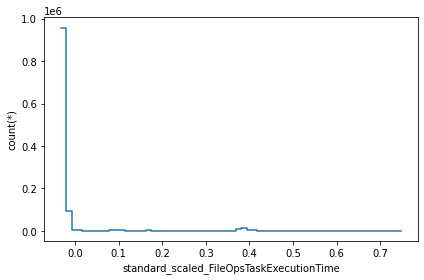

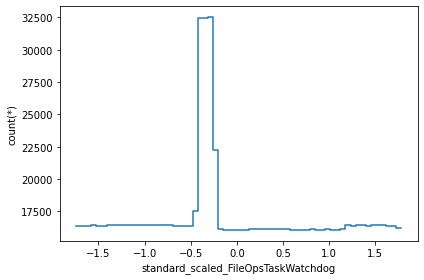

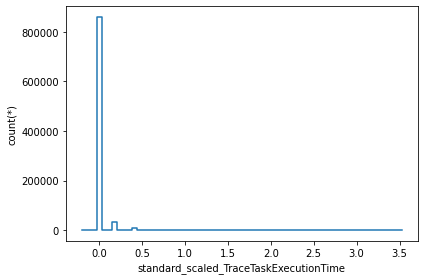

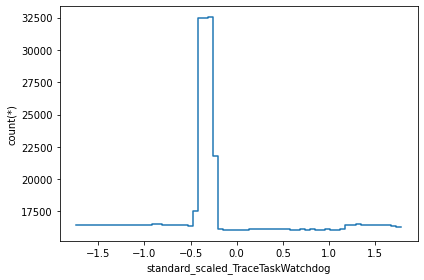

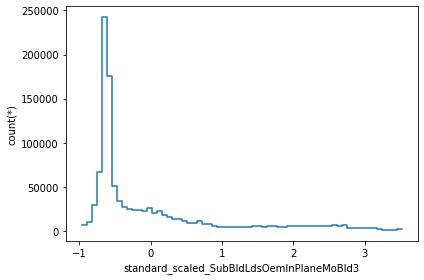

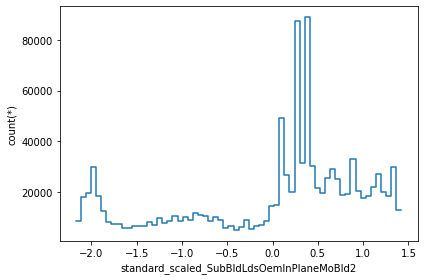

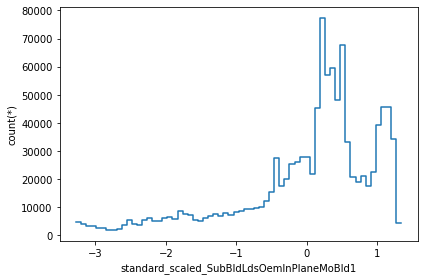

In [0]:
import matplotlib.pyplot as plt
for column in scaled_df:
    scaled_df.plot1d(scaled_df[column], label=column)
    plt.tight_layout()
    plt.show()

**THIS COMMAND HAS NOT BEEN EXECUTED!** 

This command can be used for finding correlation between an important column and the rest of the features in the data frame. Another very useful command which can help with reducing the data noisiness if more data knowledge is available.

In [0]:
scaled_df.correlation(scaled_df.importand_column_name, scaled_df.column);


**Insights based on an expert advice**

Based on our external communication with an expert we followed the assumption that the two main reasons for unpredicted turbine failures are the generator and the yaw. Once these two turbine components were identified as crucial, two lists were produced: one holds all the fields which contain data related to the generator and another for the yaw. The two lists are displayed below.

In [0]:
gen_columns = []
yaw_columns = []
for column in scaled_df:
    if 'Gen' in column:
      gen_columns.append(column)
    elif 'Yaw' in column:
      yaw_columns.append(column)

print (gen_columns)

print(yaw_columns)

['standard_scaled_GeneratorTemperature_DegC', 'standard_scaled_GenPosition', 'standard_scaled_GenSupportPres1', 'standard_scaled_GenSpeedRelay', 'standard_scaled_GenSupportDeflection2', 'standard_scaled_GenSupportDeflection1', 'standard_scaled_GenLinePres', 'standard_scaled_GenSupportDeflection4', 'standard_scaled_GenSupportDeflection3', 'standard_scaled_GenInternalAirMidtemp1', 'standard_scaled_GenInternalAirDetemp', 'standard_scaled_GenHeWaterOutlettemp', 'standard_scaled_GenHeWaterInlettemp', 'standard_scaled_GenBearingtemp4', 'standard_scaled_GenBearingtemp3', 'standard_scaled_GenBearingtemp2', 'standard_scaled_GenBearingtemp1', 'standard_scaled_GenStatortemp6', 'standard_scaled_GenStatortemp5', 'standard_scaled_GenStatortemp4', 'standard_scaled_GenStatortemp3', 'standard_scaled_GenStatortemp2', 'standard_scaled_GenInternalAirNdetemp', 'standard_scaled_GenInternalAirMidtemp2', 'standard_scaled_SubPcsPrivRefGenSpeedInching']
['standard_scaled_YawState', 'standard_scaled_NumOfYawOper

Two more data frames are created. One is used for the generator values and the other for the yaw values. They are initialised with the scaled values. This is done to preserve the data.

In [0]:
gen_df = scaled_df
yaw_df = scaled_df

All columns which are not related to the generator are dropped from the data frame which is used for the generator values and the modified data frame is displayed.

In [0]:
for column in gen_df:
    if column not in gen_columns:
       gen_df=gen_df.drop(column)

gen_df

#          standard_scaled_GeneratorTemperature_DegC    standard_scaled_GenPosition    standard_scaled_GenSupportPres1    standard_scaled_GenSpeedRelay    standard_scaled_GenSupportDeflection2    standard_scaled_GenSupportDeflection1    standard_scaled_GenLinePres    standard_scaled_GenSupportDeflection4    standard_scaled_GenSupportDeflection3    standard_scaled_GenInternalAirMidtemp1    standard_scaled_GenInternalAirDetemp    standard_scaled_GenHeWaterOutlettemp    standard_scaled_GenHeWaterInlettemp    standard_scaled_GenBearingtemp4    standard_scaled_GenBearingtemp3    standard_scaled_GenBearingtemp2    standard_scaled_GenBearingtemp1    standard_scaled_GenStatortemp6    standard_scaled_GenStatortemp5    standard_scaled_GenStatortemp4    standard_scaled_GenStatortemp3    standard_scaled_GenStatortemp2    standard_scaled_GenInternalAirNdetemp    standard_scaled_GenInternalAirMidtemp2    standard_scaled_SubPcsPrivRefGenSpeedInching
0          1.2679577004059364                           0.6909221786015887             1.523607150643395                  0.766482618612851                1.6085041339618562                       -0.7263383004855841                      0.4157304224660711             -0.6800381187175808                      1.1462066599883698                       0.2312983495864595                        0.9499748350377862                      -0.5622071224677391                     -0.5466561661994975                    1.2250126076883174                 1.200969916651561                  1.138424605834744                  1.2089587880122832                 1.340037094211736                 1.2117316060328922                1.2509142043466503                1.3160371360818506                1.2126462724664115                0.7217928171344996                       0.21032472875743727                       -0.020290248416361352
1          1.2679577004059364                           0.6909221786015887             1.523607150643395                  0.766482618612851                1.6085041339618562                       -0.7263383004855841                      0.4157304224660711             -0.6800381187175808                      1.1462066599883698                       0.2312983495864595                        0.9499748350377862                      -0.5622071224677391                     -0.5466561661994975                    1.2250126076883174                 1.200969916651561                  1.138424605834744                  1.2089587880122832                 1.340037094211736                 1.2117316060328922                1.2509142043466503                1.3160371360818506                1.2126462724664115                0.7217928171344996                       0.21032472875743727                       -0.020290248416361352
2          1.2679577004059364                           0.6909221786015887             1.523607150643395                  0.766482618612851                1.6085041339618562                       -0.7263383004855841                      0.4157304224660711             -0.6800381187175808                      1.1462066599883698                       0.2312983495864595                        0.9499748350377862                      -0.5622071224677391                     -0.5466561661994975                    1.2250126076883174                 1.200969916651561                  1.138424605834744                  1.2089587880122832                 1.340037094211736                 1.2117316060328922                1.2509142043466503                1.3160371360818506                1.2126462724664115                0.7217928171344996                       0.21032472875743727                       -0.020290248416361352
3          1.2679577004059364                           0.6913312761465835             1.523607150643395                  -0.5211832503415552              1.454509324353727                        -0.5284769916425575                      0.4157304224660711             -0.35

All columns which are not related to the yaw are dropped from the data frame which is used for the yaw values and the modified data frame is displayed.

In [0]:
for column in yaw_df:
    if column not in yaw_columns:
       yaw_df=yaw_df.drop(column)

yaw_df

#          standard_scaled_YawState    standard_scaled_NumOfYawOperations    standard_scaled_YawRate    standard_scaled_YawStateCounter    standard_scaled_YawState_1    standard_scaled_YawBrake2StateCounter    standard_scaled_YawBrake1StateCounter    standard_scaled_YawDrive2StateCounter    standard_scaled_YawDrive2State    standard_scaled_YawDrive1StateCounter    standard_scaled_YawDrive1State    standard_scaled_YawDriveStateCounter    standard_scaled_YawDriveState    standard_scaled_MeasuredYawError    standard_scaled_YawError3    standard_scaled_YawError2    standard_scaled_YawError1    standard_scaled_YawBrakePres2    standard_scaled_YawBrakePres1    standard_scaled_SubYaw1ActualSpeed    standard_scaled_SubYaw1StatusWord    standard_scaled_SubYaw2ActualSpeed    standard_scaled_SubYaw2StatusWord    standard_scaled_SubYaw1ActiveFault
0          2.338458926145973           -1.7839178267019273                   1.8136987017238888         -0.43189722738893443               0.8892400530719409            -0.43337326635868445                     -0.4335231078623665                      0.07678650663701111                      -0.05764658180909746              0.077094628102415                        -0.059107005920770714             -0.43351489898518186                    1.5120540252602974               -0.11879158498377856                -0.11879141878476761         -0.20888733110675264         -0.34024651003781897         -2.320893783993455               -2.311724188837519               -2.667468842688204                    2.393806347921975                    -2.6674684211175004                   2.393746771104792                    -0.05854937914113305
1          2.338458926145973           -1.7839178267019273                   1.8136987017238888         -0.43189722738893443               0.8892400530719409            -0.43337326635868445                     -0.4335231078623665                      0.07678650663701111                      -0.05764658180909746              0.077094628102415                        -0.059107005920770714             -0.43351489898518186                    1.5120540252602974               -0.11879158498377856                -0.11879141878476761         -0.20888733110675264         -0.34024651003781897         -2.320893783993455               -2.311724188837519               -2.667468842688204                    2.393806347921975                    -2.6674684211175004                   2.393746771104792                    -0.05854937914113305
2          2.338458926145973           -1.7839178267019273                   1.8136987017238888         -0.43189722738893443               0.8892400530719409            -0.43337326635868445                     -0.4335231078623665                      0.07678650663701111                      -0.05764658180909746              0.077094628102415                        -0.059107005920770714             -0.43351489898518186                    1.5120540252602974               -0.11879158498377856                -0.11879141878476761         -0.20888733110675264         -0.34024651003781897         -2.320893783993455               -2.311724188837519               -2.667468842688204                    2.393806347921975                    -2.6674684211175004                   2.393746771104792                    -0.05854937914113305
3          2.338458926145973           -1.7839178267019273                   1.8294913062355251         -0.43149239393671224               0.8892400530719409            -0.4329684800822705                      -0.4331183266708981                      0.07679512390209578                      -0.05764658180909746              0.07710324379495044                      -0.059107005920770714             -0.43311011100676766                    1.5120540252602974               -0.19785325983761934                -0.19785309586015187         -0.30222370548987            -0.3764119917742623          -2.3184227008164187              -2.3125496662947445 

**Data frame plots**


The two new data frames are plotted. The two graph show that the values in each frame have very similar data distribution to each other. This distribution again may mean that they may have strong correlations which can help further data engineering. Both of the graphs contain a peak which could potentially mean a system malfunctioning at those specific values. The labels under the graphs are generated from the plotting library and display the name of the last column read to the graph. 

**Yaw data frame plot**




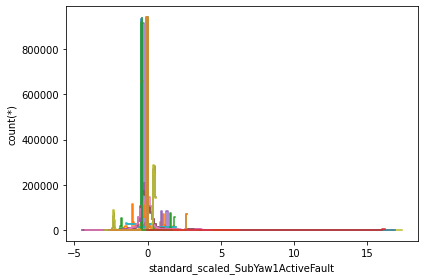

In [0]:
for column in yaw_df:
  yaw_df.plot1d(yaw_df[column], label='Yaw related columns')

**Generator data frame plot**


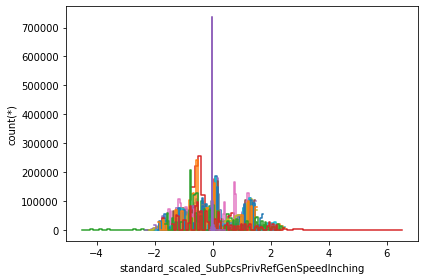

In [0]:
for column in gen_df:
  gen_df.plot1d(gen_df[column], label='Generator related columns')

# Conclusion

There is still a great deal of useful information hidden in this dataset. With additional time, processing power, and domain-specific knowledge, it could be extracted. 

The commands which we could not execute due to those constraints could drastically simplify the analysis of this dataset. We believe that it could lead to useful insights.